In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import dataframe_image as dfi
from pandas.api.types import CategoricalDtype
from matplotlib.ticker import MultipleLocator, FuncFormatter
from scipy.stats import linregress
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
Accepted_Only = pd.read_csv('Accepted_Only.csv')
Accepted_Only['Repayment_Rate'] = np.where(Accepted_Only['Loan_Status'] == 'Fully Paid', 100, 0)

In [3]:
#Set order for Employment Length in Accepted_Only
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
cat_type = CategoricalDtype(categories=emp_length_order, ordered=True)

Accepted_Only['Employment_Length'] = Accepted_Only['Employment_Length'].astype(cat_type)

In [4]:
#Single Year Copy
Accepted_Only_2017 = Accepted_Only[Accepted_Only['Year'] == 2017]

#Paid vs Charged Off Copies
Accepted_Only_Paid = Accepted_Only[Accepted_Only['Loan_Status'] == 'Fully Paid']
Accepted_Only_ChargedOff = Accepted_Only[Accepted_Only['Loan_Status'] == 'Charged Off']
Accepted_Only_ChargedOff['Percent_Paid'] = (Accepted_Only_ChargedOff['Principal_Received'] / Accepted_Only_ChargedOff['Funded_Amount']) * 100

In [5]:
Accepted_Only_Ord = pd.read_csv('Accepted_Only_OrdEncoded.csv')
Accepted_Only_Ord_Numeric_only = Accepted_Only_Ord[['Loan_Status', 'ROI_funded_amount', 'Term', 'FICO_Score', 'Employment_Length', 'Debt-Income', 'Loan-Income', 'Int_Rate', 'MortgageBal-Income']]

In [6]:
Accepted_Only['ROI_funded_amount'].mean()

np.float64(2.2497471639878968)

In [6]:
Accepted_Only_Paid.shape

(1025643, 49)

In [6]:
Paid_Late_Fee = Accepted_Only_Paid.loc[Accepted_Only_Paid['LateFees_Received'] > 0]

In [7]:
Paid_Late_Fee.shape

(23075, 49)

In [8]:
Accepted_Only_ChargedOff.shape

(248165, 50)

In [9]:
ChargedOff_Late_Fee = Accepted_Only_ChargedOff.loc[Accepted_Only_ChargedOff['LateFees_Received'] > 0]
ChargedOff_Late_Fee.shape

(33502, 50)

In [7]:
Accepted_Only.head()

Loan_Status     Co-Sign        Term Grade Sub_Grade  FICO_Score  \
0  Fully Paid  Individual   36 months     C        C4         677   
1  Fully Paid  Individual   36 months     C        C1         717   
2  Fully Paid   Joint App   60 months     B        B4         697   
3  Fully Paid  Individual   60 months     F        F1         697   
4  Fully Paid  Individual   36 months     C        C3         692   

  Employment_Length Income_Verification_Status  Income_Annual  \
0         10+ years               Not Verified         55,000   
1         10+ years               Not Verified         65,000   
2         10+ years               Not Verified         63,000   
3           3 years            Source Verified        104,433   
4           4 years            Source Verified         34,000   

   Existing_Debt_Payments_Annual  Debt-Income  Installment-Income_Monthly  \
0                          3,250            6                           3   
1                         10,439           16                          15   
2                          6,791           11                           8   
3                         26,495           25                           3   
4                          3,468           10                          14   

   Loan-Income  Existing_LoanBal-Income  MortgageBal-Income  \
0            7                        9                 249   
1           38                       28                 254   
2           32                       17                 271   
3           10                       71                 226   
4           35                       12                   0   

   RevolvingBal-Income  Revolving_Util  OnTime_Payment_%  PastDue-Income  \
0                    5              30                77               0   
1                   33              19                97               0   
2                   12              56               100               0   
3                   21              64                97               0   
4                   26              68               100               0   

   Int_Rate  ROI_loan_amount  ROI_funded_amount  Loan_Amount  Funded_Amount  \
0        14               23                 23        3,600          3,600   
1        12                4                  4       24,700         24,700   
2        11               14                 14       20,000         20,000   
3        22               13                 13       10,400         10,400   
4        13               15                 15       11,950         11,950   

   Return_Total  Principal_Received  Interest_Received  LateFees_Received  \
0         4,422               3,600                822                  0   
1        25,680              24,700                980                  0   
2        22,706              20,000              2,706                  0   
3        11,740              10,400              1,340                  0   
4        13,709              11,950              1,759                  0   

   Year Bankruptcies  Charge-Offs_12m  Collections_12m  \
0  2015            0                0                0   
1  2015            0                0                0   
2  2015            0                0                0   
3  2015            0                0                0   
4  2015            0                0                0   

   Delinquencies_>120days_Ever  Delinquencies_>90days_24m  \
0                            2                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Delinquent_Accounts  Months_since_Delinquency  Credit_Age_inMonths  \
0                    0                        30                  148   
1                    0                         6                  192   
2                    0  

In [6]:
Accepted_Only_Bankruptcy = Accepted_Only
legend = pd.DataFrame({
    'Value': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Value_Order': ['0', '1+', '1+', '1+', '1+', '1+', '1+', '1+', '1+', '1+', '1+', '1+', '1+']})
mapping = dict(zip(legend['Value'], legend['Value_Order']))
Accepted_Only_Bankruptcy['Bankruptcies'] = Accepted_Only_Bankruptcy['Bankruptcies'].map(mapping)

In [7]:
print('Min DTI:', Accepted_Only['Debt-Income'].min())
print('Max DTI:', Accepted_Only['Debt-Income'].max())
print(Accepted_Only['Debt-Income'].value_counts(dropna=False).sort_index())

Min DTI: 0.0
Max DTI: 999.0
Debt-Income
0      774
0       11
0       22
0       10
0        9
0       10
0       23
0       20
0       19
0       15
0       18
0       20
0       21
0       31
0       22
0       22
0       30
0       26
0       24
0       20
0       52
0       33
0       33
0       28
0       39
0       55
0       48
0       36
0       39
0       42
0       55
0       50
0       47
0       65
0       30
0       41
0       52
0       35
0       71
0       40
0       59
0       44
0       49
0       60
0       62
0       73
0       60
0       35
0       72
0       33
0      104
1       35
1       68
1       68
1       65
1       71
1       62
1       66
1       75
1       55
1      110
1       65
1       58
1       60
1       52
1       61
1       49
1       83
1       54
1       61
1       76
1       82
1       78
1       38
1       63
1       99
1       47
1       61
1       67
1       65
1       78
1       78
1       72
1       74
1       72
1       49
1      101
1  

In [7]:
def barplot_Paid_Unpaid(col='Late_Fees', status_col='Loan_Status', df=Accepted_Only):
    df = df.copy()
    df[col] = pd.to_numeric(df[col], errors='coerce')
    summary = df.groupby(status_col, observed=False)[col].mean().reset_index()

    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 6), dpi=100)
    sns.barplot(data=summary, x=status_col, y=col, hue=status_col, palette=['red', 'blue'])

    for i, v in enumerate(summary[col]):
        plt.text(i, v + (v * 0.02 if v > 0 else 0.02), f"{v:.2f}", 
                 ha='center', va='bottom', fontweight='bold')

    plt.title(f'Average {col}: Fully Paid vs Charged Off', fontsize=14, fontweight='bold')
    plt.xlabel('Loan Status', fontsize=12)
    plt.ylabel(f'Average {col}', fontsize=12)
    plt.tight_layout()
    plt.show()

In [8]:
#Define 1x3 Histogram function
def custom_kde_subplots_1x3(frame_name, col1, col2, col3, x_format='number'):
    sns.set_style('whitegrid')
    cols = [col1, col2, col3]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]

        if col not in frame_name.columns:
            ax.text(0.5, 0.5, f"'{col}' not found", ha='center', va='center', fontsize=12)
            ax.axis('off')
            continue

        data = frame_name[col].dropna()
        if data.empty:
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
            ax.axis('off')
            continue

        mean_col = data.mean()
        median_col = data.median()
        mode_col = data.mode().iloc[0] if not data.mode().empty else None
        skew_col = data.skew()
        kurt_col = data.kurt()

        sns.histplot(data, bins=100, kde=True, color='skyblue', ax=ax)

        ax.axvline(mean_col, color='r', linestyle='--', label=f'Mean: {mean_col:,.0f}')
        ax.axvline(median_col, color='g', linestyle='-', label=f'Median: {median_col:,.0f}')
        if mode_col is not None:
            ax.axvline(mode_col, color='b', linestyle='-.', label=f'Mode: {mode_col:,.0f}')

        ax.annotate(
            f'Skewness: {skew_col:.2f}\nKurtosis: {kurt_col:.2f}',
            xy=(0.98, 0.95), xycoords='axes fraction',
            fontsize=10, ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='skyblue')
        )

        ax.set_title(col, fontsize=13)
        ax.legend(fontsize=9)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')

        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
        if x_format == 'percent':
            ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f}%'))
        else:
            ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.tight_layout()
    plt.show()

In [17]:
def custom_kde_subplots_2x2(frame_name, col1, col2=None, col3=None, col4=None, x_format='number'):
    sns.set_style('whitegrid')
    cols = [c for c in [col1, col2, col3, col4] if c is not None]

    fig, axes = plt.subplots(2, 2, figsize=(18, 10), dpi=300)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        data = frame_name[col].dropna()

        if data.empty:
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
            ax.set_title(col, fontsize=13)
            ax.axis('off')
            continue

        mean_col = data.mean()
        median_col = data.median()
        mode_col = data.mode().iloc[0] if not data.mode().empty else None
        skew_col = data.skew()
        kurt_col = data.kurt()

        sns.histplot(data, bins=100, kde=True, color='skyblue', ax=ax)

        ax.axvline(mean_col, color='r', linestyle='--', label=f'Mean: {mean_col:,.0f}')
        ax.axvline(median_col, color='g', linestyle='-', label=f'Median: {median_col:,.0f}')
        if mode_col is not None:
            ax.axvline(mode_col, color='b', linestyle='-.', label=f'Mode: {mode_col:,.0f}')

        ax.annotate(
            f'Skewness: {skew_col:.2f}\nKurtosis: {kurt_col:.2f}',
            xy=(0.98, 0.95), xycoords='axes fraction',
            fontsize=10, ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue')
        )

        ax.set_title(col, fontsize=13)
        ax.legend(fontsize=9)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')

        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
        if x_format == 'percent':
            ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f}%'))
        else:
            ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    for j in range(len(cols), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [13]:
def custom_kde(frame_name, col_name, xlimit=None, nbins = 1000):
    sns.set_style('whitegrid')

    data = frame_name[col_name]

    mean_col = data.mean()
    median_col = data.median()
    mode_col = data.mode().values[0]

    plt.figure(figsize=(14, 7))

    sns.histplot(x=data, bins=nbins, kde=True, color='skyblue')

    plt.axvline(mean_col, color='r', linestyle='--', label=f'Mean: {mean_col:,.0f}')
    plt.axvline(median_col, color='g', linestyle='-', label=f'Median: {median_col:,.0f}')
    plt.axvline(mode_col, color='b', linestyle='-.', label=f'Mode: {mode_col:,.0f}')

    ax = plt.gca()
    ymax = ax.get_ylim()[1]
    xpos = ax.get_xlim()[1] * 0.70
    ypos = ymax * 0.85

    plt.annotate(
        f'Skewness: {data.skew():.2f}\nKurtosis: {data.kurt():.2f}',
        xy=(xpos, ypos),
        fontsize=14,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='skyblue')
    )

    plt.title(col_name)
    plt.legend()
    plt.xlabel(col_name)
    plt.ylabel('Frequency')

    ax.xaxis.set_major_formatter(lambda x, pos: f'{x:,.0f}%')
    ax.yaxis.set_major_formatter(lambda y, pos: f'{y:,.0f}')

    if xlimit is not None:
        plt.xlim(0, xlimit)

    plt.show()

In [11]:
#Layered Density Function Definition: Fully Paid vs Charged Off
def stacked_density_status(col, paidclip=0, chargedoffclip=-100, tickspace=10):
    
    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6), dpi=100)
    
    # Fully Paid KDE
    sns.kdeplot(
        data=Accepted_Only[Accepted_Only['Loan_Status'] == 'Fully Paid'],
        x=col,
        fill=True,
        label='Fully Paid',
        color='green',
        alpha=0.6,
        bw_adjust=.3,
        clip=(paidclip, None)
    )
    
    sns.kdeplot(
        data=Accepted_Only[Accepted_Only['Loan_Status'] == 'Charged Off'],
        x=col,
        fill=True,
        label='Charged Off',
        color='red',
        alpha=0.6,
        bw_adjust=.3,
        clip=(chargedoffclip, None)
    )
    
    plt.title(f'Stacked Density of {col} by Loan Status', fontsize=18, pad=20)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.legend(title='')
    plt.gca().xaxis.set_major_locator(MultipleLocator(tickspace))
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
    plt.tight_layout()
    plt.show()

In [34]:
#Layered Histogram Function Definition: Fully Paid vs Charged Off
def stacked_hist_status(col, tickspace=10, bins=500):
    
    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6), dpi=200)
    
    sns.histplot(
        data=Accepted_Only,
        x=col,
        hue='Loan_Status',
        multiple='layer',
        bins=bins,
        palette={'Fully Paid': 'green', 'Charged Off': 'red'},
        alpha=0.5,
        edgecolor=None,
        legend=False
    )
    
    #Stats
    paid = Accepted_Only[Accepted_Only['Loan_Status'] == 'Fully Paid'][col]
    charged = Accepted_Only[Accepted_Only['Loan_Status'] == 'Charged Off'][col]
    
    stats = {
        'Fully Paid': {
            'color': 'green',
            'mean': paid.mean(),
            'min': paid.min(),
            'max': paid.max(),
            'count': paid.count(),
            'ha': 'right',
            'xpos': plt.gca().get_xlim()[1]
        },
        'Charged Off': {
            'color': 'red',
            'mean': charged.mean(),
            'min': charged.min(),
            'max': charged.max(),
            'count': charged.count(),
            'ha': 'left',
            'xpos': plt.gca().get_xlim()[0]
        }
    }
    
    ymax = plt.gca().get_ylim()[1]
    
    for status, s in stats.items():
        color = s['color']
        
        #Vertical lines
        plt.axvline(s['min'], color=color, linestyle=':', linewidth=1.5)
        plt.axvline(s['mean'], color=color, linestyle='--', linewidth=2)
        plt.axvline(s['max'], color=color, linestyle=':', linewidth=1.5)
        
        #Summary text box
        plt.text(
            s['xpos'], ymax * 0.95,
            f"{status}\n"
            f"Mean: {s['mean']:.0f}%\n"
            f"Min: {s['min']:.0f}%\n"
            f"Max: {s['max']:.0f}%\n"
            f"Count: {s['count']:,}",
            color=color, ha=s['ha'], va='top', fontsize=11, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor=color)
        )
    
    #plt.title(f'Histogram of {col} by Loan Status', fontsize=18, pad=20)
    plt.title(f'Histogram of ROI by Loan Status', fontsize=18, pad=20)
    #plt.xlabel(col, fontsize=15)
    plt.xlabel('ROI', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.gca().xaxis.set_major_locator(MultipleLocator(tickspace))
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.tight_layout()
    plt.show()

In [17]:
#Define Annual Line Plot
def annual_trend_plot(col1, col2, col1_color = 'blue', col2_color = 'purple', df = Accepted_Only, y_format='number', year_col='Year', ylabel=''):
    df_grouped = df.groupby(year_col)[[col1, col2]].mean().reset_index()

    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6), dpi=100)

    plt.plot(df_grouped[year_col], df_grouped[col1],
             marker='o', label= col1, color=col1_color, linewidth=2)
    plt.plot(df_grouped[year_col], df_grouped[col2],
             marker='o', label=col2, color=col2_color, linewidth=2)

    plt.title(f'Annual Trend: {col1} vs {col2}', fontsize=18, pad=15)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(df_grouped[year_col], rotation=0)
    
    if y_format == 'percent':
        plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.0f}%'))
    else:
        plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))

    plt.legend(title='', fontsize=11, loc='best')
    plt.tight_layout()
    plt.show()

In [14]:
#Define Annual Line Plot
def annual_trend_plot3(col1, col2, col3, col1_color = 'green', col2_color = 'blue', col3_color = 'red', df = Accepted_Only, y_format='number', year_col='Year', ylabel=''):
    df_grouped = df.groupby(year_col)[[col1, col2, col3]].mean().reset_index()

    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6), dpi=100)

    plt.plot(df_grouped[year_col], df_grouped[col1],
             marker='o', label= col1, color=col1_color, linewidth=2)
    plt.plot(df_grouped[year_col], df_grouped[col2],
             marker='o', label=col2, color=col2_color, linewidth=2)
    plt.plot(df_grouped[year_col], df_grouped[col3],
         marker='o', label=col3, color=col3_color, linewidth=2)

    plt.title(f'Annual Trend: {col1} , {col2} , {col2}', fontsize=18, pad=15)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(df_grouped[year_col], rotation=0)
    
    if y_format == 'percent':
        plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.0f}%'))
    else:
        plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))

    plt.legend(title='', fontsize=11, loc='best')
    plt.tight_layout()
    plt.show()

In [22]:
def custom_bar_subplots_2x2(frame_name, col1, col2=None, col3=None, col4=None):
    sns.set_style('whitegrid')
    cols = [c for c in [col1, col2, col3, col4] if c is not None]

    fig, axes = plt.subplots(2, 2, figsize=(18, 10), dpi=300)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]

        if col not in frame_name.columns:
            ax.text(0.5, 0.5, 'Column Not Found', ha='center', va='center', fontsize=12)
            ax.set_title(col, fontsize=13)
            ax.axis('off')
            continue

        data = frame_name[col].dropna()
        if data.empty:
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
            ax.set_title(col, fontsize=13)
            ax.axis('off')
            continue

        counts = data.value_counts().sort_index()

        sns.barplot(
            x=list(range(len(counts))),
            y=counts.values,
            color='blue',
            ax=ax
        )

        mean_val = counts.values.mean()
        ax.axhline(mean_val, color='r', linestyle='--', label=f'Mean Count: {mean_val:,.0f}')
        ax.legend(fontsize=9)

        # Set title and labels
        ax.set_title(col, fontsize=13)
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        # Replace numeric x-ticks with category labels
        ax.set_xticks(list(range(len(counts))))
        ax.set_xticklabels(counts.index, rotation=45)

        # Format y-axis
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))

    #Hide unused subplots
    for j in range(len(cols), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [17]:
def normalized_bar_plot(col, df, rot=45, dpi=300):
    df = df.copy()
    
    counts = df[col].value_counts(normalize=True) * 100
    counts = counts.sort_index()

    plt.figure(figsize=(12, 6), dpi=dpi)
    sns.barplot(x=counts.index, y=counts.values, hue=counts.values, palette='viridis', legend=False)

    plt.title(f'Normalized Bar Plot of {col}', fontsize=16, pad=12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.xticks(rotation=rot)
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    for i, v in enumerate(counts.values):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

In [24]:
def Repayment_ROI_scatter_plot_reg(x_col, x_format='number', rot=0, df=Accepted_Only, xmax=None):
    col1 = 'Repayment_Rate'
    col2 = 'ROI_funded_amount'
    col1_color = 'blue'
    col2_color = 'purple'
    df = df.copy()

    if xmax is not None and pd.api.types.is_numeric_dtype(df[x_col]):
        df = df[df[x_col] <= xmax]
    
    #Grouped dataset
    df_grouped = (
        df.groupby(x_col, observed=False)[[col1, col2]]
        .mean()
        .reset_index()
        .sort_values(by=x_col)
    )

    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6), dpi=100)

    #Scatter Points
    plt.scatter(df_grouped[x_col], df_grouped[col1], s=80, color=col1_color, label='Repayment Rate', alpha=0.8)
    plt.scatter(df_grouped[x_col], df_grouped[col2], s=80, color=col2_color, label='ROI', alpha=0.8)

    #Regression lines
    if pd.api.types.is_numeric_dtype(df_grouped[x_col]):
        for col, color, label in [(col1, col1_color, 'Repayment'), (col2, col2_color, 'ROI')]:
            slope, intercept, r, p, _ = linregress(df_grouped[x_col], df_grouped[col])
            plt.plot(
                df_grouped[x_col],
                intercept + slope * df_grouped[x_col],
                linestyle='--',
                color=color,
                label=f'{label} Trend'
            )

    plt.title(f'Repayment Rate and ROI by {x_col}', fontsize=18, pad=15)
    plt.xlabel(x_col, fontsize=15)
    plt.ylabel('Value (%)', fontsize=15)
    plt.xticks(rotation=rot, ha='right')

    plt.legend(title='', fontsize=10, loc='best')
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    if x_format == 'percent' and pd.api.types.is_numeric_dtype(df_grouped[x_col]):
        plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    elif x_format == 'number' and pd.api.types.is_numeric_dtype(df_grouped[x_col]):
        plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.tight_layout()
    plt.show()

In [36]:
def ROI_scatter_plot_reg(x_col, x_format='number', rot=0, df=Accepted_Only_ChargedOff):
    col2 = 'ROI_funded_amount'
    col2_color = 'purple'

    df = df.copy()

    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6), dpi=100)

    plt.scatter(df[x_col], df[col2], s=30, color=col2_color, alpha=0.5, label='ROI')

    # Solid black line at y=0
    plt.axhline(0, color='black', linewidth=1.5)
    
    #Add regression lines (no grouping)
    if pd.api.types.is_numeric_dtype(df[x_col]):
        slope, intercept, r, p, _ = linregress(df[x_col], df[col2])
        x_vals = np.linspace(df[x_col].min(), df[x_col].max(), 200)
        y_vals = intercept + slope * x_vals
        plt.plot(x_vals, y_vals, linestyle='--', color='black',
                 label=f'ROI Trend (R²={r**2:.2f})')

    plt.title(f'ROI by {x_col}', fontsize=18, pad=15)
    plt.xlabel(x_col, fontsize=15)
    plt.ylabel('Value (%)', fontsize=15)
    plt.xticks(rotation=rot, ha='right')
    plt.legend(title='', fontsize=10, loc='best')

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    if x_format == 'percent' and pd.api.types.is_numeric_dtype(df[x_col]):
        plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
    elif x_format == 'number' and pd.api.types.is_numeric_dtype(df[x_col]):
        plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.tight_layout()
    plt.show()

In [6]:
def Repayment_ROI_trend_plot(x_col, x_format='number', rot=0, df=Accepted_Only, order=None):
    col1 = 'Repayment_Rate'
    col2 = 'ROI_funded_amount'
    col1_color = 'blue'
    col2_color = 'purple'

    df = df.copy()

    #Apply specified order for categorical variable
    if order is not None:
        cat_type = CategoricalDtype(categories=order, ordered=True)
        df[x_col] = df[x_col].astype(cat_type)
        df_grouped = df.groupby(x_col, observed=False)[[col1, col2]].mean().reset_index()
    else:
        df_grouped = df.groupby(x_col, observed=False)[[col1, col2]].mean().reset_index().sort_values(by=x_col)

    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 6), dpi=100)
    
    plt.plot(df_grouped[x_col], df_grouped[col1],
             marker='o', label='Repayment Rate', color=col1_color, linewidth=2)
    plt.plot(df_grouped[x_col], df_grouped[col2],
             marker='o', label='ROI', color=col2_color, linewidth=2)

    plt.title(f'Repayment Rate and ROI by {x_col}', fontsize=18, pad=15)
    plt.xlabel(x_col, fontsize=15)
    plt.ylabel('Value (%)', fontsize=15)
    plt.xticks(rotation=rot, ha='right')

    plt.legend(title='', fontsize=11, loc='center right')
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    if x_format == 'percent' and pd.api.types.is_numeric_dtype(df_grouped[x_col]):
        plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    elif x_format == 'number' and pd.api.types.is_numeric_dtype(df_grouped[x_col]):
        plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.tight_layout()
    plt.show()

In [7]:
Accepted_Only.head()

Loan_Status     Co-Sign        Term Grade Sub_Grade  FICO_Score  \
0  Fully Paid  Individual   36 months     C        C4         677   
1  Fully Paid  Individual   36 months     C        C1         717   
2  Fully Paid   Joint App   60 months     B        B4         697   
3  Fully Paid  Individual   60 months     F        F1         697   
4  Fully Paid  Individual   36 months     C        C3         692   

  Employment_Length Income_Verification_Status  Income_Annual  \
0         10+ years               Not Verified         55,000   
1         10+ years               Not Verified         65,000   
2         10+ years               Not Verified         63,000   
3           3 years            Source Verified        104,433   
4           4 years            Source Verified         34,000   

   Existing_Debt_Payments_Annual  Debt-Income  Installment-Income_Monthly  \
0                          3,250            6                           3   
1                         10,439           16                          15   
2                          6,791           11                           8   
3                         26,495           25                           3   
4                          3,468           10                          14   

   Loan-Income  Existing_LoanBal-Income  MortgageBal-Income  \
0            7                        9                 249   
1           38                       28                 254   
2           32                       17                 271   
3           10                       71                 226   
4           35                       12                   0   

   RevolvingBal-Income  Revolving_Util  OnTime_Payment_%  PastDue-Income  \
0                    5              30                77               0   
1                   33              19                97               0   
2                   12              56               100               0   
3                   21              64                97               0   
4                   26              68               100               0   

   Int_Rate  ROI_loan_amount  ROI_funded_amount  Loan_Amount  Funded_Amount  \
0        14               23                 23        3,600          3,600   
1        12                4                  4       24,700         24,700   
2        11               14                 14       20,000         20,000   
3        22               13                 13       10,400         10,400   
4        13               15                 15       11,950         11,950   

   Return_Total  Principal_Received  Interest_Received  LateFees_Received  \
0         4,422               3,600                822                  0   
1        25,680              24,700                980                  0   
2        22,706              20,000              2,706                  0   
3        11,740              10,400              1,340                  0   
4        13,709              11,950              1,759                  0   

   Year  Bankruptcies  Charge-Offs_12m  Collections_12m  \
0  2015             0                0                0   
1  2015             0                0                0   
2  2015             0                0                0   
3  2015             0                0                0   
4  2015             0                0                0   

   Delinquencies_>120days_Ever  Delinquencies_>90days_24m  \
0                            2                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Delinquent_Accounts  Months_since_Delinquency  Credit_Age_inMonths  \
0                    0                        30                  148   
1                    0                         6                  192   
2                 

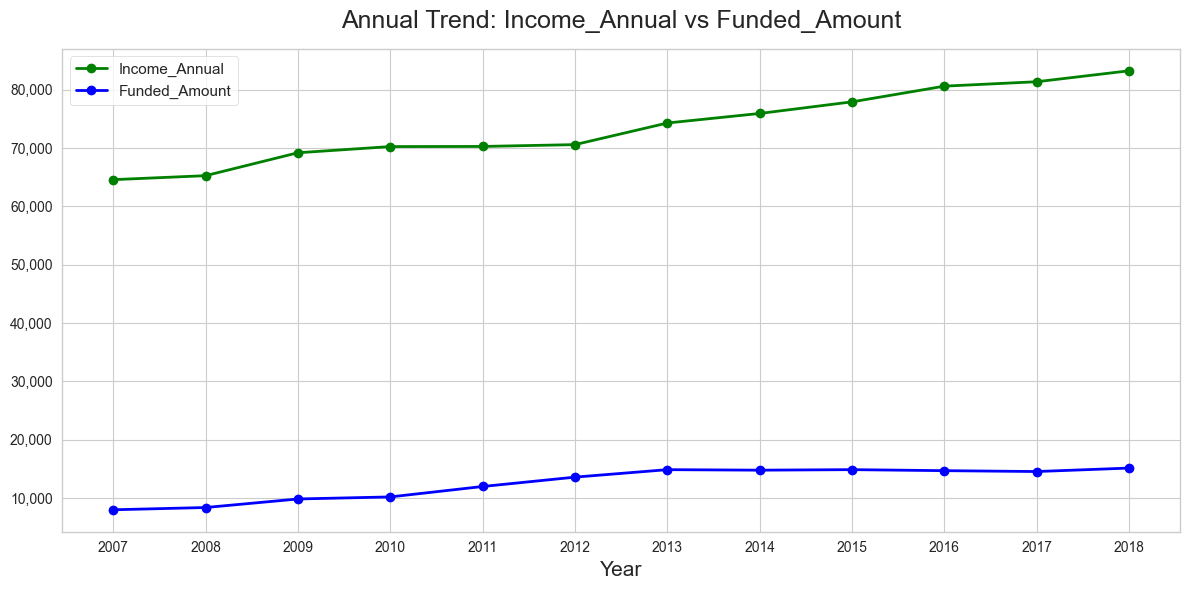

In [18]:
#Line PLot- Loan_Amount vs Income
annual_trend_plot('Income_Annual', 'Funded_Amount', 'green', 'blue')

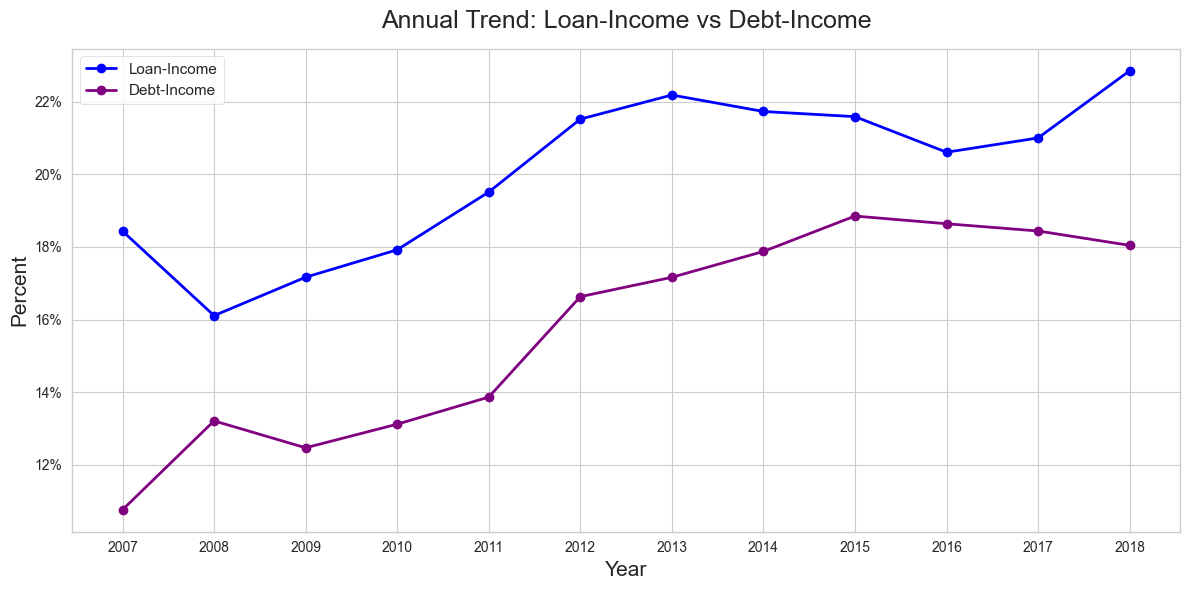

In [21]:
#Line PLot- Loan-Income vs Debt-Income
annual_trend_plot('Loan-Income', 'Debt-Income', y_format='percent', ylabel = 'Percent')

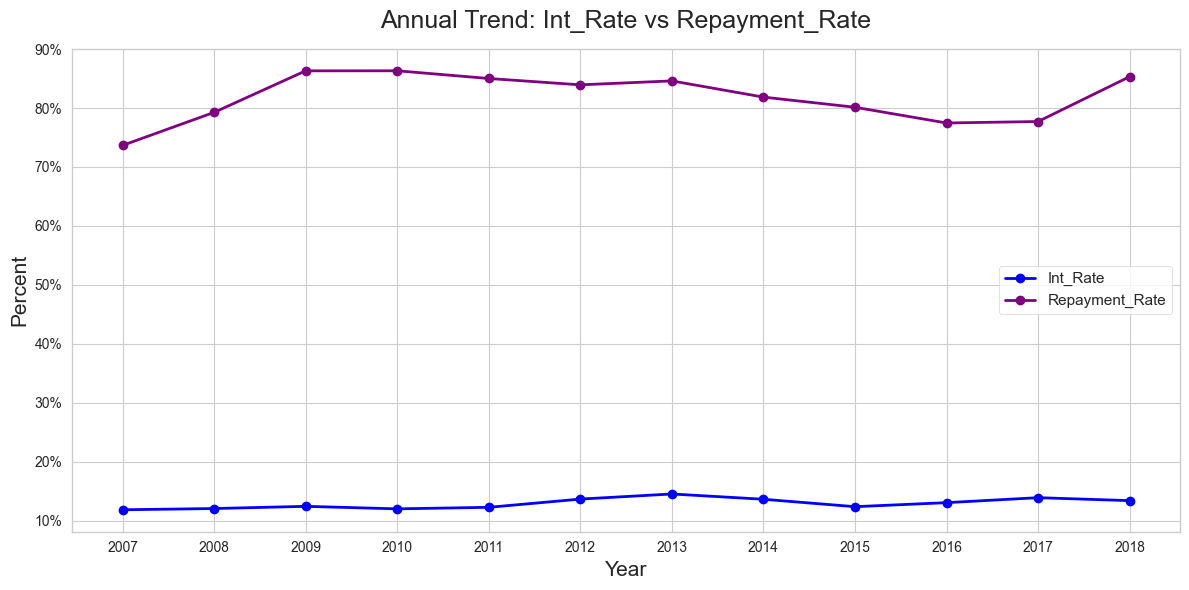

In [22]:
#Line PLot- Interest Rate vs Repayment Rate
annual_trend_plot('Int_Rate', 'Repayment_Rate', y_format='percent', ylabel = 'Percent')

In [23]:
Accepted_Only['Income_Annual'].describe()

count    1,273,808
mean        77,896
std         71,029
min             33
25%         48,000
50%         65,000
75%         92,500
max     10,999,200
Name: Income_Annual, dtype: float64

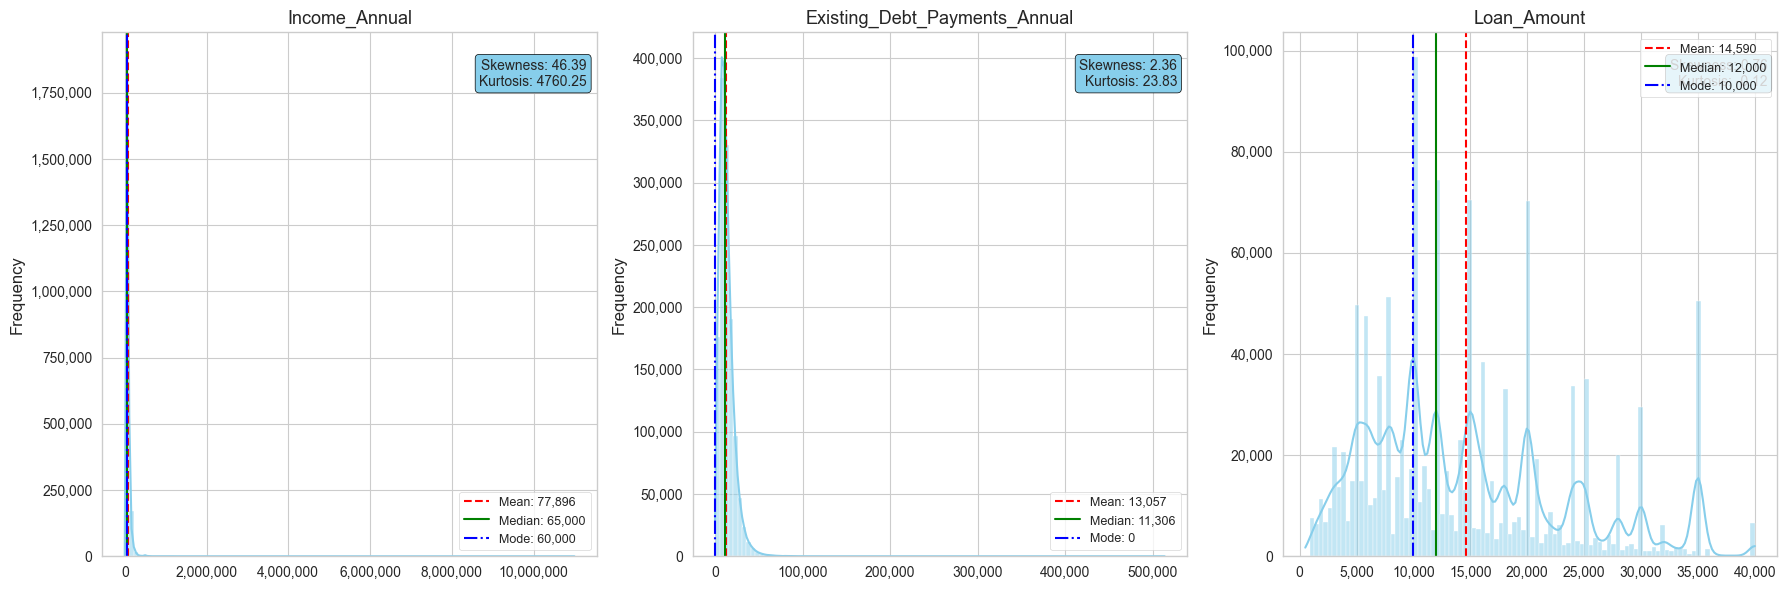

In [24]:
#Histograms- Income, Debt Payments, Loan Amounts
custom_kde_subplots_1x3(Accepted_Only, 'Income_Annual', 'Existing_Debt_Payments_Annual', 'Loan_Amount')

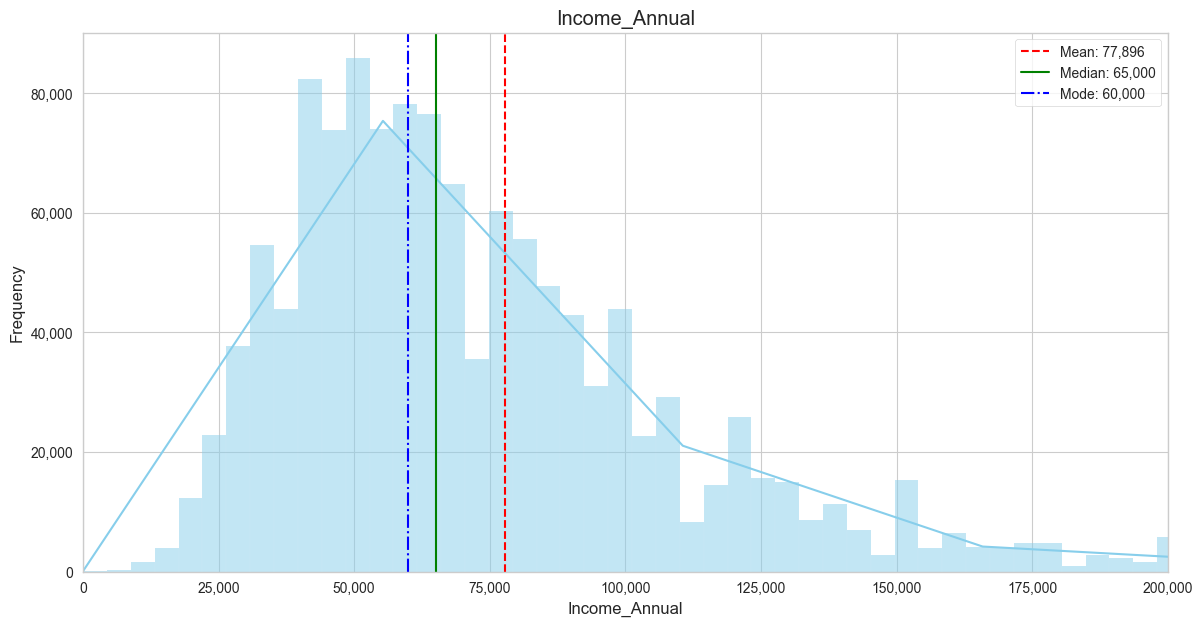

In [25]:
custom_kde(Accepted_Only, 'Income_Annual', 200000, nbins=2500)

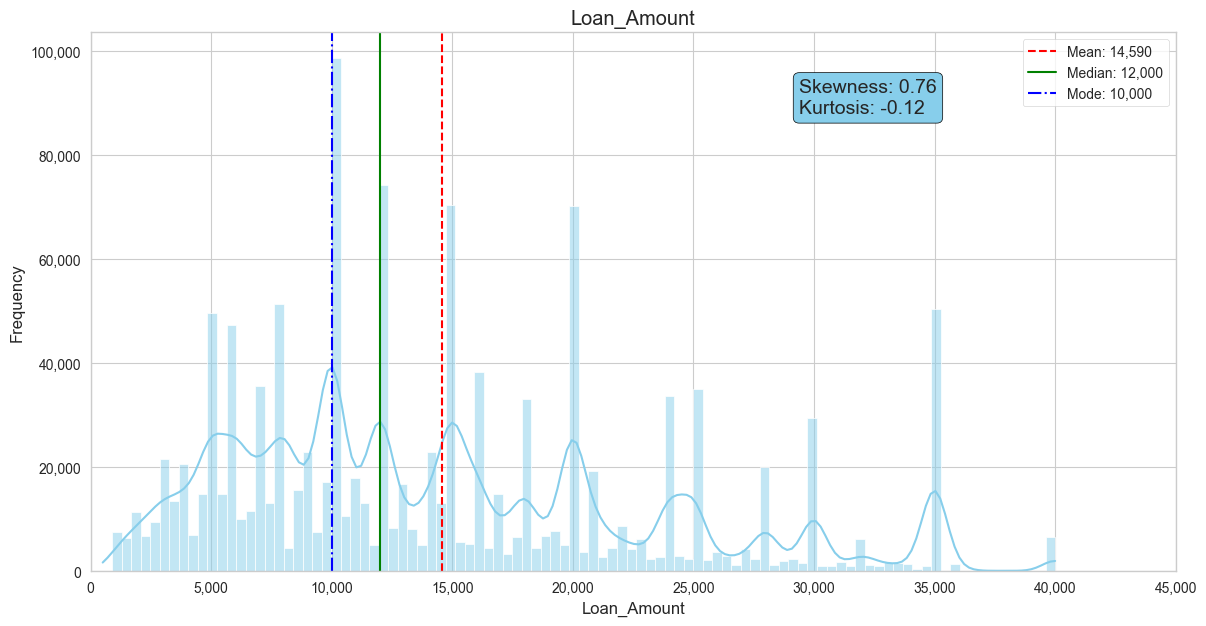

In [9]:
custom_kde(Accepted_Only, 'Loan_Amount', 45000, nbins=100)

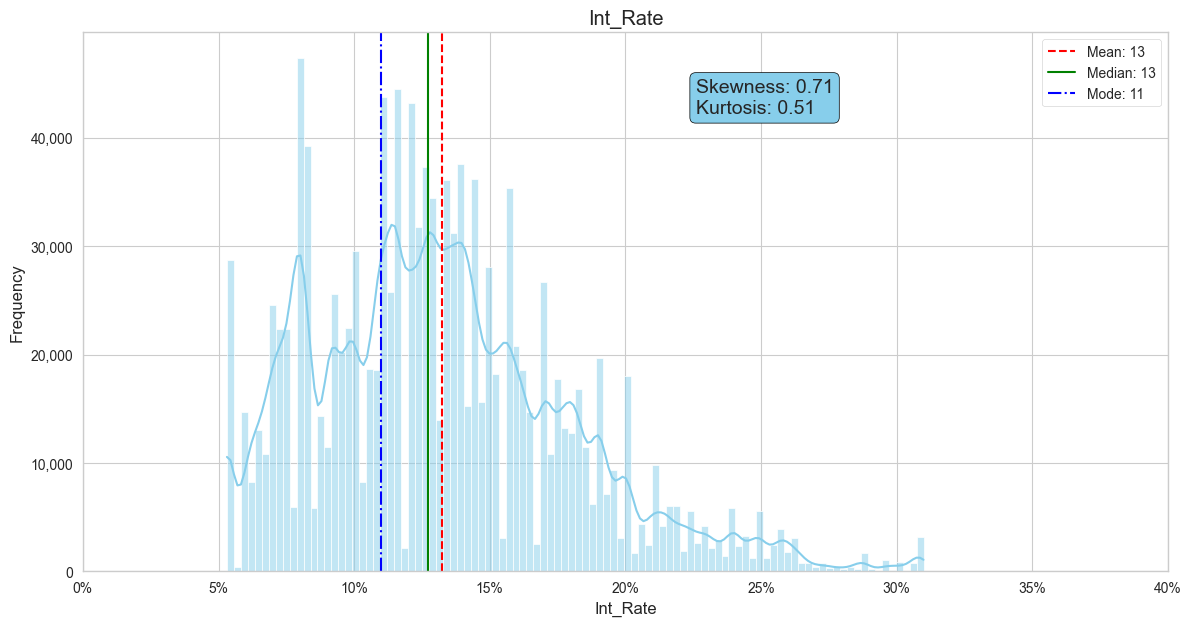

In [14]:
custom_kde(Accepted_Only, 'Int_Rate', 40, nbins=100)

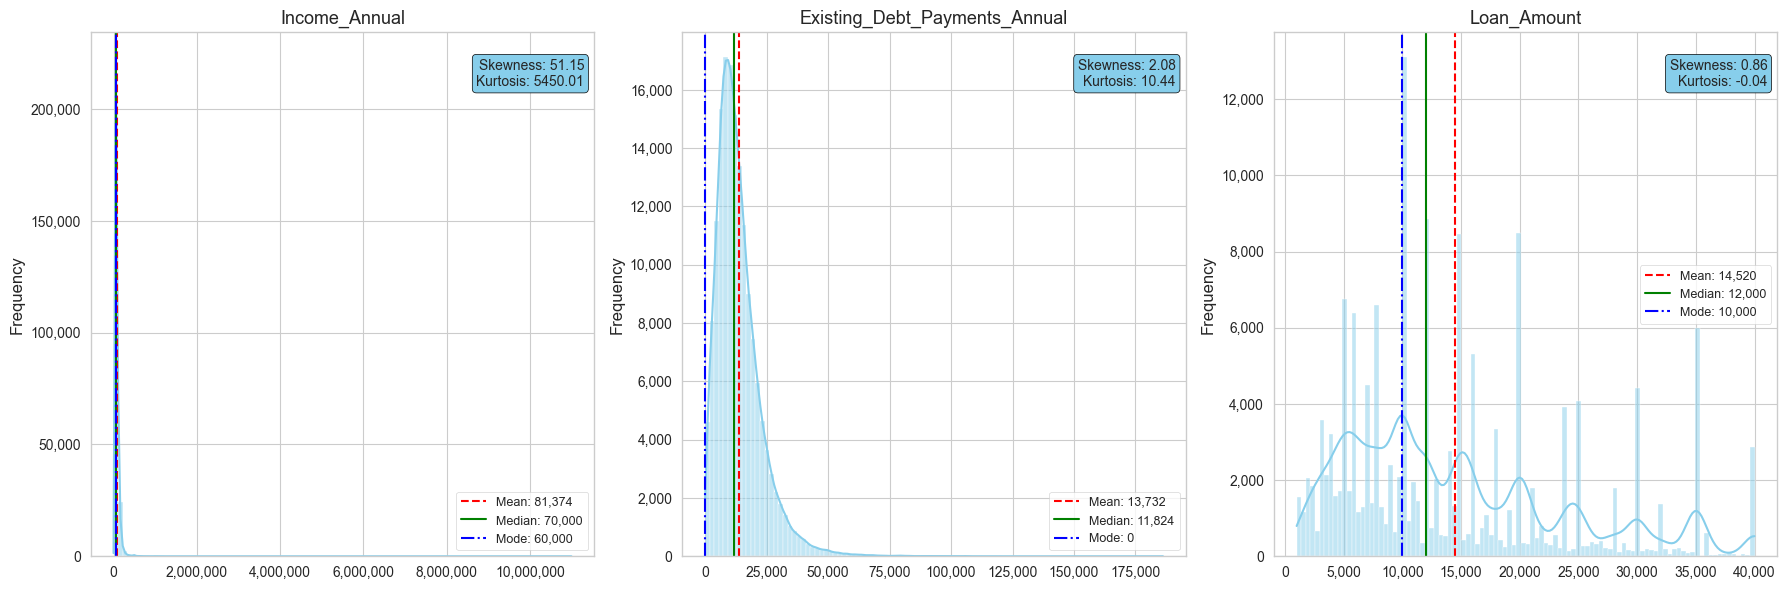

In [26]:
#Histograms- Income, Debt Payments, Loan Amounts (2017 only)
custom_kde_subplots_1x3(Accepted_Only_2017, 'Income_Annual', 'Existing_Debt_Payments_Annual', 'Loan_Amount')

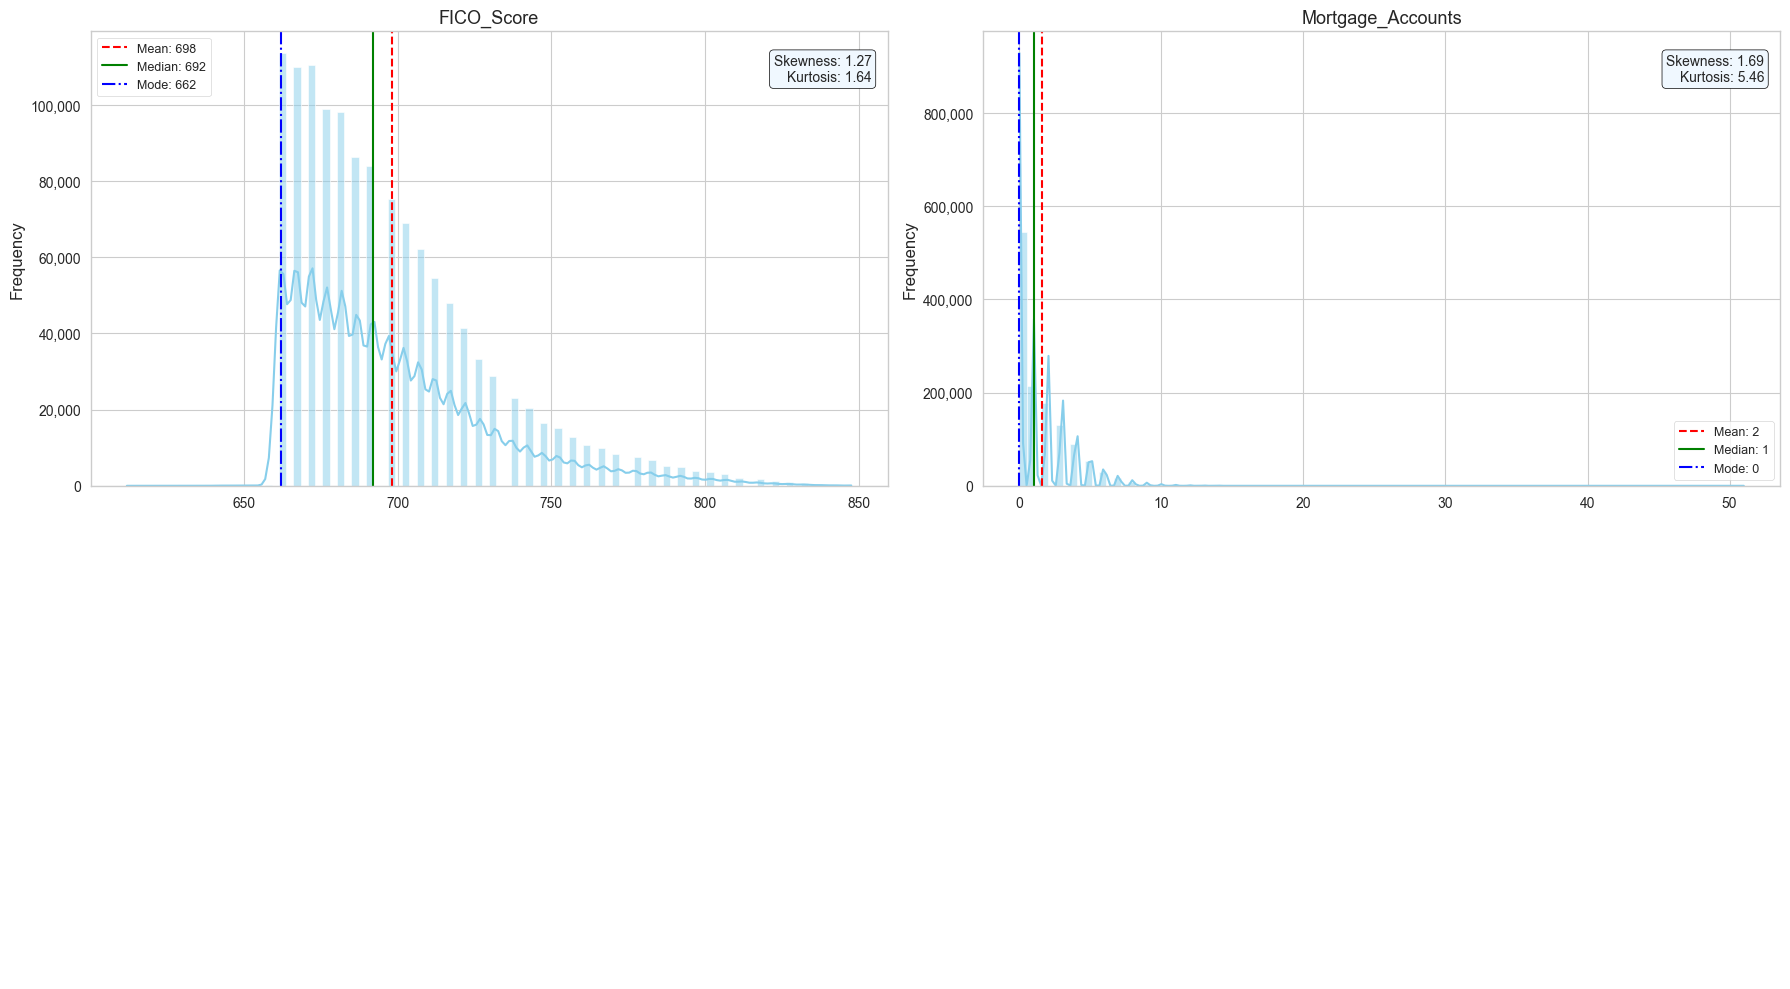

In [19]:
#Histograms- FICO_Score, Mortgage Accounts
custom_kde_subplots_2x2(Accepted_Only, 'FICO_Score', 'Mortgage_Accounts', None, None)

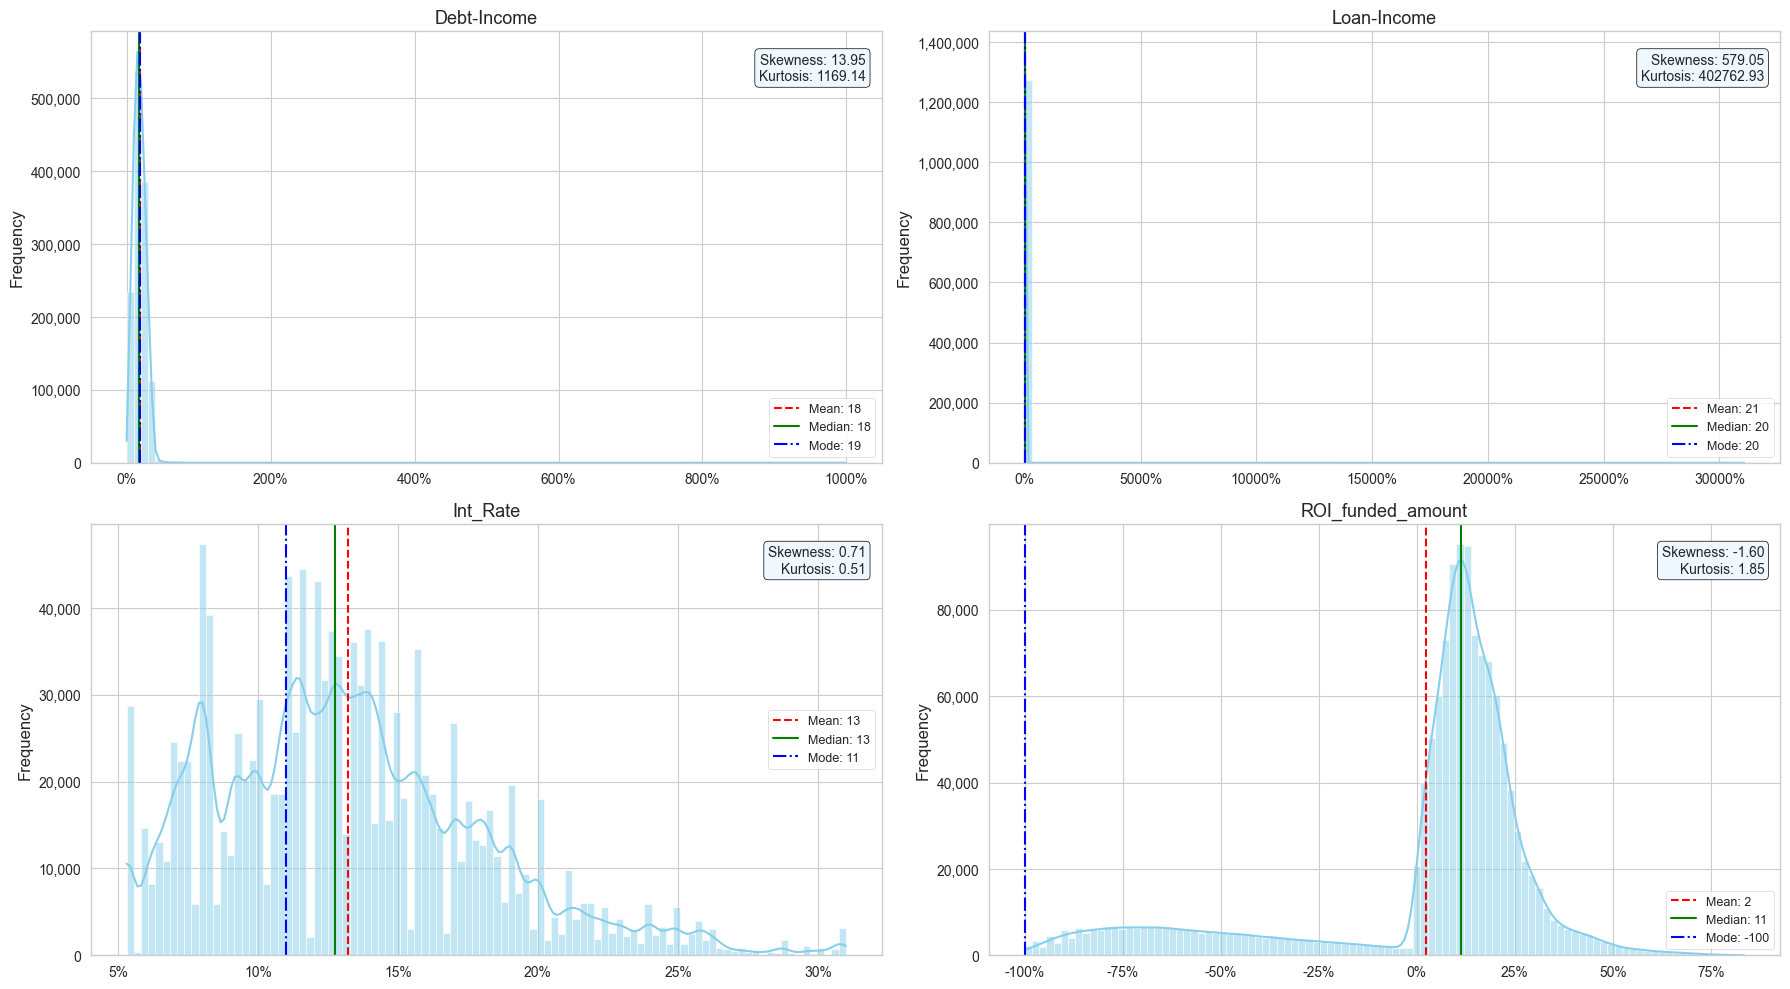

In [28]:
#Histograms: Debt-Income, Loan-Income, Interest Rate, ROI_funded
custom_kde_subplots_2x2(Accepted_Only, 'Debt-Income', 'Loan-Income', 'Int_Rate', 'ROI_funded_amount', x_format='percent')

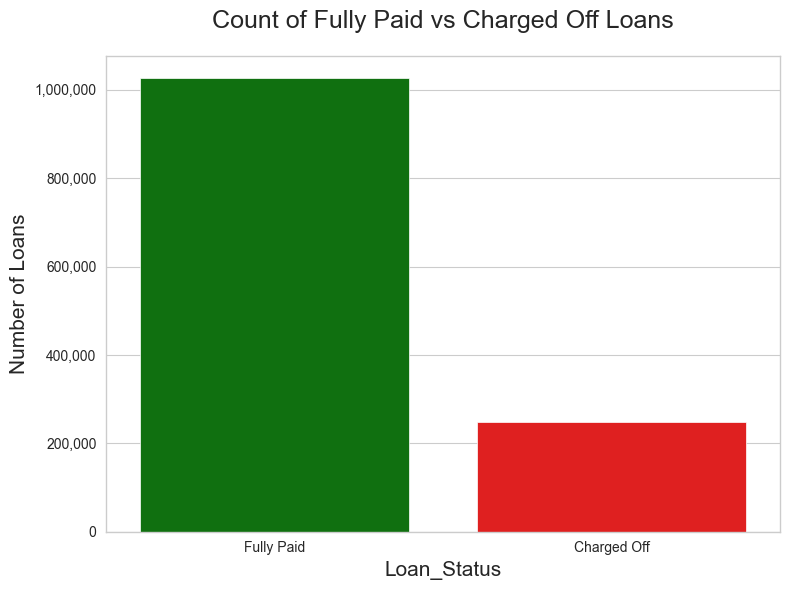

In [29]:
#Barplot- Counts by Loan Status
col = 'Loan_Status'

paid_counts = Accepted_Only.loc[Accepted_Only[col] == 'Fully Paid', col].value_counts().sum()
default_counts = Accepted_Only.loc[Accepted_Only[col] == 'Charged Off', col].value_counts().sum()

combined = pd.DataFrame({
    col: ['Fully Paid', 'Charged Off'],
    'Count': [paid_counts, default_counts]
})

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6), dpi=100)

sns.barplot(
    data=combined,
    x=col,
    y='Count',
    hue=col,
    palette=['green', 'red']
)

plt.title('Count of Fully Paid vs Charged Off Loans', fontsize=18, pad=20)
plt.xlabel(col, fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

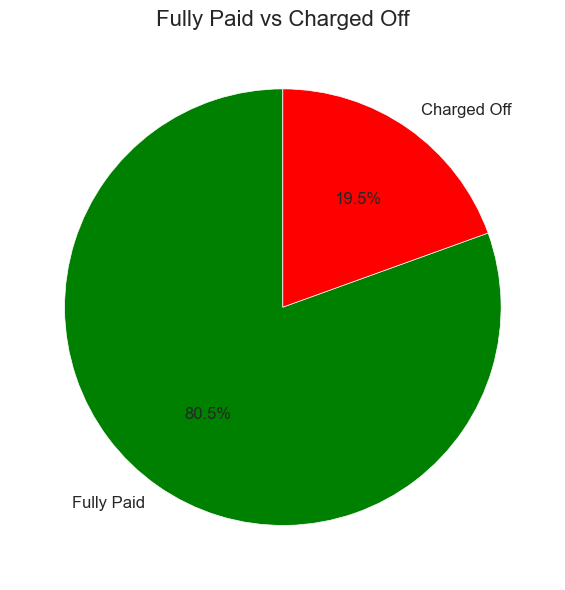

In [30]:
#Pie Chart: Loan Status
status_counts = Accepted_Only['Loan_Status'].value_counts()

plt.figure(figsize=(6, 6), dpi=100)
colors = ['green', 'red']

plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)

plt.title('Fully Paid vs Charged Off', fontsize=16)
plt.tight_layout()
plt.show()

In [31]:
# Prepare grouped counts
sun_df = (
    Accepted_Only_Bankruptcy
    .groupby(['Bankruptcies', 'Loan_Status'])
    .size()
    .reset_index(name='Count')
)

# Create Sunburst
fig = px.sunburst(
    sun_df,
    path=['Bankruptcies', 'Loan_Status'],
    values='Count',
    color='Loan_Status',
    color_discrete_map={
        'Fully Paid': 'green',
        'Charged Off': 'red',
        'Default': 'orange'
    },
    title='Bankruptcies → Loan Status Breakdown'
)

fig.update_traces(
    hovertemplate='<b>%{label}</b><br>' +
                  'Count: %{value:,}<br>' +
                  'Percent of Parent: %{percentParent:.2%}<br>' +
                  'Percent of Total: %{percentRoot:.2%}<br><extra></extra>'
)

fig.update_layout(
    width=700,
    height=700,
    title_x=0.5,
    margin=dict(t=80, l=0, r=0, b=0)
)

fig.show()

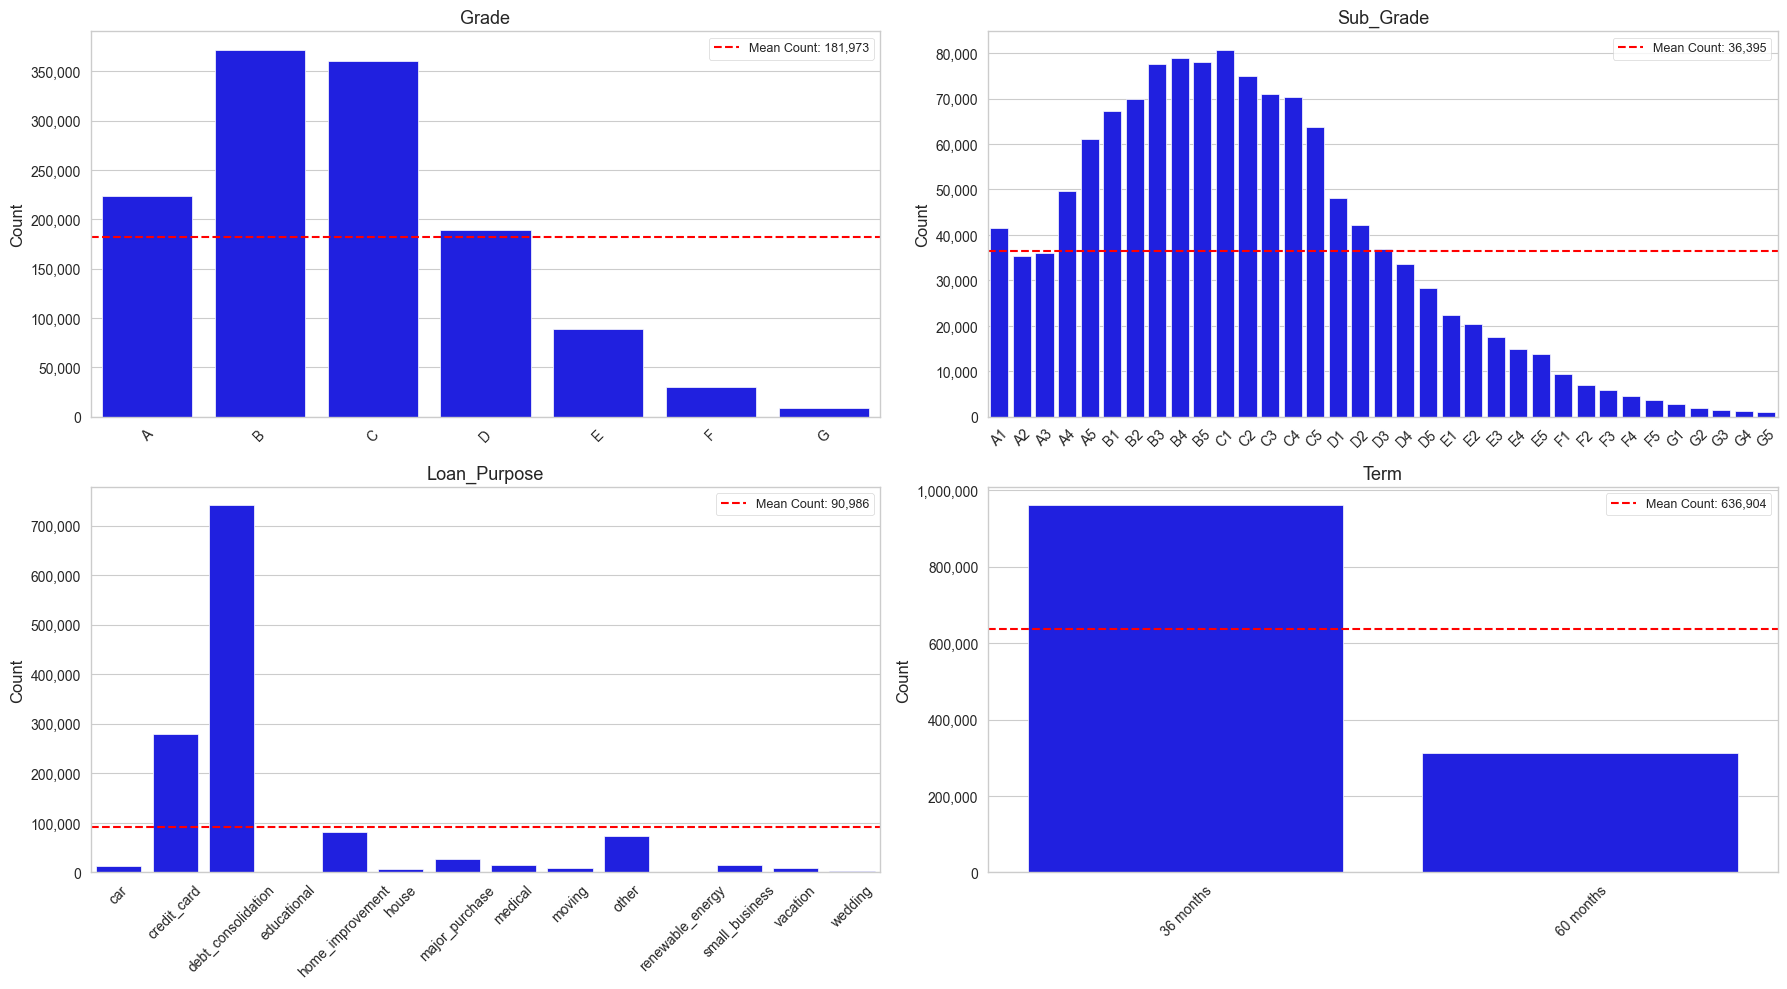

In [32]:
#Bar Plots Distribution- Grade, Sub Grade, Loan Purpose, Term
custom_bar_subplots_2x2(Accepted_Only, 'Grade', 'Sub_Grade', 'Loan_Purpose', 'Term')

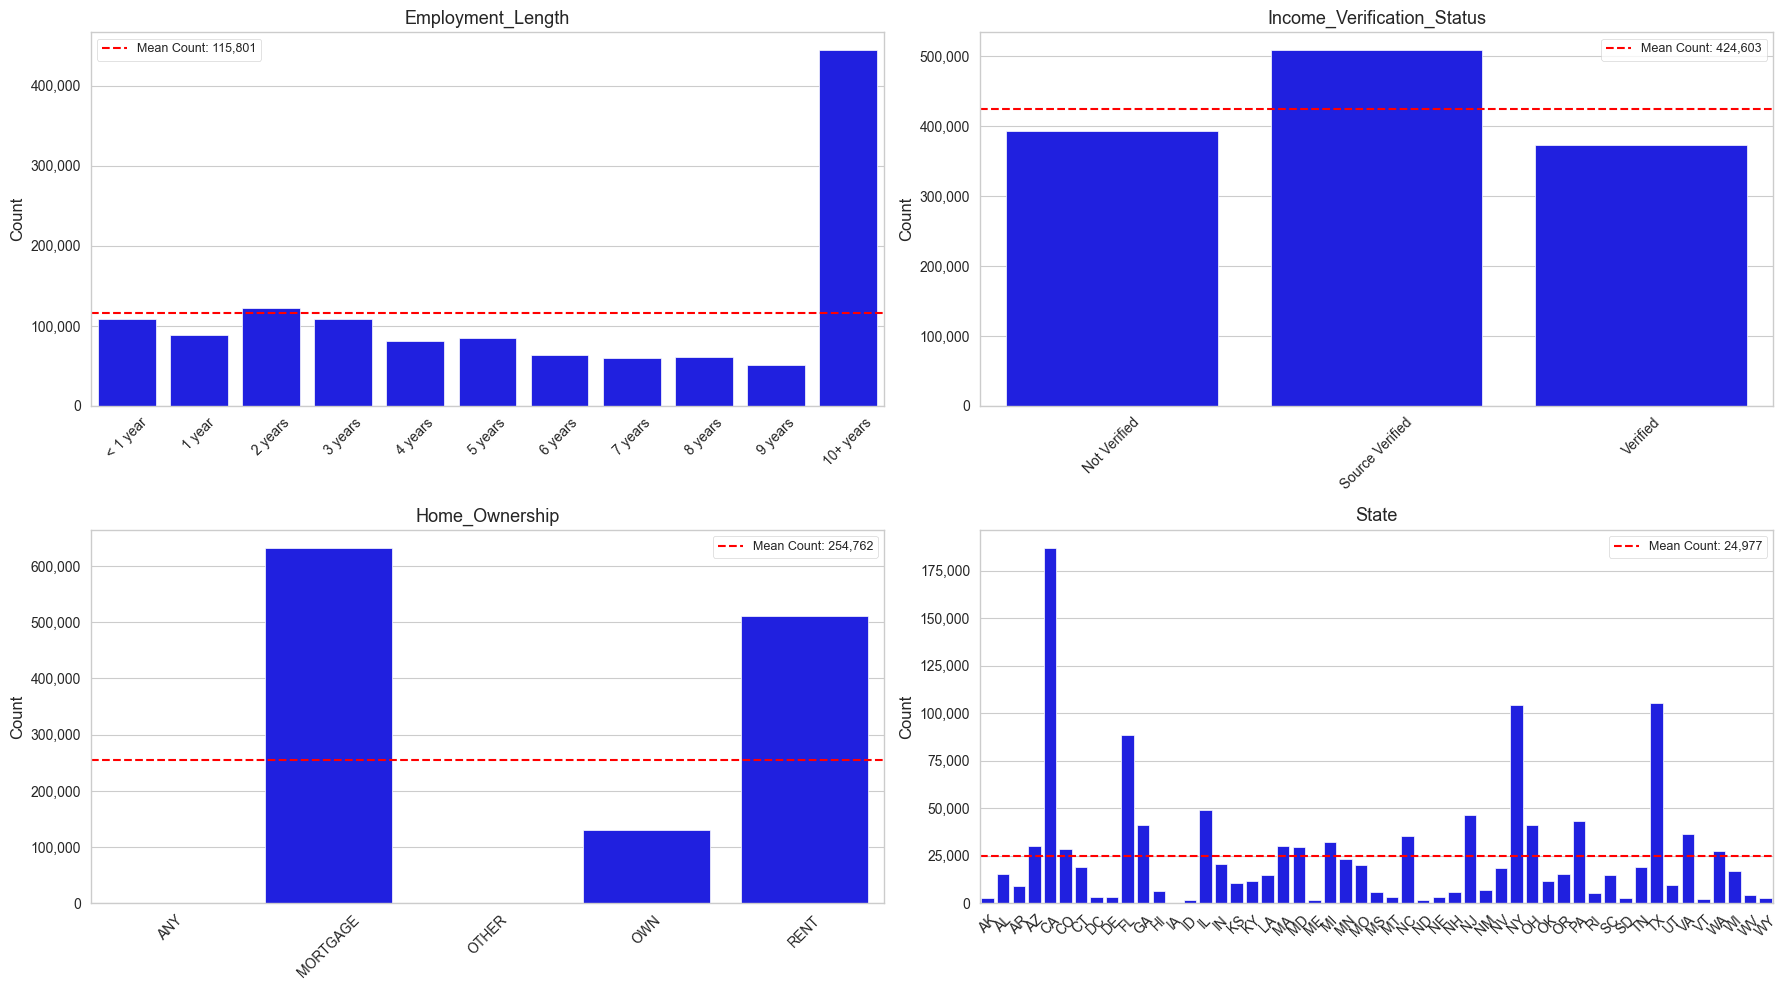

In [33]:
#Bar Plots Distribution- Employment Length, Income Verification, Home Ownership, State
custom_bar_subplots_2x2(Accepted_Only, 'Employment_Length', 'Income_Verification_Status', 'Home_Ownership', 'State')

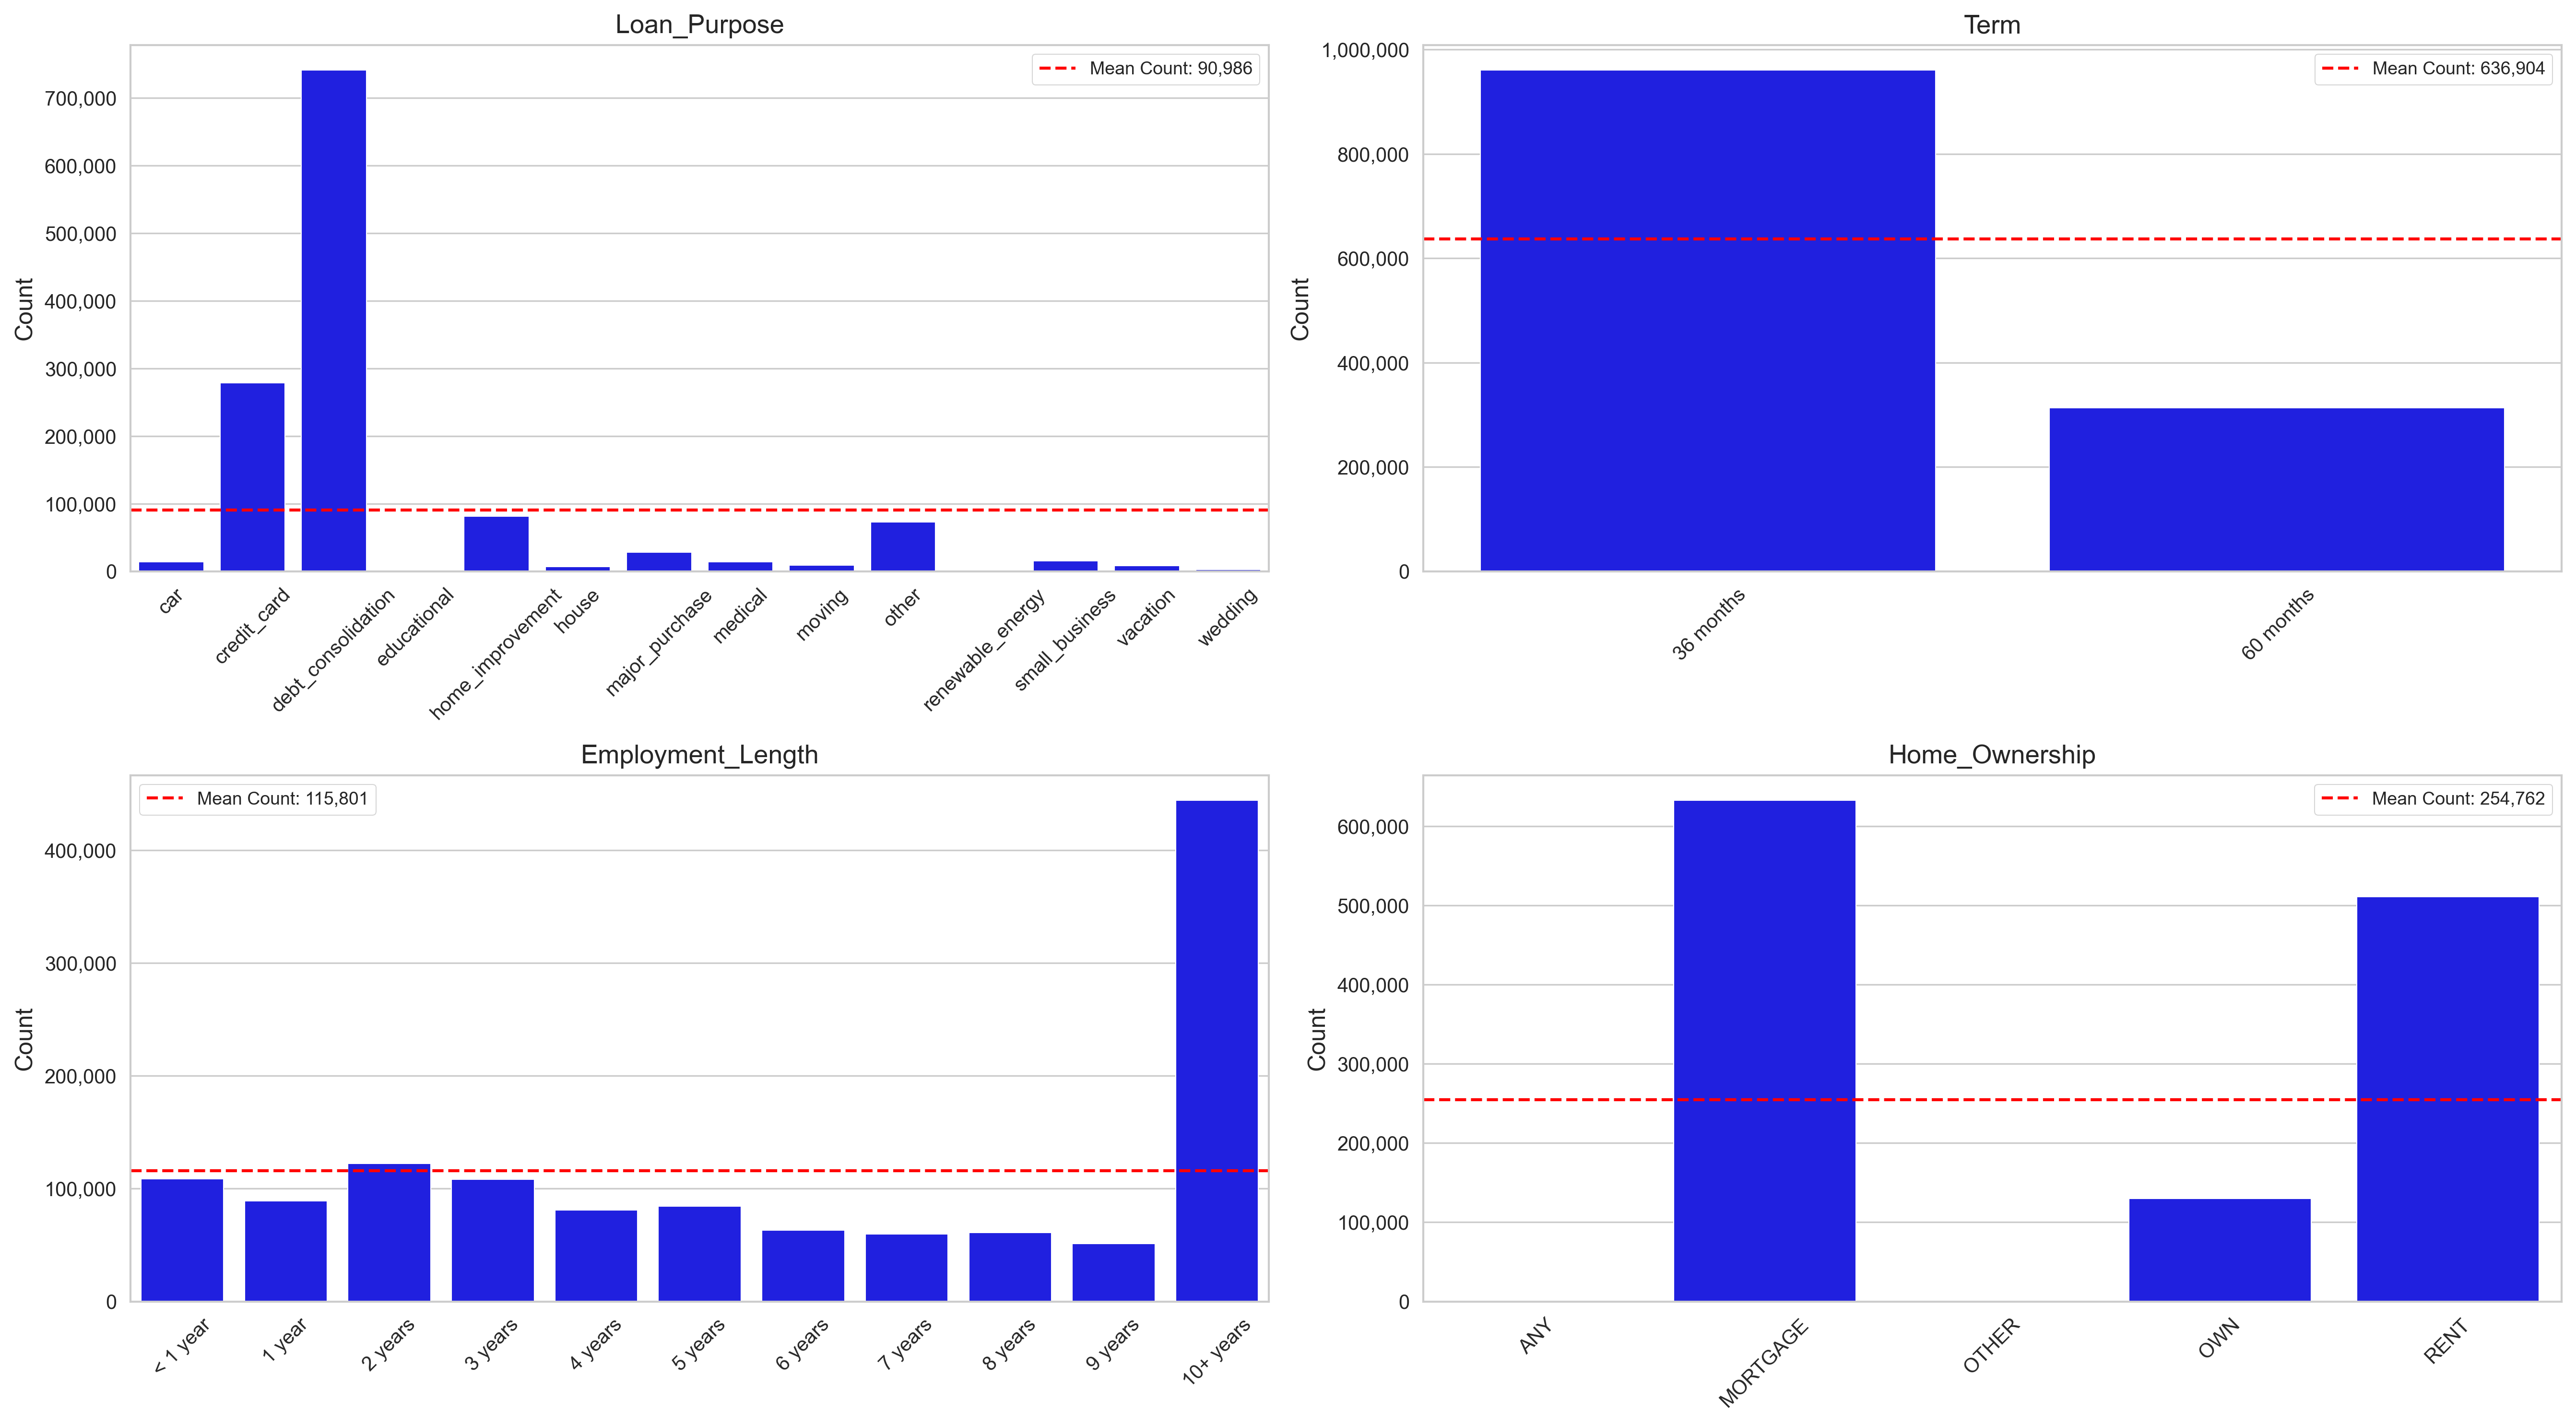

In [23]:
custom_bar_subplots_2x2(Accepted_Only, 'Loan_Purpose', 'Term', 'Employment_Length', 'Home_Ownership')

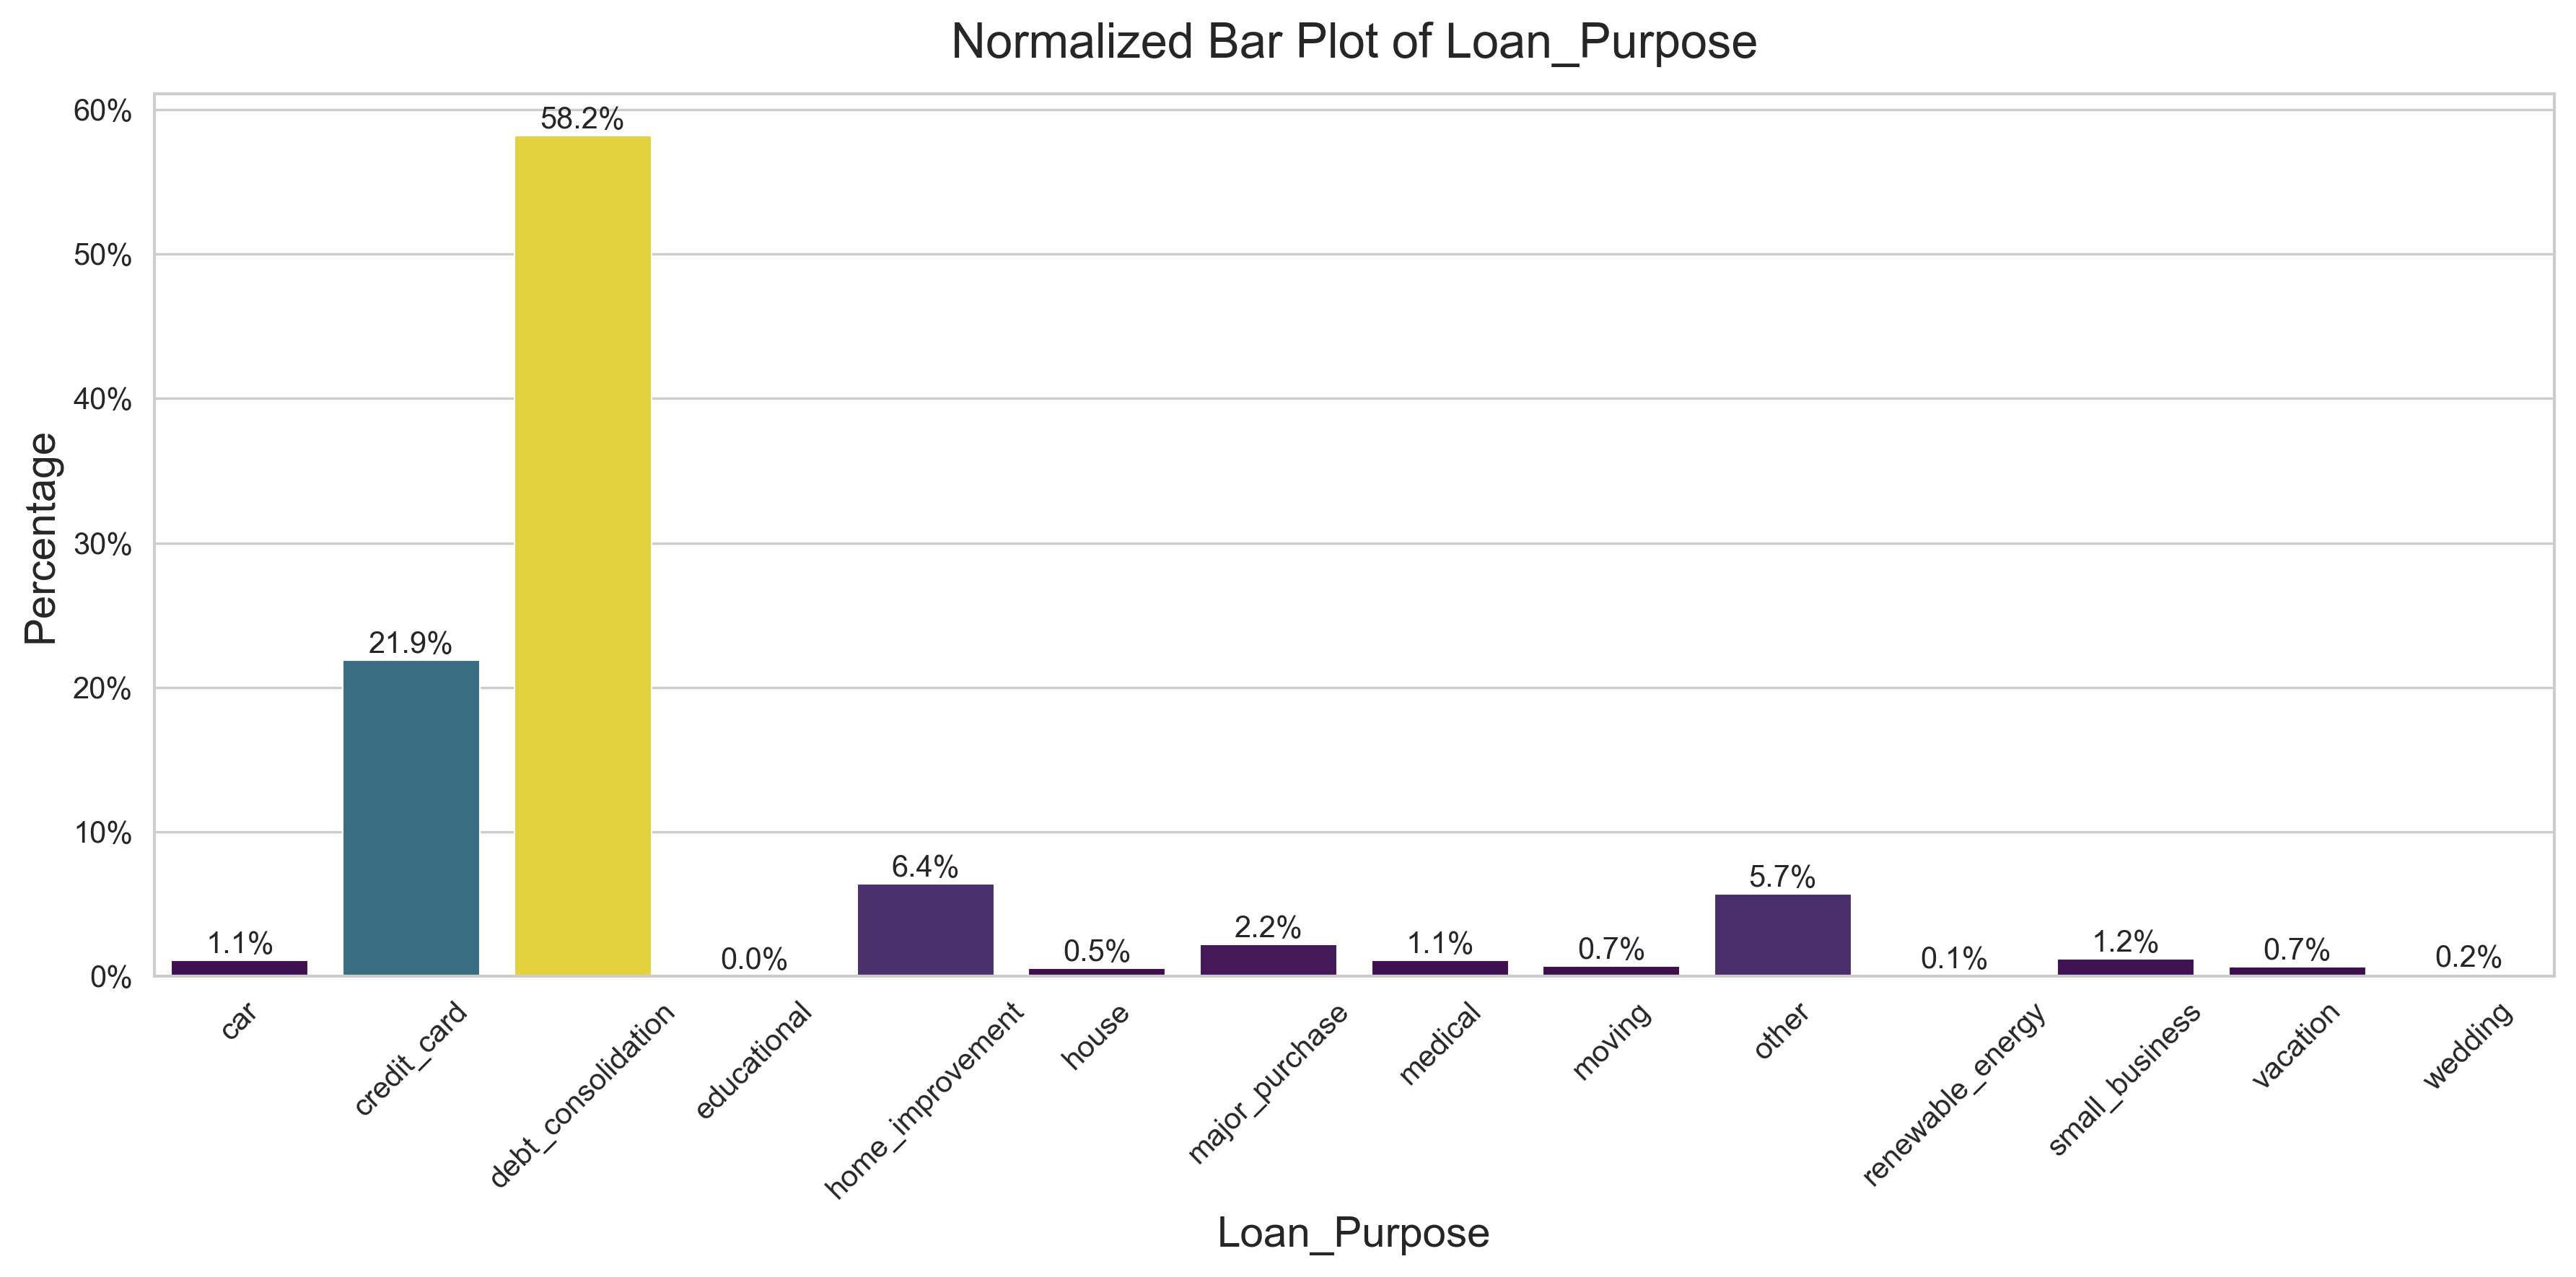

In [18]:
normalized_bar_plot('Loan_Purpose', Accepted_Only)

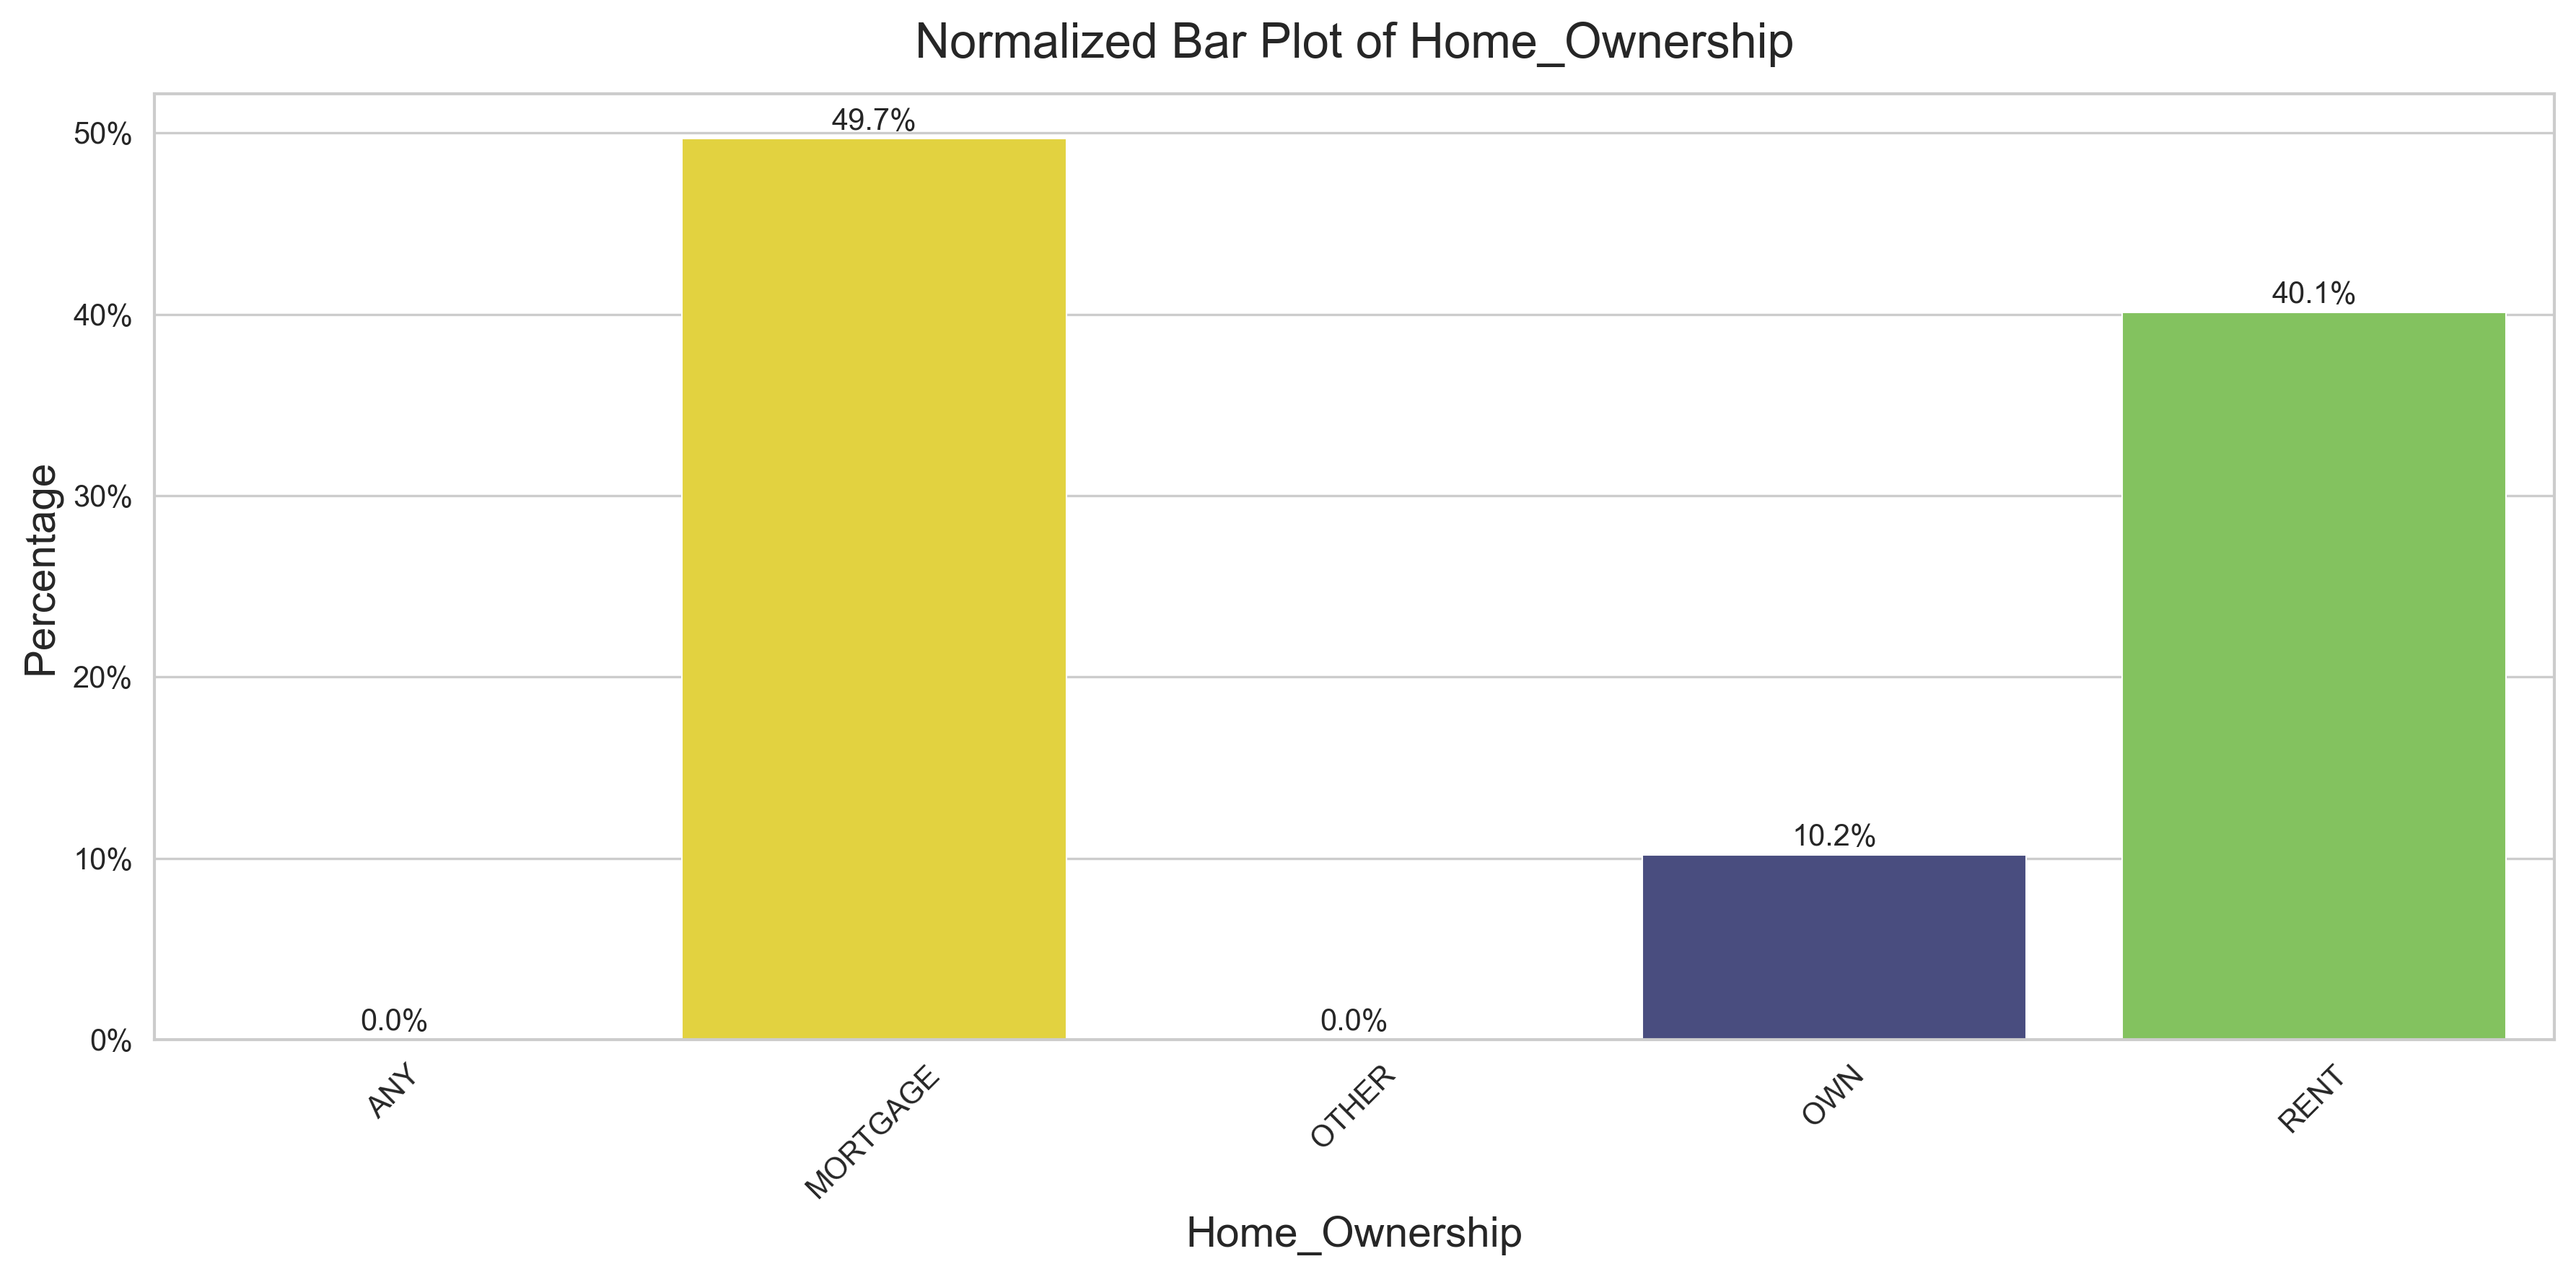

In [19]:
normalized_bar_plot('Home_Ownership', Accepted_Only)

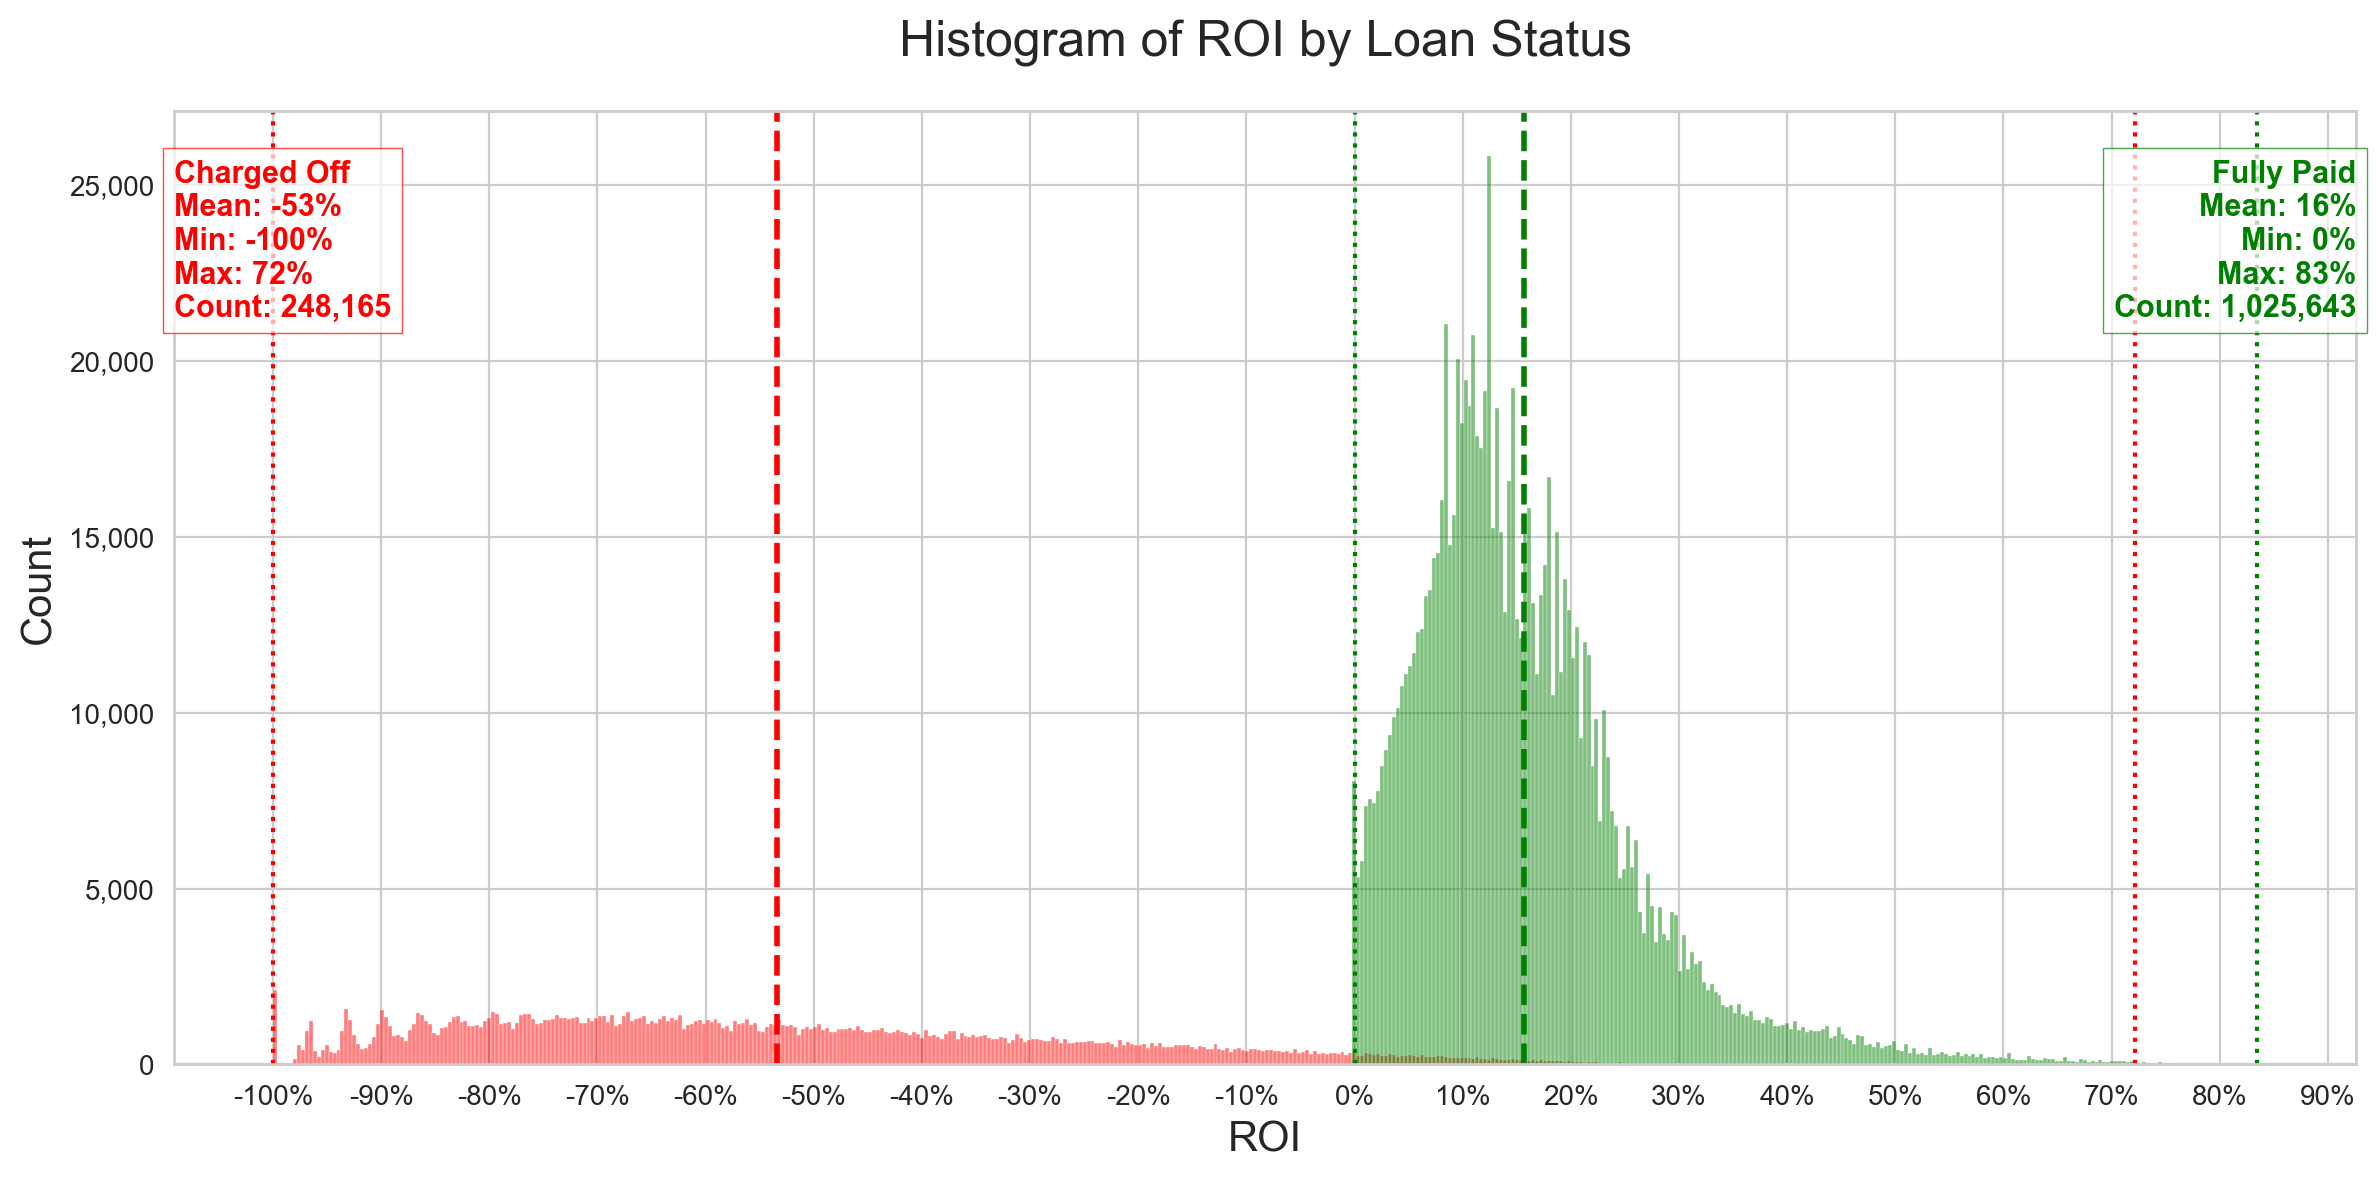

In [35]:
stacked_hist_status('ROI_funded_amount')

In [35]:
#ROI_loan Range of Paid Loans
print('Min ROI:', Accepted_Only_Paid['ROI_loan_amount'].min())
print('Max ROI:', Accepted_Only_Paid['ROI_loan_amount'].max())
Accepted_Only_Paid['ROI_loan_amount'].describe()
#print(Accepted_Only_Paid['ROI'].value_counts(dropna=False).sort_index())

Min ROI: -88.6832
Max ROI: 83.4629


count   1,025,643
mean           16
std            11
min           -89
25%             9
50%            14
75%            20
max            83
Name: ROI_loan_amount, dtype: float64

In [36]:
#ROI_loan Range of Charged Off Loans
print('Min ROI:', Accepted_Only_ChargedOff['ROI_loan_amount'].min())
print('Max ROI:', Accepted_Only_ChargedOff['ROI_loan_amount'].max())
Accepted_Only_ChargedOff['ROI_loan_amount'].describe()
#print(Accepted_Only_ChargedOff['ROI'].value_counts(dropna=False).sort_index())

Min ROI: -100.0
Max ROI: 72.1845882352941


count   248,165
mean        -53
std          28
min        -100
25%         -76
50%         -58
75%         -35
max          72
Name: ROI_loan_amount, dtype: float64

In [37]:
Accepted_Only_Paid['NetPrincipal_LoanAmount'] = Accepted_Only_Paid['Principal_Received'] - Accepted_Only_Paid['Loan_Amount']
Accepted_Only_Paid['NetPrincipal_FundedAmount'] = Accepted_Only_Paid['Principal_Received'] - Accepted_Only_Paid['Funded_Amount']

In [42]:
Accepted_Only_ChargedOff_trim = Accepted_Only_ChargedOff.drop(['ROI_loan_amount', 'Loan_Amount'], axis=1)
Accepted_Only_ChargedOff_trim[Accepted_Only_ChargedOff_trim['ROI_funded_amount'] > 0].sort_values(by='ROI_funded_amount', ascending=False).head()

Loan_Status     Co-Sign        Term Grade Sub_Grade  FICO_Score  \
1045971  Charged Off  Individual   60 months     G        G1         672   
1024915  Charged Off  Individual   60 months     F        F5         682   
958862   Charged Off  Individual   60 months     E        E5         662   
970616   Charged Off  Individual   60 months     G        G1         662   
1015195  Charged Off  Individual   60 months     F        F4         662   

        Employment_Length Income_Verification_Status  Income_Annual  \
1045971           2 years            Source Verified         95,000   
1024915         10+ years                   Verified        105,000   
958862             1 year                   Verified        100,000   
970616          10+ years                   Verified         85,000   
1015195           3 years                   Verified         46,000   

         Existing_Debt_Payments_Annual  Debt-Income  \
1045971                         11,296           12   
1024915                         15,162           14   
958862                          27,320           27   
970616                          18,420           22   
1015195                          7,838           17   

         Installment-Income_Monthly  Loan-Income  Existing_LoanBal-Income  \
1045971                           6           18                        0   
1024915                           6           16                        0   
958862                           12           35                        0   
970616                           10           28                        0   
1015195                          12           35                        0   

         MortgageBal-Income  RevolvingBal-Income  Revolving_Util  \
1045971                 142                    8              72   
1024915                 122                    6              63   
958862                    0                   29              94   
970616                    0                   37              85   
1015195                   0                   42              84   

         OnTime_Payment_%  PastDue-Income  Int_Rate  ROI_funded_amount  \
1045971                91               0        25                 72   
1024915                96               0        25                 71   
958862                 95               0        23                 71   
970616                 86               0        26                 70   
1015195               100               0        25                 70   

         Funded_Amount  Return_Total  Principal_Received  Interest_Received  \
1045971         17,000        29,271              16,462             12,809   
1024915         16,500        28,247              15,547             12,700   
958862          35,000        59,684              34,963             24,721   
970616          24,000        40,833              21,853             18,945   
1015195         16,000        27,178              15,091             12,087   

         LateFees_Received  Revolving_Balance  Year  Bankruptcies  \
1045971                  0              7,814  2013             0   
1024915                  0              6,131  2013             0   
958862                   0             29,227  2013             0   
970616                  36             31,639  2013             0   
1015195                  0             19,270  2013             0   

         Charge-Offs_12m  Collections_12m  Delinquencies_>120days_Ever  \
1045971                0                0                            1   
1024915                0                0                            1   
958862                 0                0                            0   
970616                 0                0                            1   
1015195                0                0                            0   

         Delinquencies_>90days_24m  Delinquent_Accounts  \
1045971                          0                    0   
1024915                 

In [39]:
#NetPrincipal based on Loan Amount
print('Min:', Accepted_Only_Paid['NetPrincipal_LoanAmount'].min())
print('Max:', Accepted_Only_Paid['NetPrincipal_LoanAmount'].max())
Accepted_Only_Paid['NetPrincipal_LoanAmount'].describe()

Min: -21150.0
Max: 0.25


count   1,025,643
mean           -9
std           266
min       -21,150
25%             0
50%             0
75%             0
max             0
Name: NetPrincipal_LoanAmount, dtype: float64

In [40]:
#NetPrincipal based on Funded Amount
print('Min:', Accepted_Only_Paid['NetPrincipal_FundedAmount'].min())
print('Max:', Accepted_Only_Paid['NetPrincipal_FundedAmount'].max())
Accepted_Only_Paid['NetPrincipal_FundedAmount'].describe()

Min: -1.9699999999993452
Max: 0.25


count   1,025,643
mean           -0
std             0
min            -2
25%             0
50%             0
75%             0
max             0
Name: NetPrincipal_FundedAmount, dtype: float64

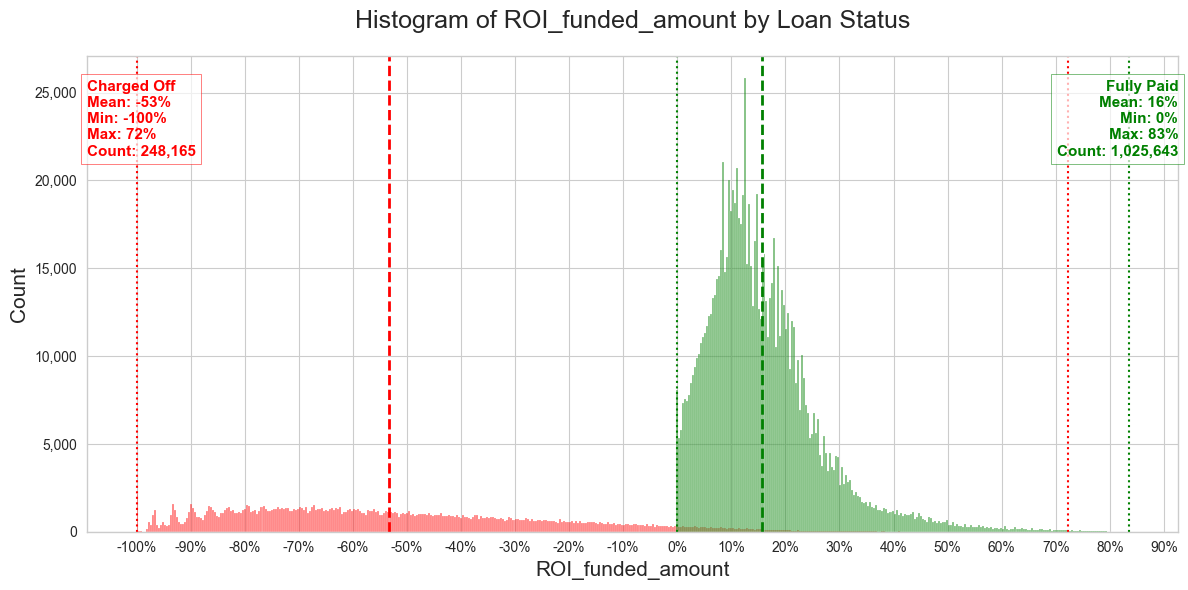

In [41]:
stacked_hist_status('ROI_funded_amount')

In [42]:
print((Accepted_Only['ROI_loan_amount'] - Accepted_Only['ROI_funded_amount']).describe())

count   1,273,808
mean           -0
std             1
min          -122
25%             0
50%             0
75%             0
max             0
dtype: float64


In [43]:
#Charged Off Only Positive ROI
Accepted_Only_ChargedOff.loc[Accepted_Only_ChargedOff['ROI_funded_amount'] > 0].sort_values(by='ROI_funded_amount', ascending=False).head(20)

Loan_Status     Co-Sign        Term Grade Sub_Grade  Risk_Score  \
1045971  Charged Off  Individual   60 months     G        G1         672   
1024915  Charged Off  Individual   60 months     F        F5         682   
958862   Charged Off  Individual   60 months     E        E5         662   
970616   Charged Off  Individual   60 months     G        G1         662   
1015195  Charged Off  Individual   60 months     F        F4         662   
965140   Charged Off  Individual   60 months     F        F5         672   
996085   Charged Off  Individual   60 months     F        F5         662   
1042400  Charged Off  Individual   60 months     E        E5         682   
1018312  Charged Off  Individual   60 months     F        F4         672   
998839   Charged Off  Individual   60 months     G        G2         687   
696388   Charged Off  Individual   60 months     F        F2         672   
979806   Charged Off  Individual   60 months     F        F3         692   
969100   Charged Off  Individual   60 months     F        F5         672   
1095757  Charged Off  Individual   60 months     F        F1         667   
1014266  Charged Off  Individual   60 months     F        F3         687   
1016140  Charged Off  Individual   60 months     F        F2         687   
1040115  Charged Off  Individual   60 months     E        E4         682   
1013412  Charged Off  Individual   60 months     F        F1         662   
1005845  Charged Off  Individual   60 months     F        F3         692   
983714   Charged Off  Individual   60 months     F        F2         667   

        Employment_Length Income_Verification_Status  Income_Annual  \
1045971           2 years            Source Verified         95,000   
1024915         10+ years                   Verified        105,000   
958862             1 year                   Verified        100,000   
970616          10+ years                   Verified         85,000   
1015195           3 years                   Verified         46,000   
965140            3 years            Source Verified         40,000   
996085            7 years            Source Verified         90,000   
1042400           6 years                   Verified         70,000   
1018312         10+ years                   Verified         55,000   
998839           < 1 year            Source Verified         85,000   
696388            6 years                   Verified         39,000   
979806          10+ years            Source Verified         95,000   
969100            4 years                   Verified         48,273   
1095757         10+ years                   Verified         58,000   
1014266         10+ years                   Verified         69,990   
1016140           2 years                   Verified         37,718   
1040115           4 years                   Verified        103,000   
1013412           5 years            Source Verified         80,000   
1005845         10+ years                   Verified         48,000   
983714            7 years            Source Verified         54,000   

         Existing_Debt_Payments_Annual  Debt-Income  \
1045971                         11,296           12   
1024915                         15,162           14   
958862                          27,320           27   
970616                          18,420           22   
1015195                          7,838           17   
965140                           5,556           14   
996085                          10,539           12   
1042400                         13,783           20   
1018312                          8,222           15   
998839                          12,291           14   
696388                          10,600           27   
979806                          13,889           15   
969100                           6,710           14   
1095757                          7,215           12   
1014266                         19,919           28   
1016140                          5,401  

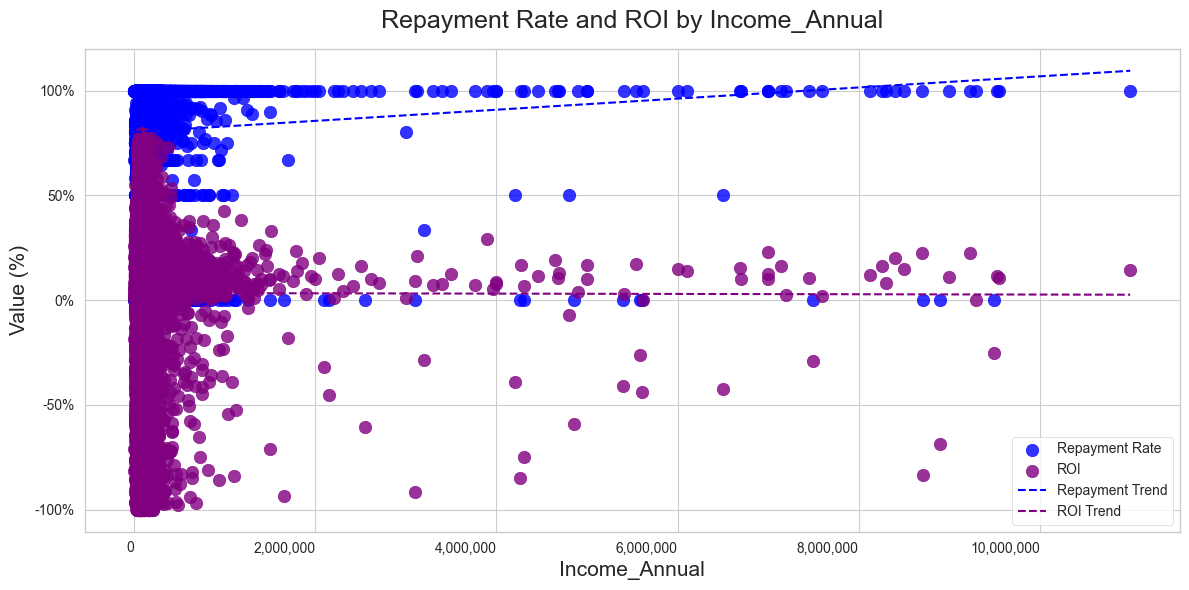

In [44]:
#Income_Annual vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('Income_Annual')

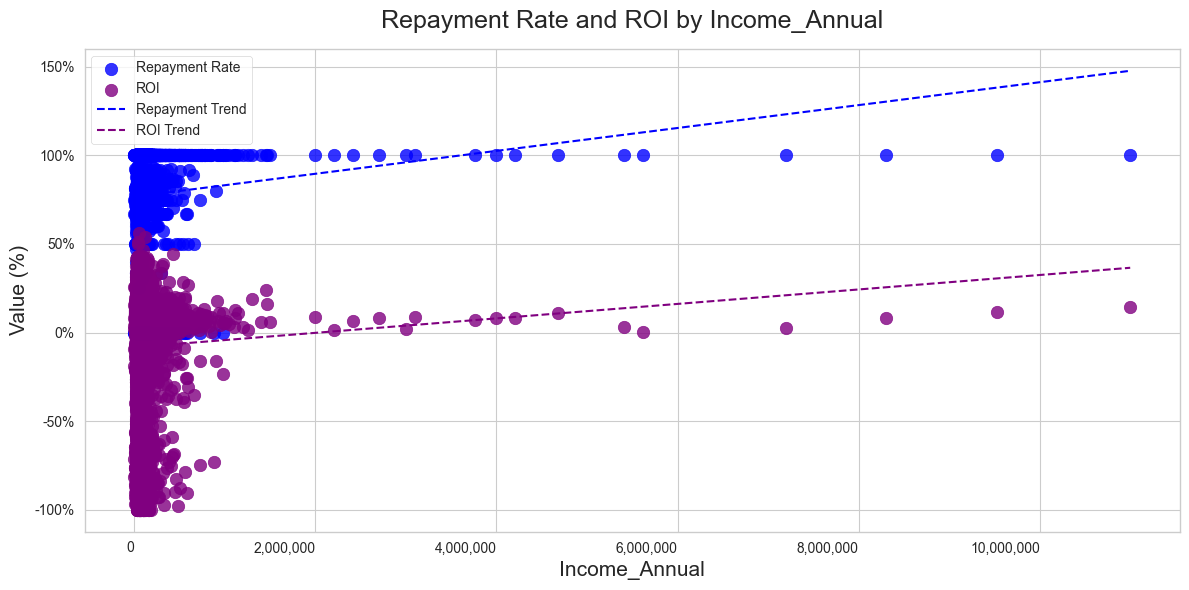

In [45]:
#Income_Annual vs ROI & Repayment Rate (2017 only)
Repayment_ROI_scatter_plot_reg('Income_Annual', df=Accepted_Only_2017)

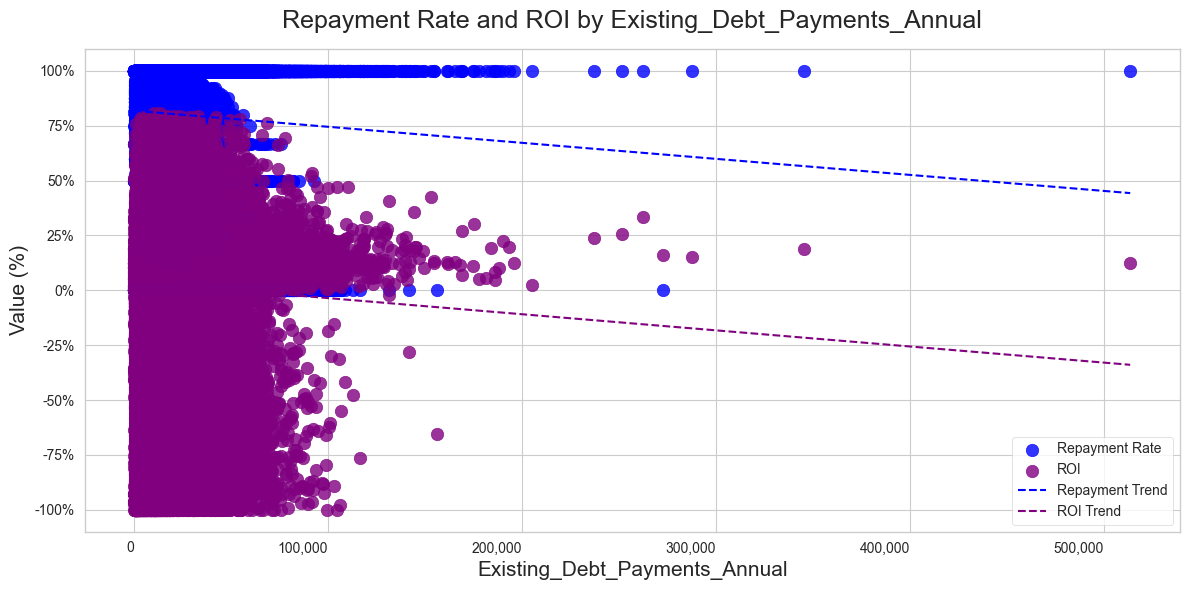

In [46]:
#Existing_Debt_Payments_Annual vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('Existing_Debt_Payments_Annual')

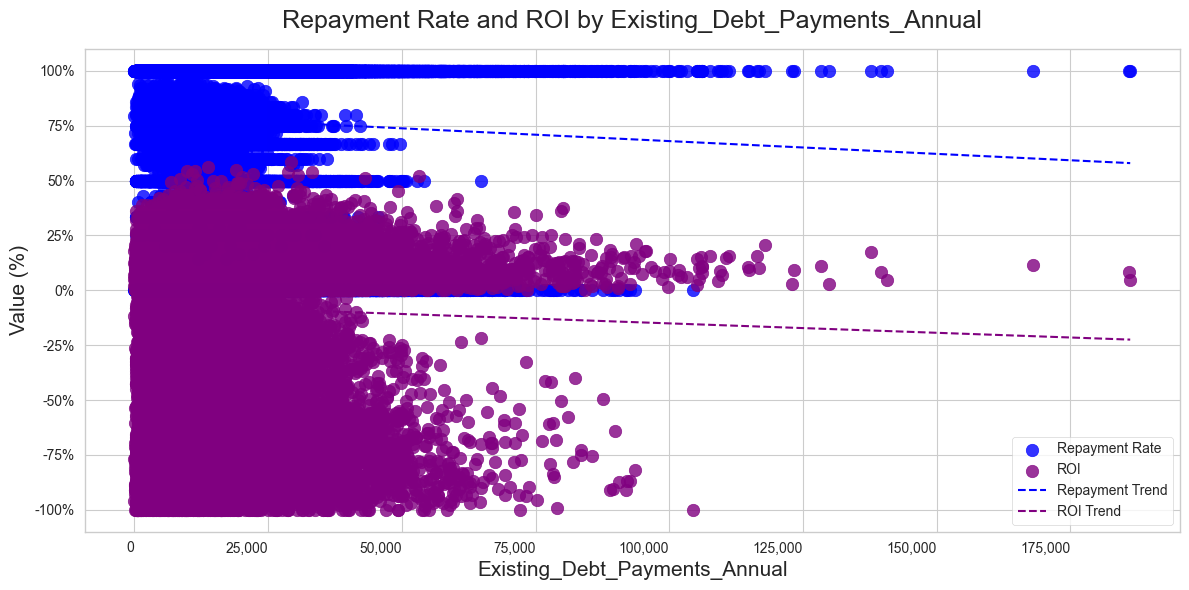

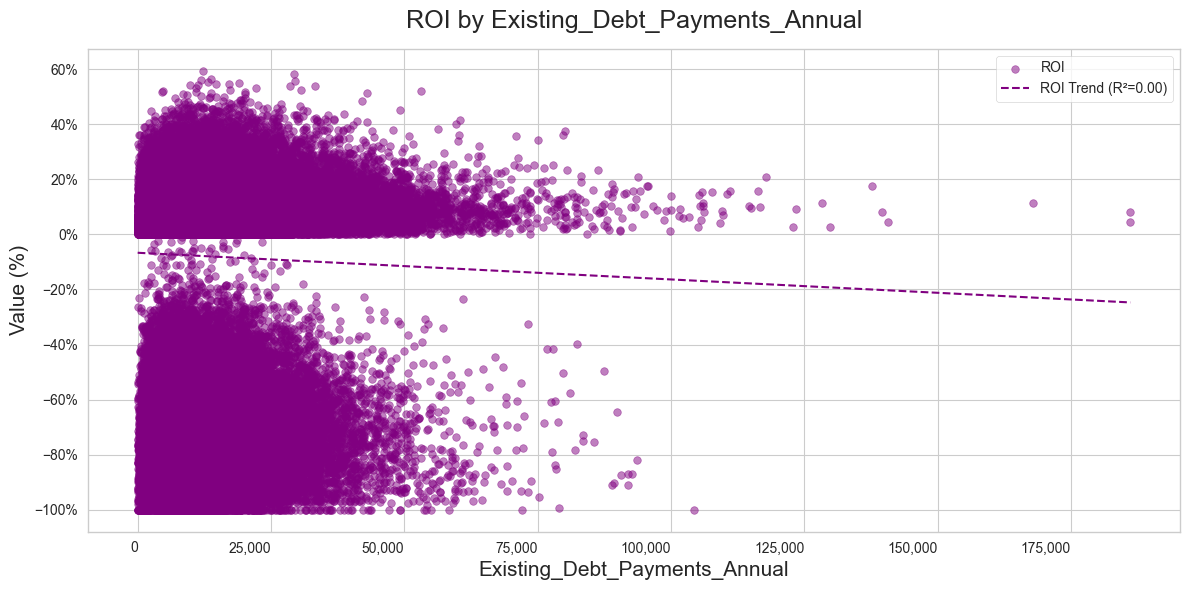

In [47]:
#Existing_Debt_Payments_Annual vs ROI & Repayment Rate (2017 only)
Repayment_ROI_scatter_plot_reg('Existing_Debt_Payments_Annual', df=Accepted_Only_2017)
ROI_scatter_plot_reg('Existing_Debt_Payments_Annual', df=Accepted_Only_2017)

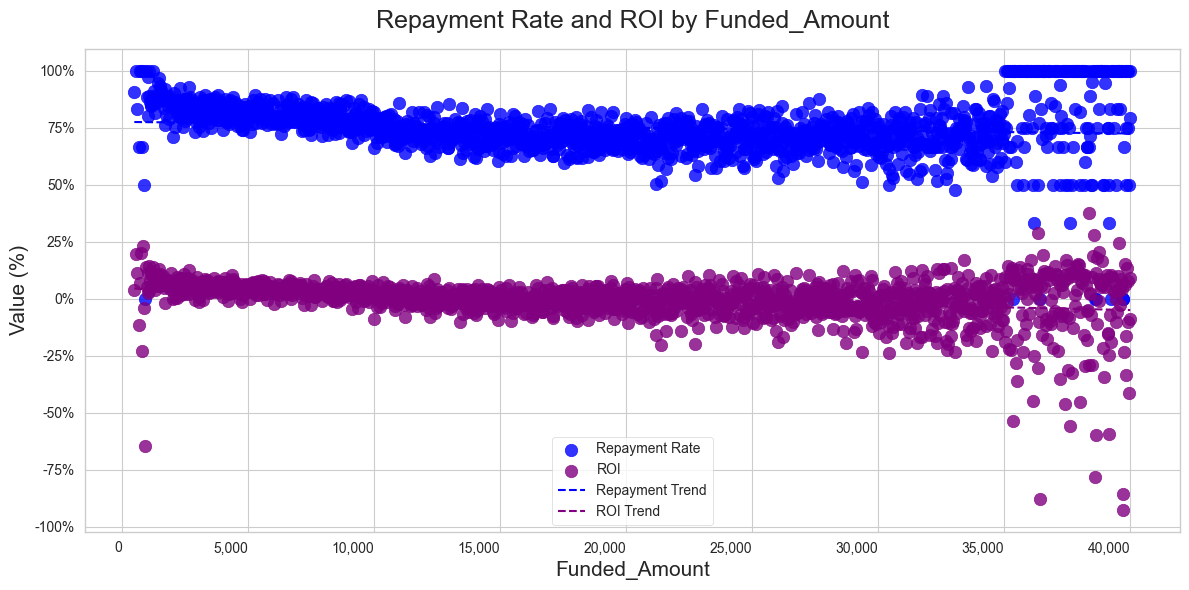

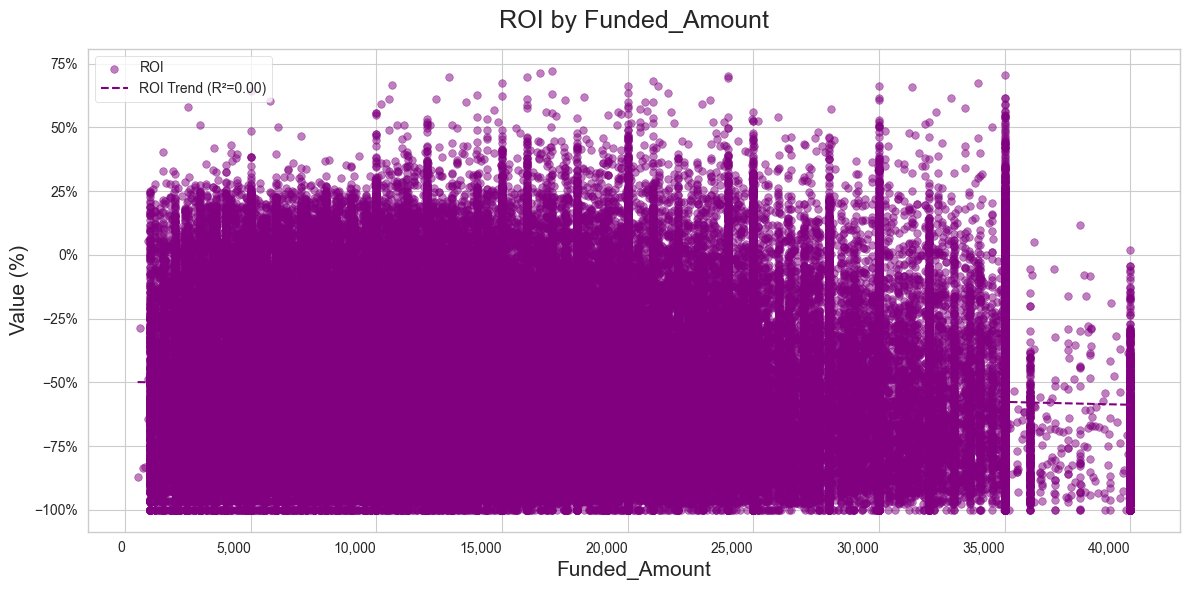

In [48]:
#Funded_Amount vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('Funded_Amount')
ROI_scatter_plot_reg('Funded_Amount')

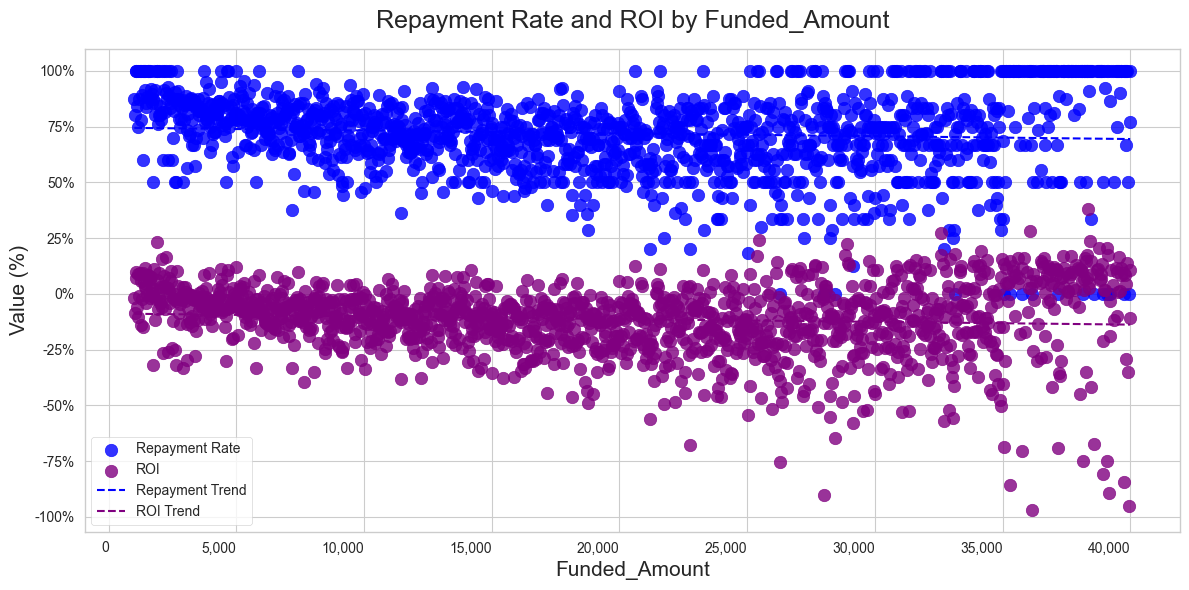

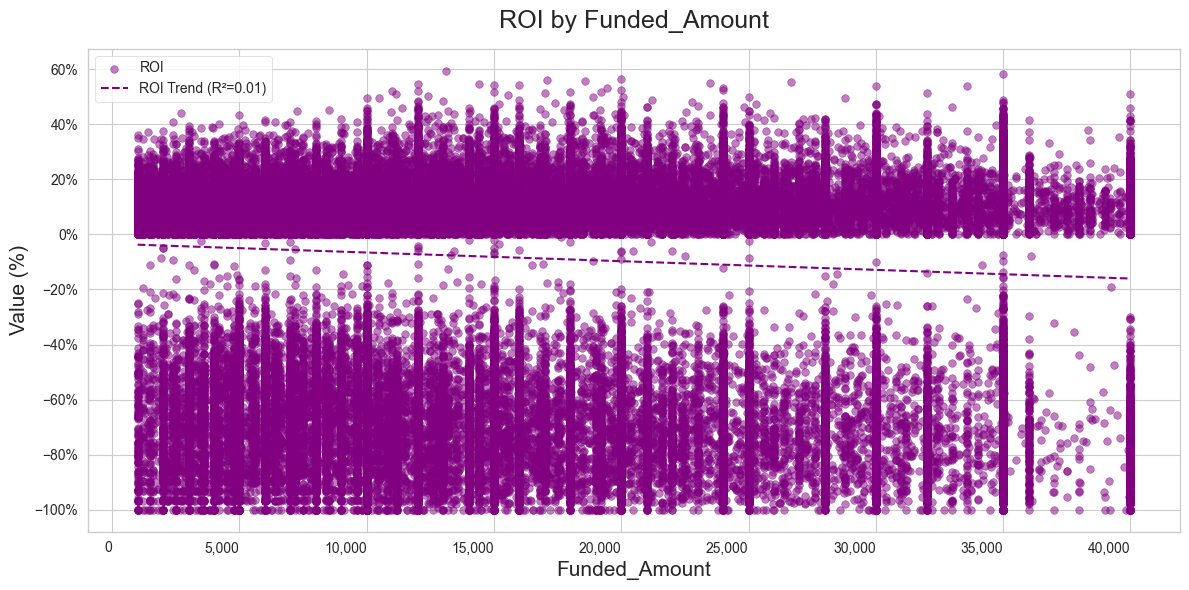

In [49]:
#Funded_Amount vs ROI & Repayment Rate (2017 only)
Repayment_ROI_scatter_plot_reg('Funded_Amount', df=Accepted_Only_2017)
ROI_scatter_plot_reg('Funded_Amount', df=Accepted_Only_2017)

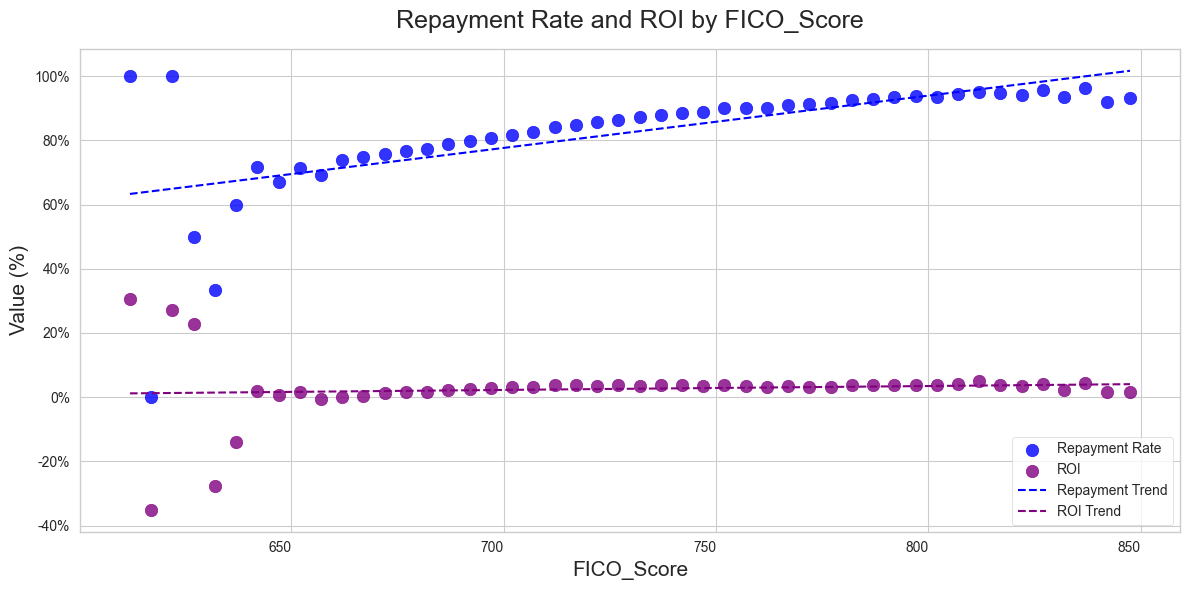

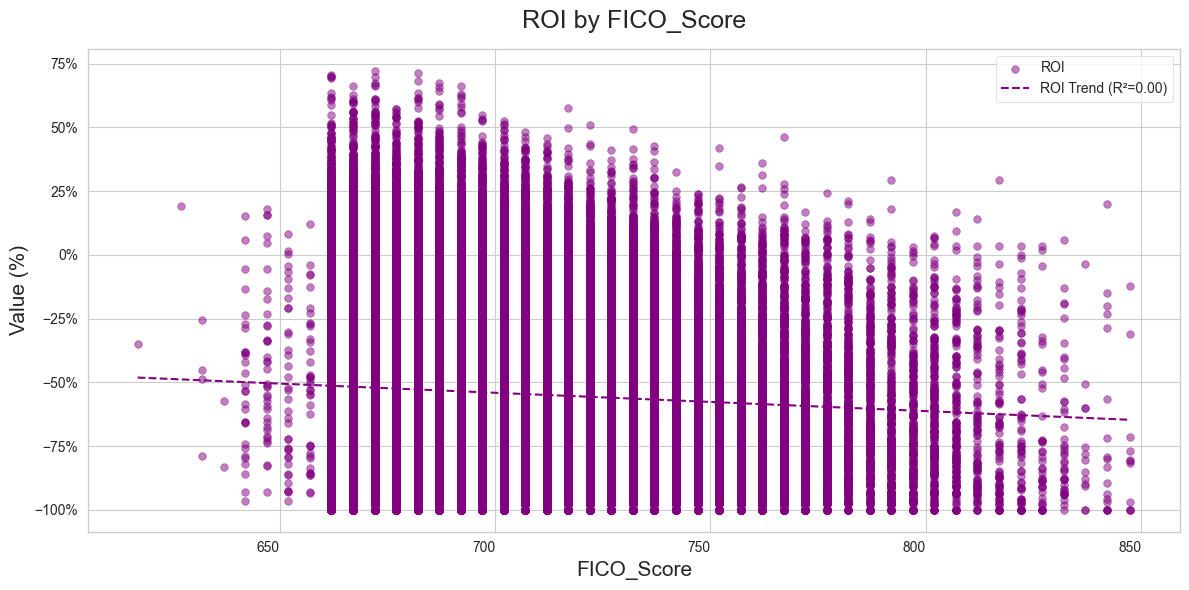

In [20]:
#FICO_Score vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('FICO_Score')
ROI_scatter_plot_reg('FICO_Score')

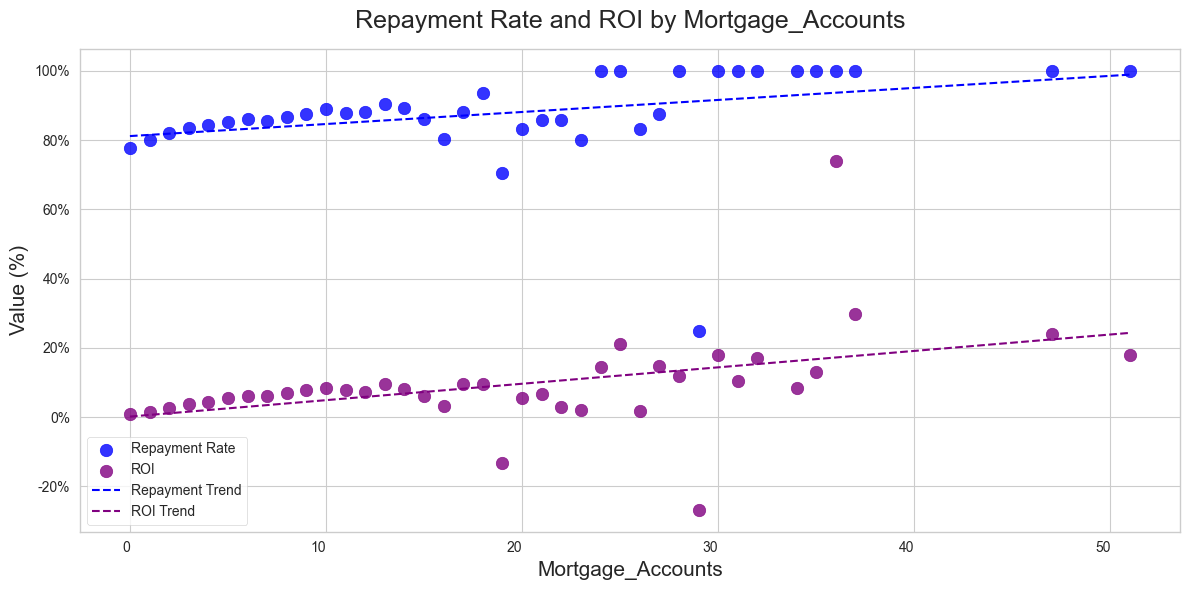

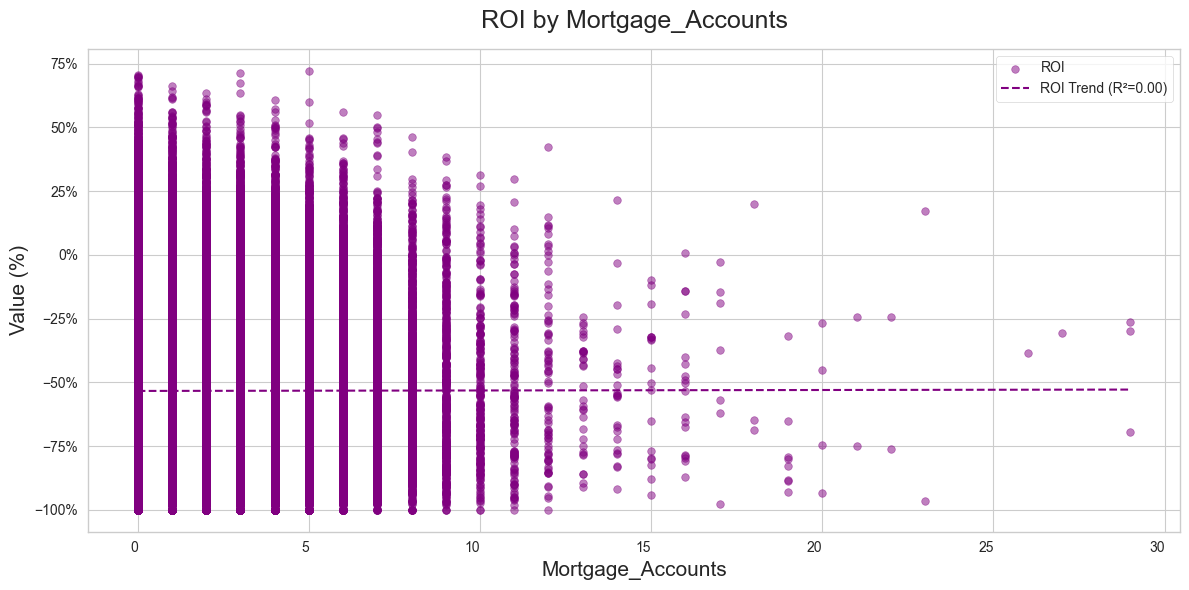

In [51]:
#Mortgage_Accounts vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('Mortgage_Accounts')
ROI_scatter_plot_reg('Mortgage_Accounts')

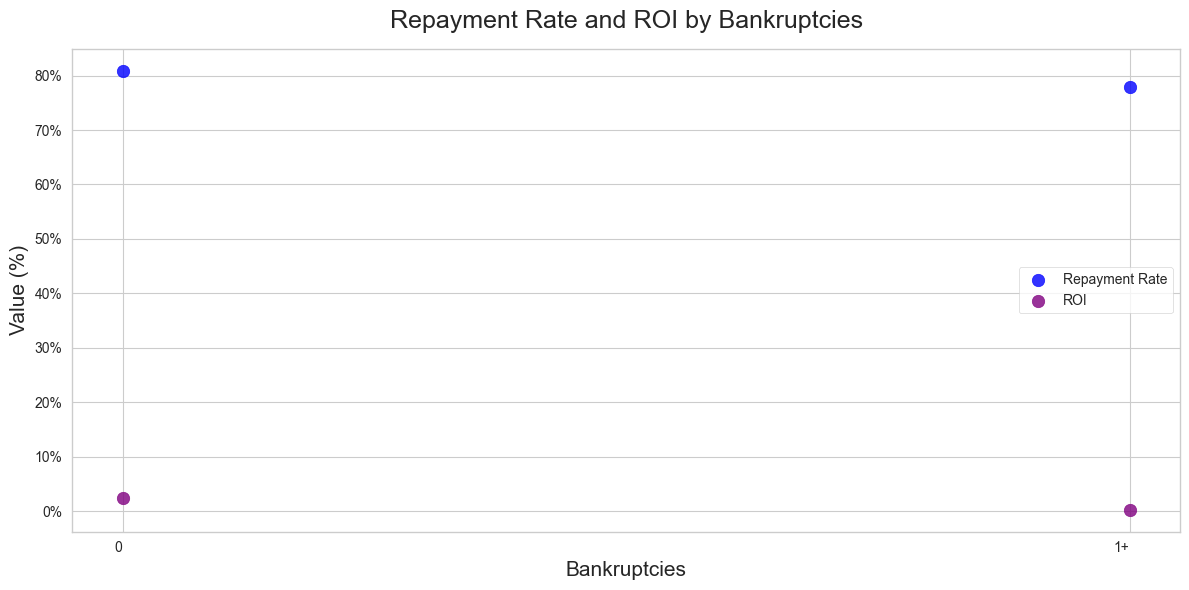

In [52]:
#Debt-Income vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('Bankruptcies', x_format='number')

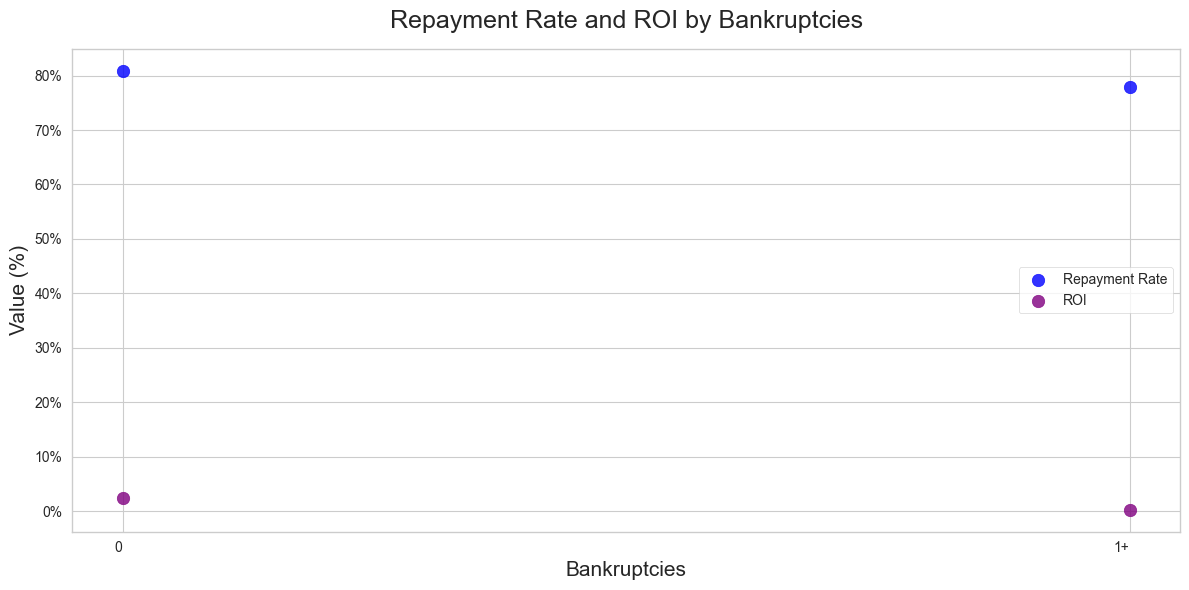

In [53]:
Repayment_ROI_scatter_plot_reg('Bankruptcies', x_format='number', df=Accepted_Only_Bankruptcy)

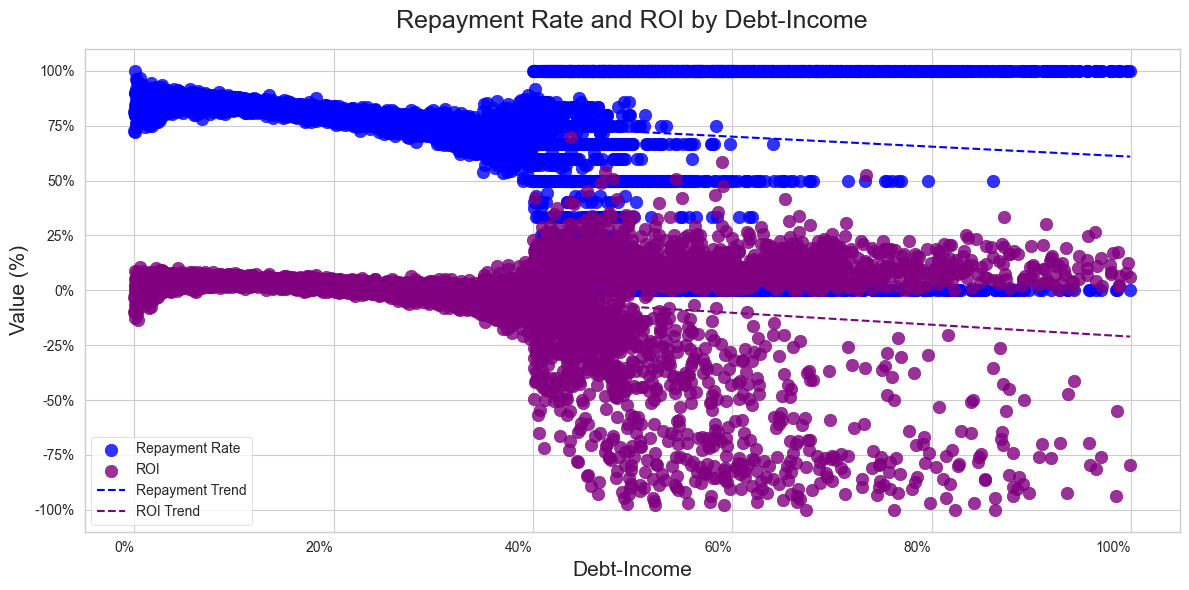

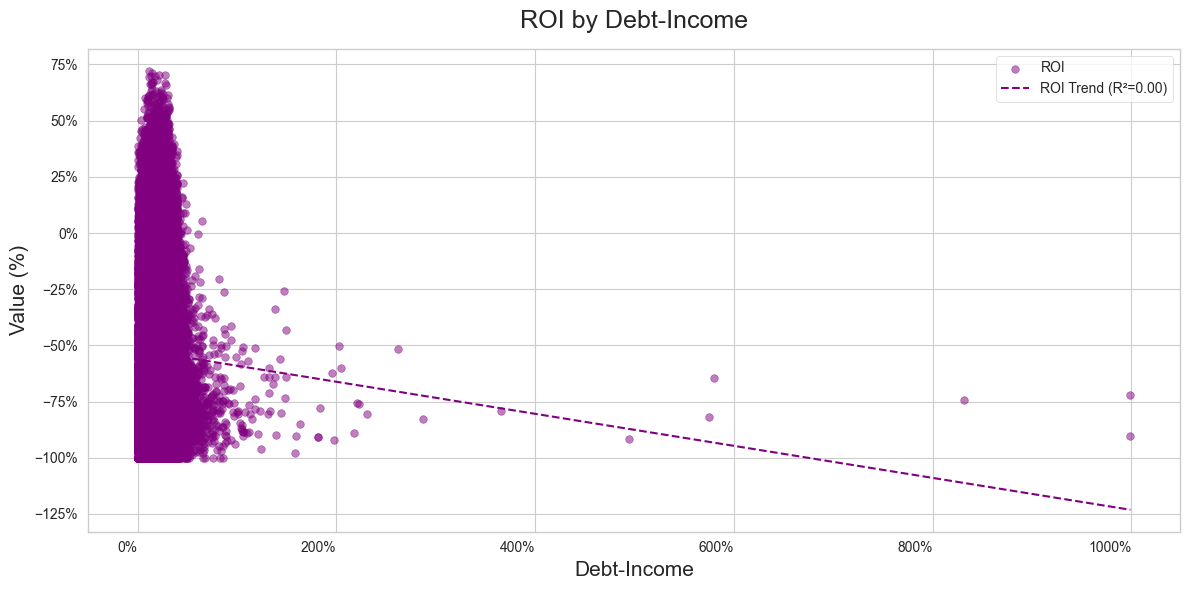

In [33]:
#Debt-Income vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('Debt-Income', x_format='percent', xmax=100)
ROI_scatter_plot_reg('Debt-Income', x_format='percent')

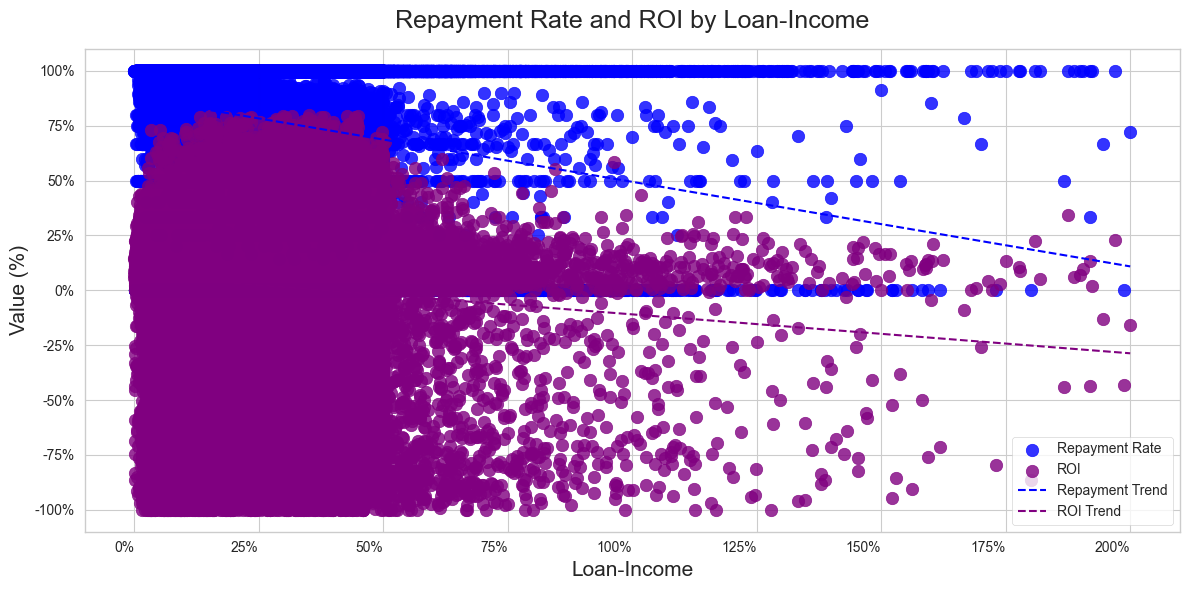

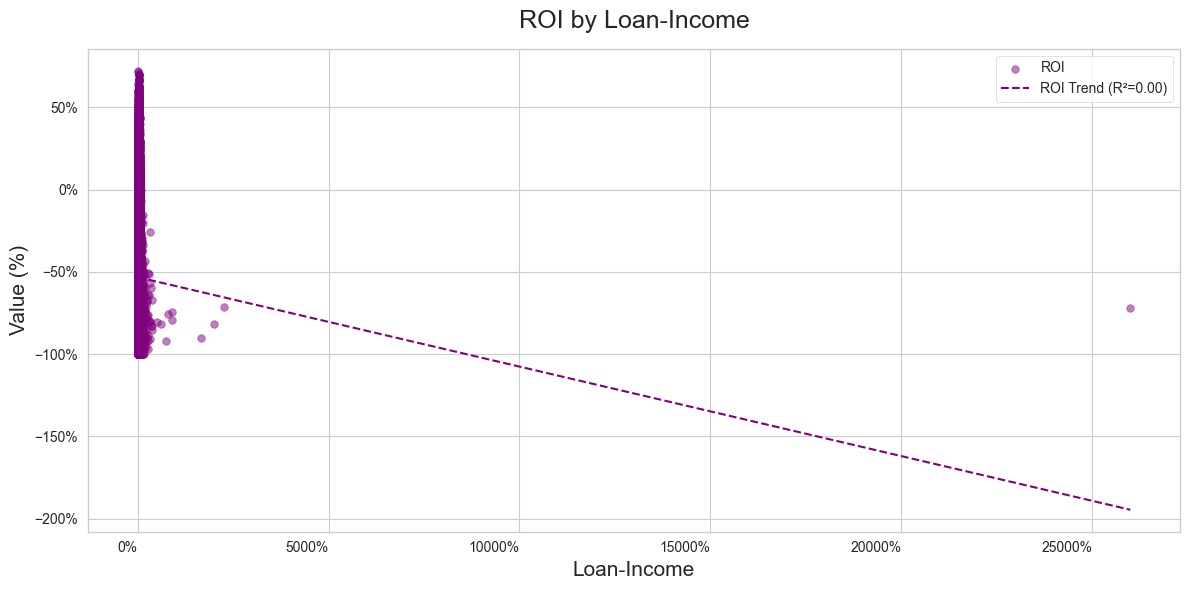

In [32]:
#Loan-Income vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('Loan-Income', x_format='percent', xmax=200)
ROI_scatter_plot_reg('Loan-Income', x_format='percent')

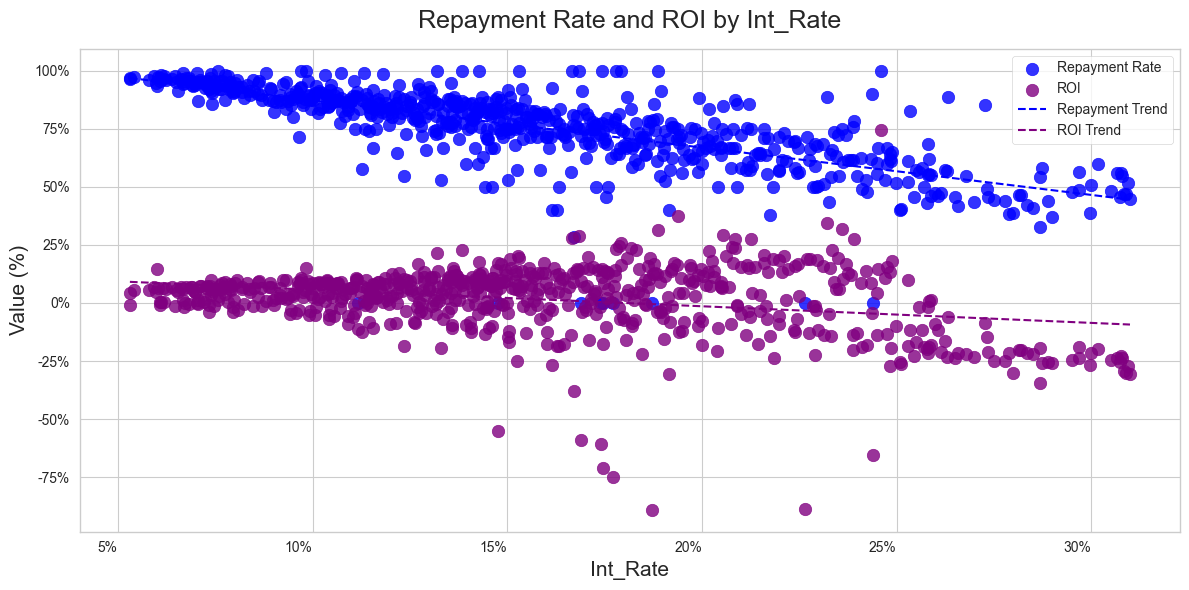

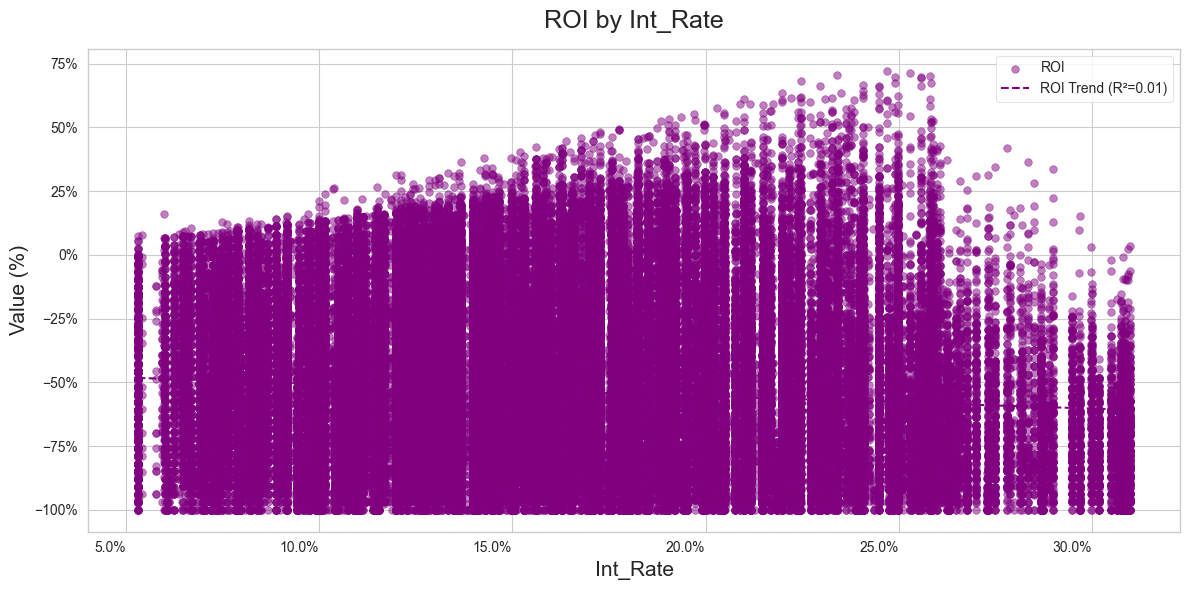

In [56]:
#Int_Rate vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('Int_Rate', x_format='percent')
ROI_scatter_plot_reg('Int_Rate', x_format='percent')

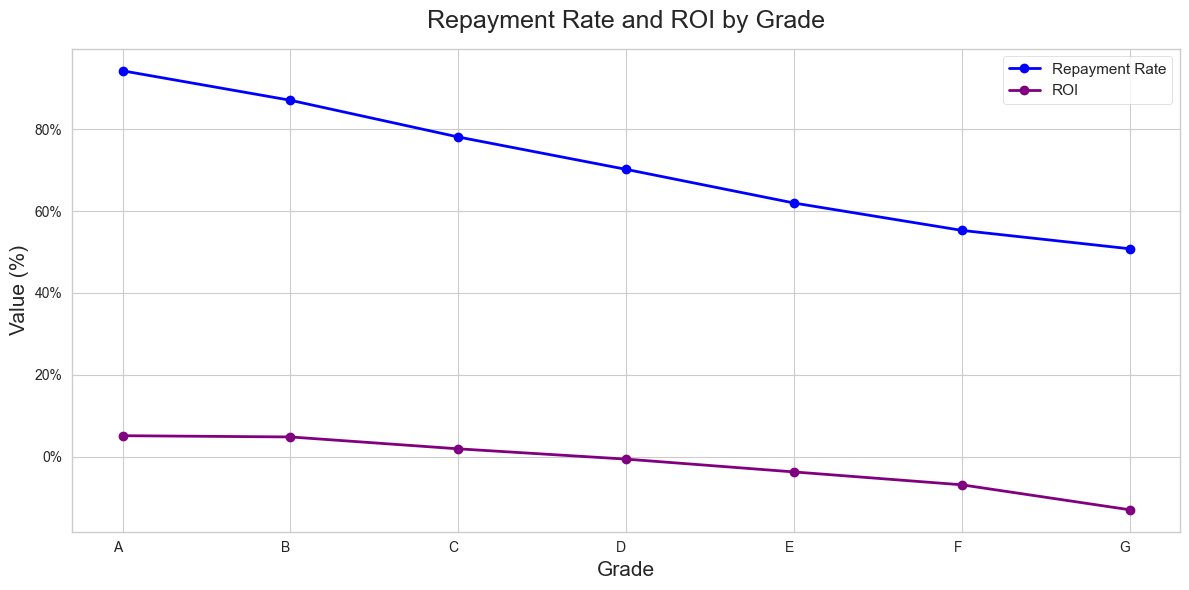

In [57]:
#Grade vs ROI & Repayment Rate
Repayment_ROI_trend_plot('Grade')

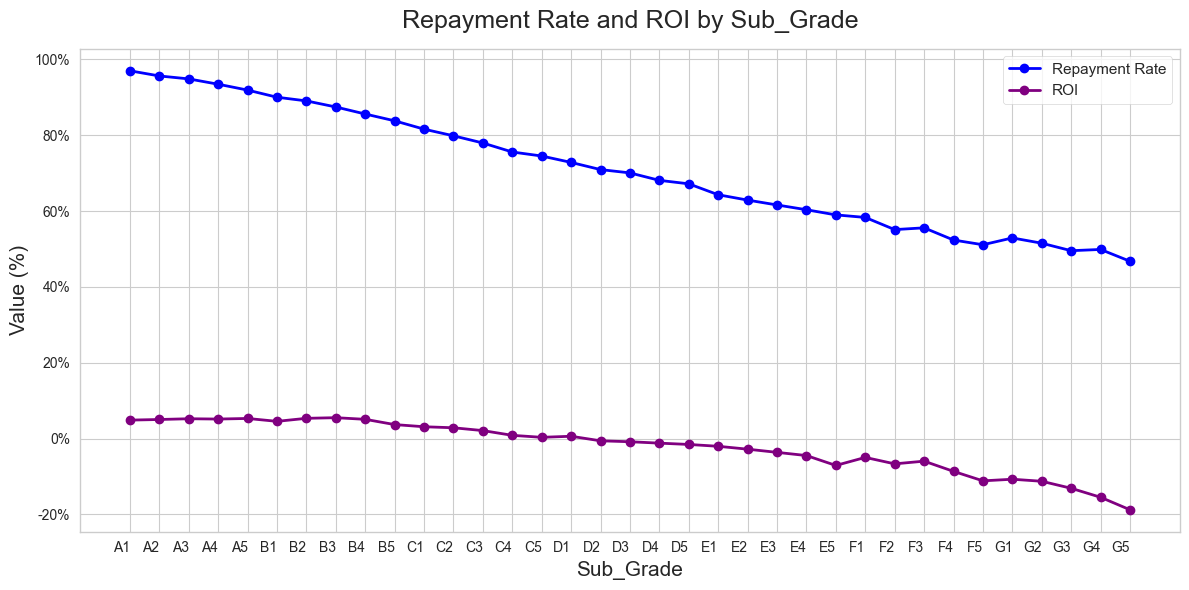

In [58]:
#Sub_Grade vs ROI & Repayment Rate
Repayment_ROI_trend_plot('Sub_Grade')

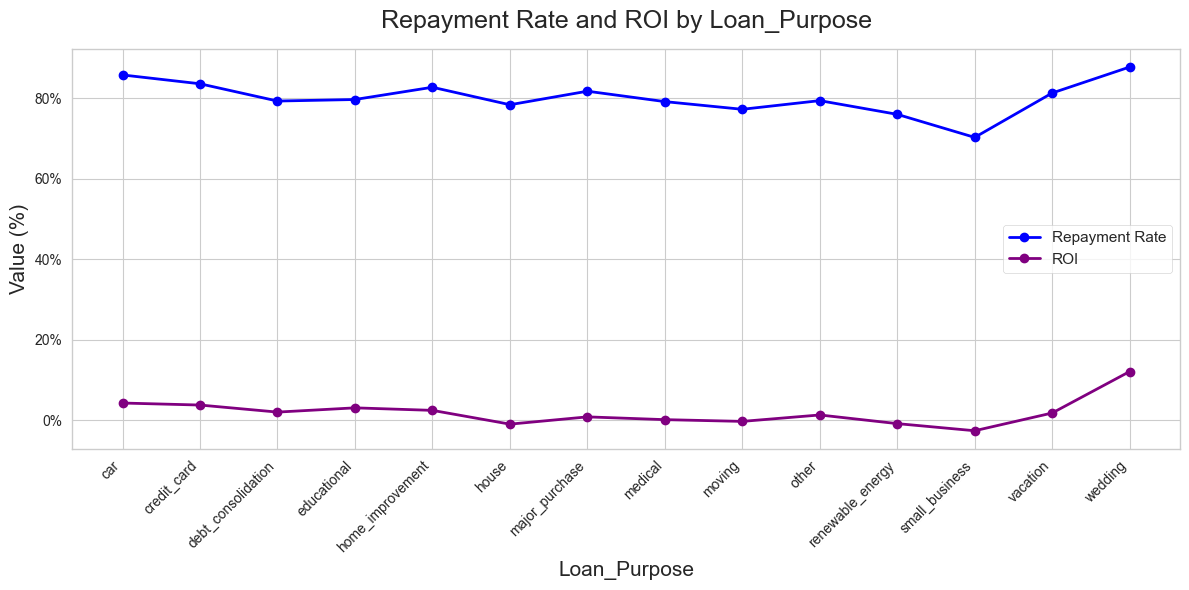

In [8]:
#Loan_Purpose vs ROI & Repayment Rate
Repayment_ROI_trend_plot('Loan_Purpose', rot=45)

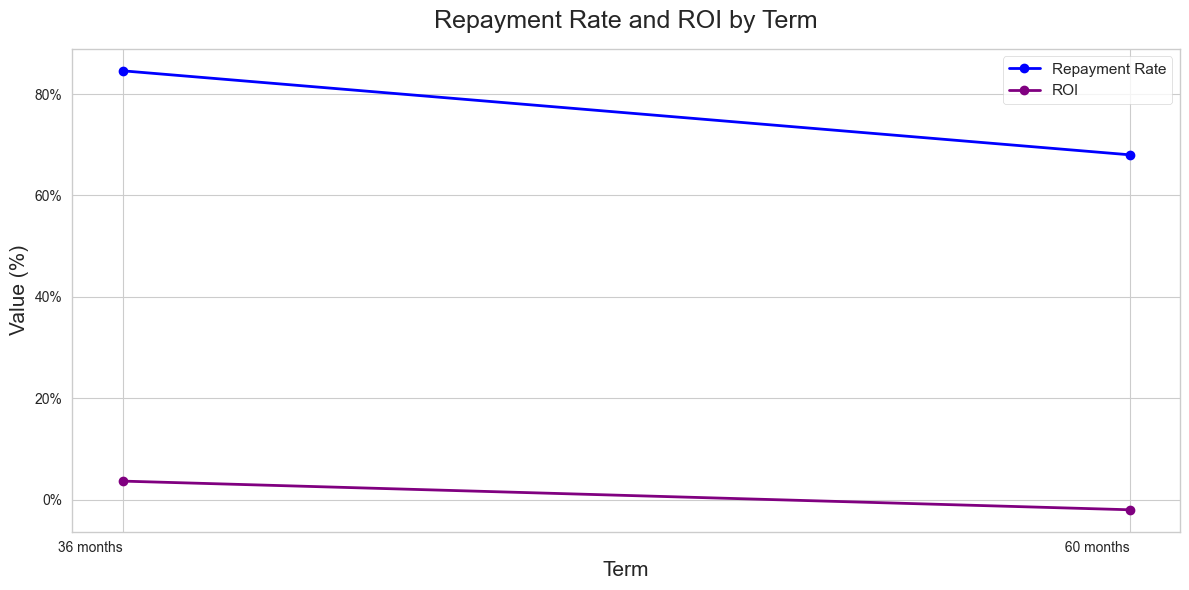

In [60]:
#Term vs ROI & Repayment Rate
Repayment_ROI_trend_plot('Term')

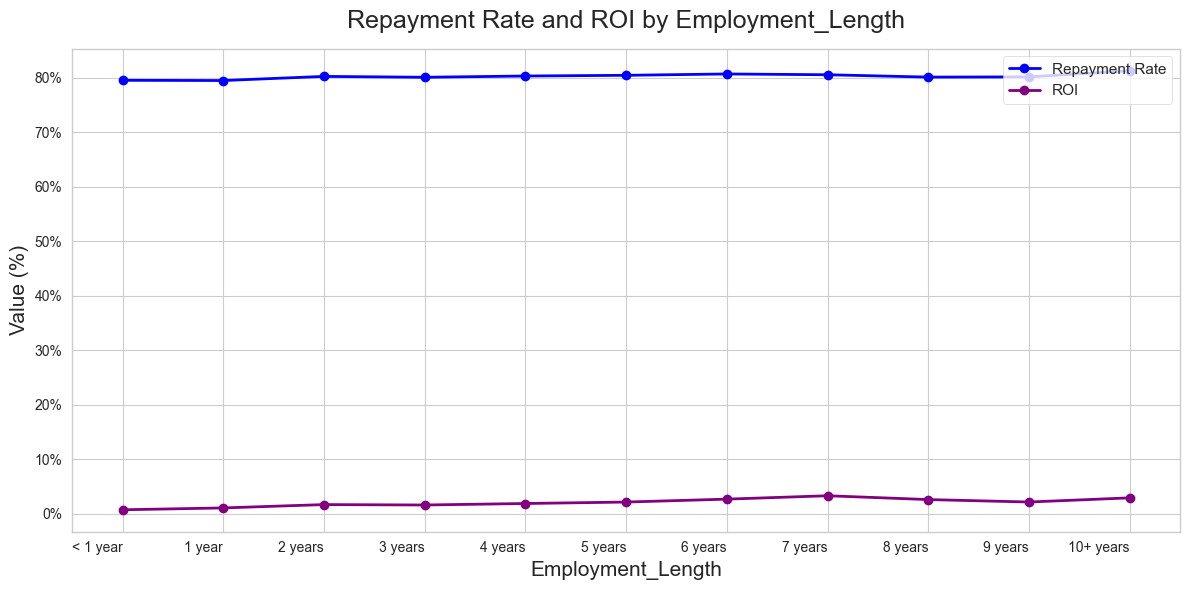

In [61]:
#Employment_Length vs ROI & Repayment Rate
Repayment_ROI_trend_plot('Employment_Length', order = emp_length_order)

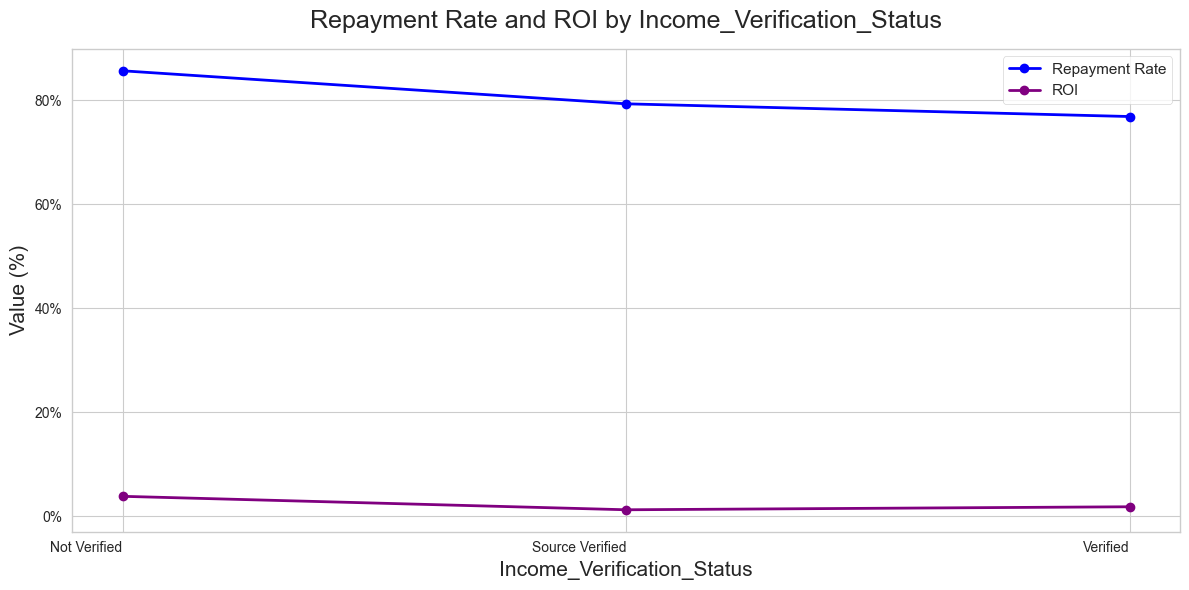

In [62]:
#Income_Verification_Status vs ROI & Repayment Rate
Repayment_ROI_trend_plot('Income_Verification_Status')

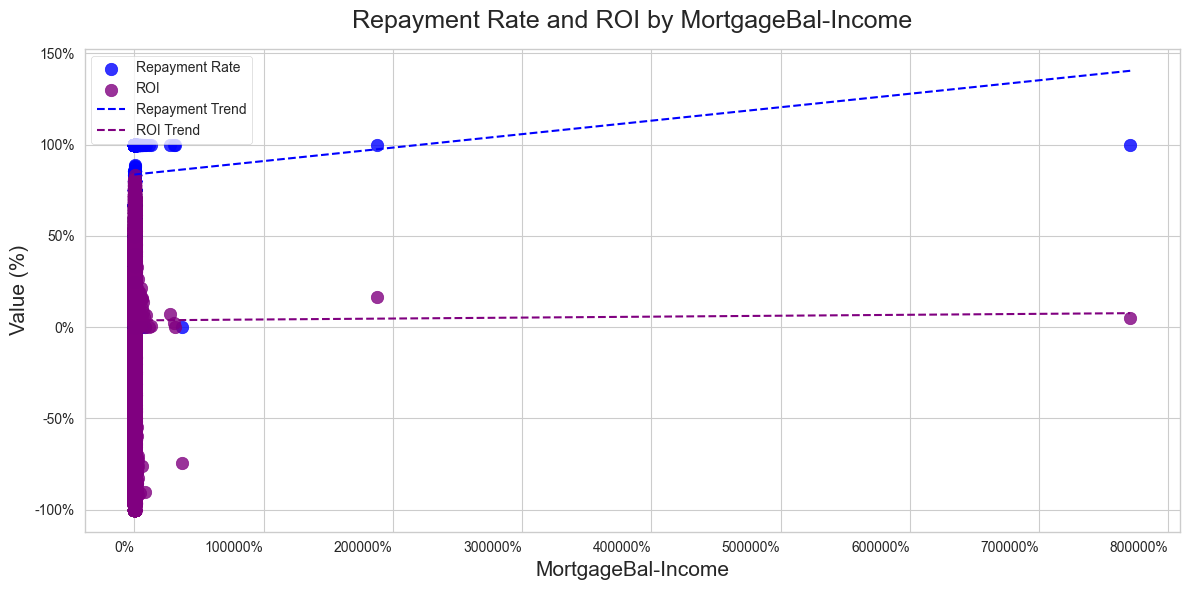

In [33]:
#MortgageBal-Income vs ROI & Repayment Rate
Repayment_ROI_scatter_plot_reg('MortgageBal-Income', x_format='percent')

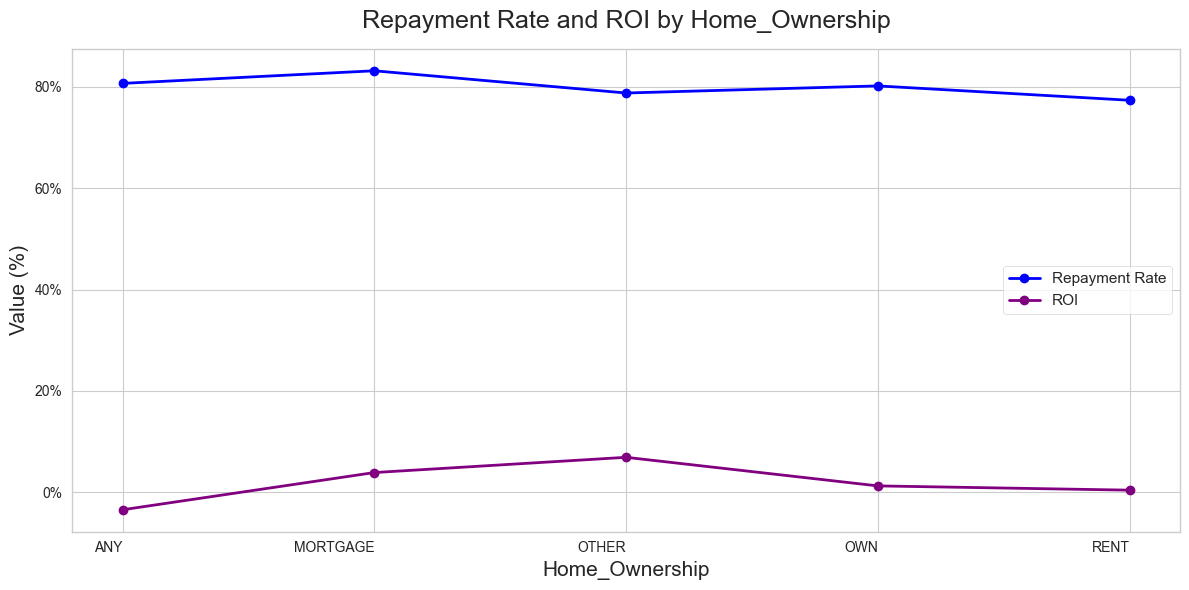

In [7]:
#Home_Ownership vs ROI & Repayment Rate
Repayment_ROI_trend_plot('Home_Ownership')

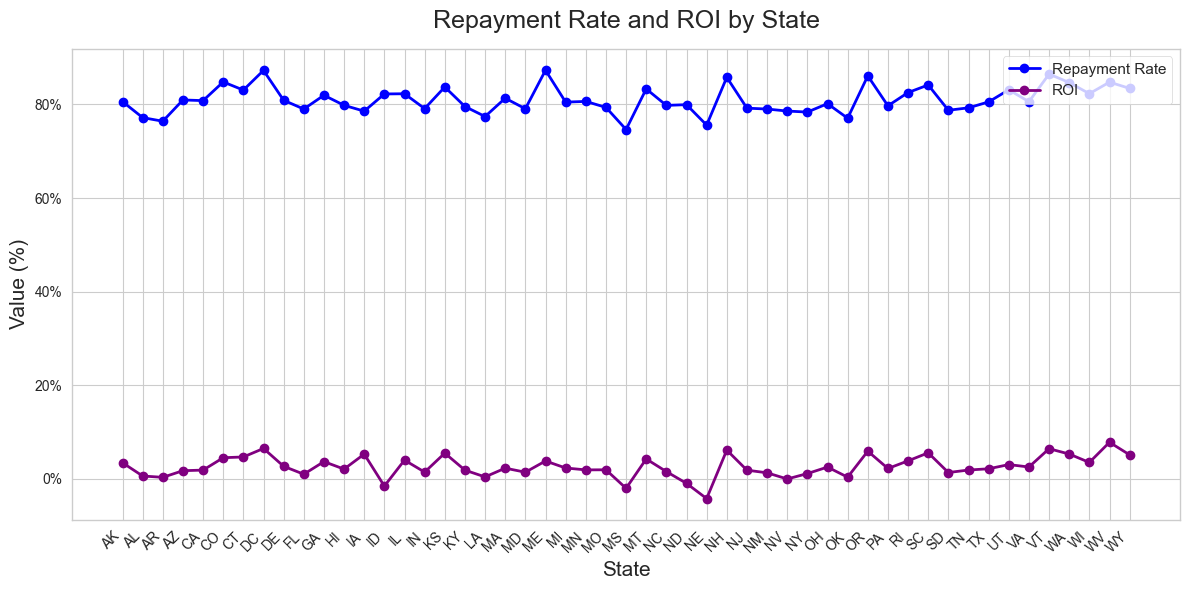

In [64]:
#State vs ROI & Repayment Rate
Repayment_ROI_trend_plot('State', rot=45)

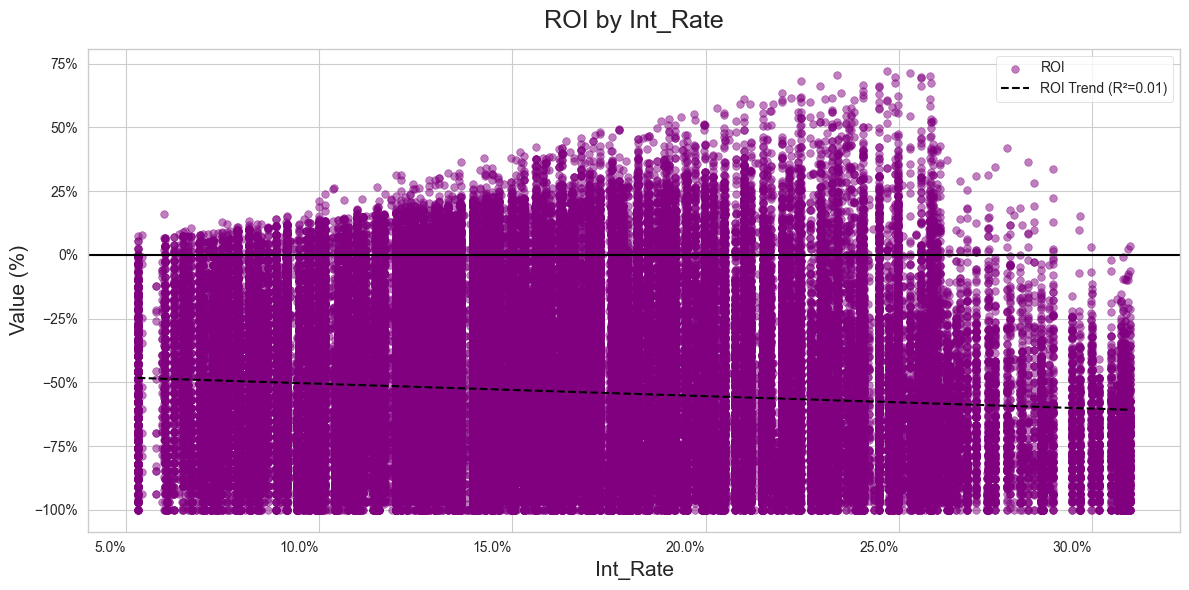

In [37]:
#Int Rate vs ROI for Charged Off Loans only
ROI_scatter_plot_reg('Int_Rate', x_format='percent', df=Accepted_Only_ChargedOff)

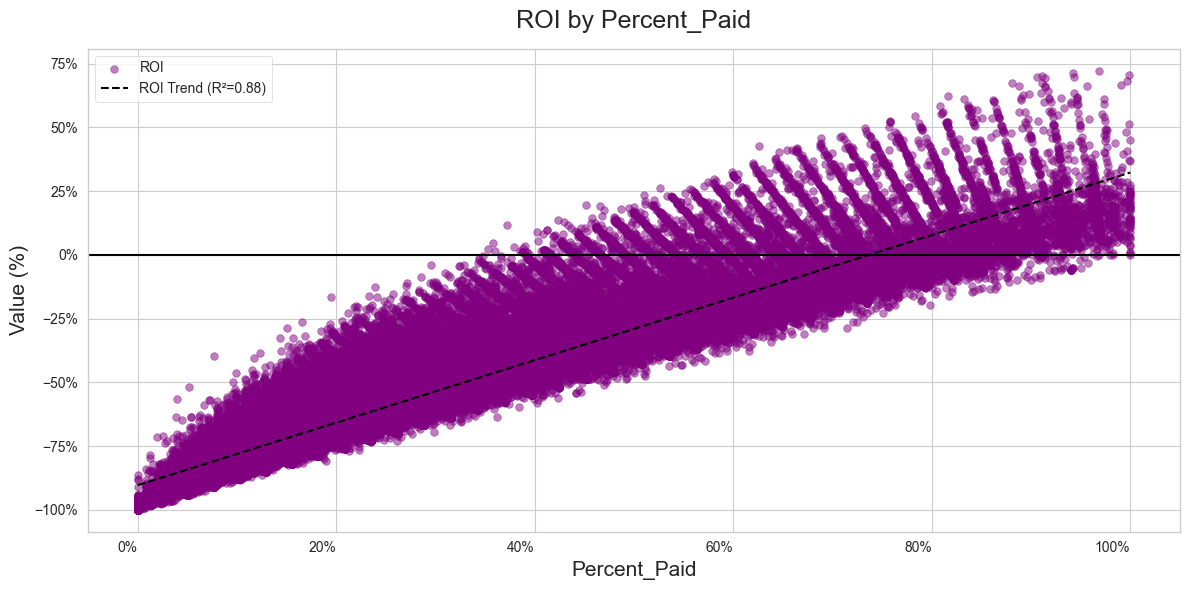

In [38]:
#Percent Paid vs ROI for Charged Off Loans only
ROI_scatter_plot_reg('Percent_Paid', x_format='percent', df=Accepted_Only_ChargedOff)

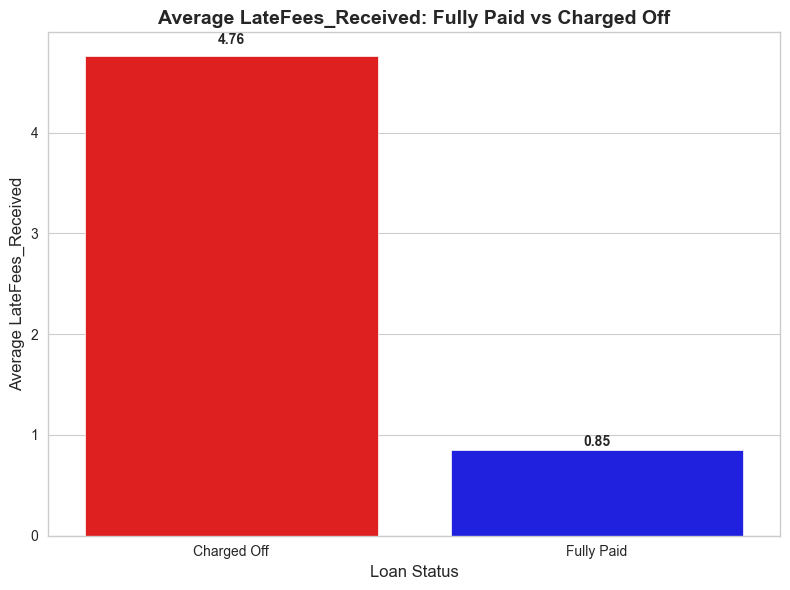

In [67]:
barplot_Paid_Unpaid('LateFees_Received')

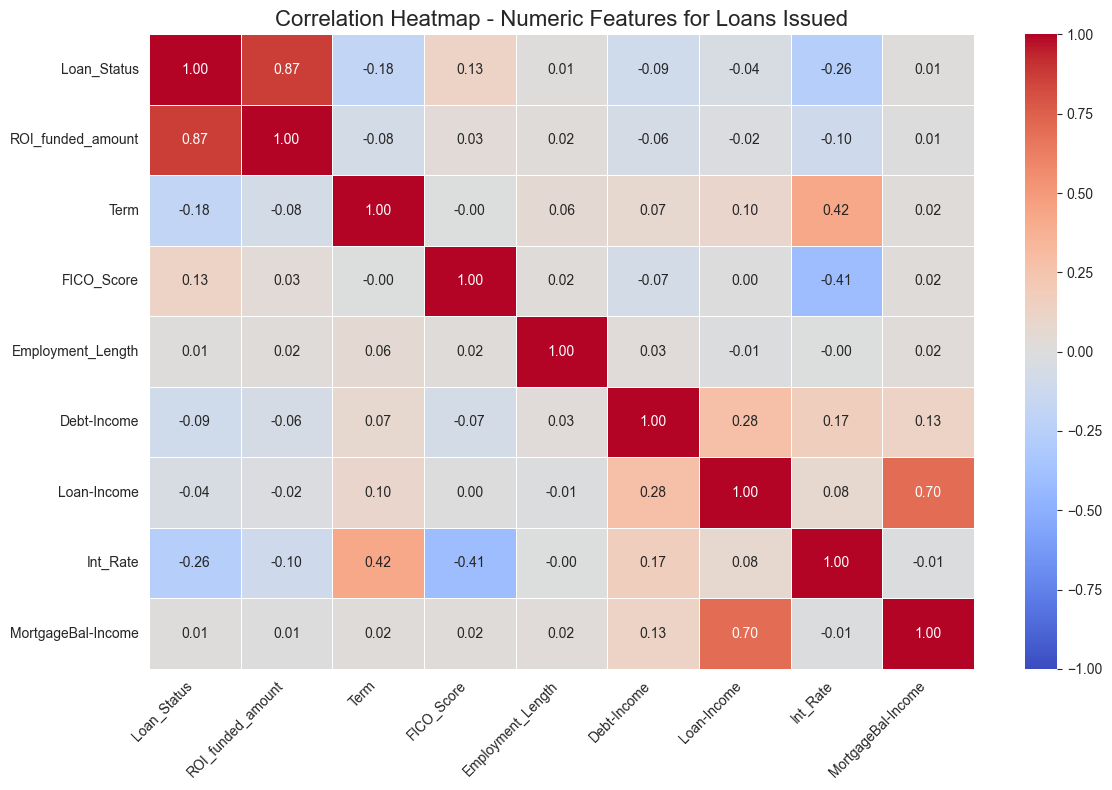

In [43]:
#Heatmap - Numeric Features
plt.figure(figsize=(12, 8))
correlation_matrix = Accepted_Only_Ord_Numeric_only.corr(numeric_only=True)

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt='.2f',
    vmin=-1,
    vmax=1
)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.title('Correlation Heatmap - Numeric Features for Loans Issued', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#---Final Test after all Modeling---

In [32]:
Accepted_Only_Ord['Home_Ownership'].value_counts()

Home_Ownership
MORTGAGE    632712
RENT        510770
OWN         129878
ANY            269
OTHER          179
Name: count, dtype: int64

In [31]:
Accepted_Only_Ord['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    741066
credit_card           278730
home_improvement       81752
other                  72966
major_purchase         28003
small_business         15180
medical                14353
car                    13886
moving                  8951
vacation                8414
house                   6895
wedding                 2318
renewable_energy         880
educational              414
Name: count, dtype: int64

In [34]:
#Column List (in order of Feature Importance)
Accepted_Only_Ord['Repayment_Rate'] = np.where(Accepted_Only_Ord['Loan_Status'] == 1, 100, 0)
Important_Feature_Names = ['Int_Rate', 'Debt-Income', 'RevolvingBal-Income', 'Credit_Age_inMonths', 'Revolving_Util', 'Loan-Income', 'Installment-Income_Monthly', 'Months_since_Revolver_Issued', 'FICO_Score', 'MortgageBal-Income', 'Months_since_Prior_Loan_Issued', 'Months_since_Delinquency', 'OnTime_Payment_%', 'Existing_LoanBal-Income', 'Employment_Length', 'Mortgage_Accounts', 'Credit_Inquiries_12m', 'Revolvers_12m', 'Delinquencies_>120days_Ever', 'Term', 'Bankruptcies', 'Co-Sign', 'Prior_Loans_12m', 'Delinquencies_>90days_24m', 'PastDue-Income', 'Collections_12m', 'Charge-Offs_12m', 'Delinquent_Accounts']
Important_Feature_Percentiles = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Important_Features = pd.DataFrame({'Names': Important_Feature_Names, 'Percentiles': Important_Feature_Percentiles})
Important_Features['Percentiles'] = Important_Features['Percentiles'].astype(float)

A = Accepted_Only_Ord[Important_Feature_Names + ['Home_Ownership', 'Loan_Purpose', 'Repayment_Rate']]
for col in Important_Feature_Names:
    A[col] = pd.to_numeric(A[col], errors='coerce')

home_vals = ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER']
purpose_vals=['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase', 'small_business', 'medical', 'car', 'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 'educational']
cat_filters = {'Home_Ownership': home_vals, 'Loan_Purpose': purpose_vals}

pd.options.display.float_format = '{:,.1f}'.format

Int_Rate  Debt-Income  RevolvingBal-Income  Credit_Age_inMonths  \
0      14.0          5.9                  5.0                148.0   
1      12.0         16.1                 33.0                192.0   
2      10.8         10.8                 12.5                184.0   
3      22.4         25.4                 21.0                210.0   
4      13.4         10.2                 25.9                338.0   

   Revolving_Util  Loan-Income  Installment-Income_Monthly  \
0            29.7          6.5                         2.7   
1            19.2         38.0                        15.1   
2            56.2         31.7                         8.2   
3            64.5         10.0                         3.3   
4            68.4         35.1                        14.3   

   Months_since_Revolver_Issued  FICO_Score  MortgageBal-Income  \
0                           3.0       677.0               249.4   
1                           2.0       717.0               253.7   
2                          14.0       697.0               271.4   
3                           4.0       697.0               225.9   
4                          32.0       692.0                 0.0   

   Months_since_Prior_Loan_Issued  Months_since_Delinquency  OnTime_Payment_%  \
0                            21.0                      30.0              76.9   
1                            19.0                       6.0              97.4   
2                            19.0                     999.0             100.0   
3                            14.0                      12.0              96.6   
4                           338.0                     999.0             100.0   

   Existing_LoanBal-Income  Employment_Length  Mortgage_Accounts  \
0                      9.1                 10                1.0   
1                     27.7                 10                4.0   
2                     17.2                 10                5.0   
3                     70.7                  3                6.0   
4                     11.7                  4                0.0   

   Credit_Inquiries_12m  Revolvers_12m  Delinquencies_>120days_Ever  Term  \
0                   4.0            3.0                          2.0     0   
1                   6.0            2.0                          0.0     0   
2                   1.0            0.0                          0.0     1   
3                   3.0            4.0                          0.0     1   
4                   0.0            0.0                          0.0     0   

   Bankruptcies  Co-Sign  Prior_Loans_12m  Delinquencies_>90days_24m  \
0             0        0              0.0                        0.0   
1             0        0              0.0                        0.0   
2             0        1              0.0                        0.0   
3             0        0              0.0                        0.0   
4             0        0              0.0                        0.0   

   PastDue-Income  Collections_12m  Charge-Offs_12m  Delinquent_Accounts  \
0             0.0              0.0              0.0                  0.0   
1             0.0              0.0              0.0                  0.0   
2             0.0              0.0              0.0                  0.0   
3             0.0              0.0              0.0                  0.0   
4             0.0              0.0              0.0                  0.0   

  Home_Ownership        Loan_Purpose  Repayment_Rate  
0       MORTGAGE  debt_consolidation             100  
1       MORTGAGE      small_business             100  
2       MORTGAGE    home_improvement             100  
3       MORTGAGE      major_purchase             100  
4           RENT  debt_consolidation             100

In [27]:
def binning(df=A, numeric_cols=Important_Features['Names'], percentiles=Important_Features['Percentiles'], target='Repayment_Rate', cat_filters=cat_filters):
    filtered_df = df.copy()
    summary_rows = []

    #Categorical columns
    if cat_filters is not None:
        for col, allowed_vals in cat_filters.items():
            before = len(filtered_df)
            filtered_df = filtered_df.loc[filtered_df[col].isin(allowed_vals)]
            after = len(filtered_df)
            if filtered_df.empty:
                print(f'No rows left after filtering {col}')
                return None, None, None

    #Numeric Percentiles
    for col, pct in zip(numeric_cols, percentiles):

        if col not in filtered_df.columns:
            continue
        filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')
        if not pd.api.types.is_numeric_dtype(filtered_df[col]):
            continue
		
        pct_abs = abs(pct)
        threshold = filtered_df[col].quantile(pct_abs)
        before = len(filtered_df)

        if pct < 0:  #Top
            filtered_df = filtered_df[(filtered_df[col] > threshold)]
            direction = 'top'
        else:        #Bottom
            filtered_df = filtered_df[(filtered_df[col] <= threshold)]
            direction = 'bottom'

        after = len(filtered_df)

        if filtered_df.empty:
            print(f'No rows left after filtering {col} at percentile {pct}')
            return None, None, None

        summary_rows.append({
            'Feature': col,
            'Percentile': pct*100,
            'Threshold': threshold,
            'Min_after_filter': filtered_df[col].min(),
            'Max_after_filter': filtered_df[col].max(),
            'Mean_after_filter': filtered_df[col].mean()
        })

    mean_target = filtered_df[target].mean()
    summary_table = (pd.DataFrame(summary_rows).set_index('Feature').sort_index())
    print('\nRepayment Rate:', mean_target)
    print(f'Row Count: {len(filtered_df):,}')
    print('Row %:', len(filtered_df) / len(df) * 100)
    print('Summary Table\n')
    return summary_table

In [ ]:
#---Optimal Feature Thresholds for Precision---

In [23]:
purpose_vals = ['car', 'credit_card', 'home_improvement', 'major_purchase', 'vacation', 'wedding']
cat_filters = {'Home_Ownership': home_vals, 'Loan_Purpose': purpose_vals}
binning(cat_filters=cat_filters)


Repayment Rate: 83.37799531835886
Row Count: 413,103
Row %: 32.43055468328037
Summary Table



Percentile  Threshold  Min_after_filter  \
Feature                                                                   
Bankruptcies                         100.0        1.0               0.0   
Charge-Offs_12m                      100.0       10.0               0.0   
Co-Sign                              100.0        1.0               0.0   
Collections_12m                      100.0       16.0               0.0   
Credit_Age_inMonths                  100.0      786.0               6.0   
Credit_Inquiries_12m                 100.0       40.0               0.0   
Debt-Income                          100.0      999.0               0.0   
Delinquencies_>120days_Ever          100.0       38.0               0.0   
Delinquencies_>90days_24m            100.0       29.0               0.0   
Delinquent_Accounts                  100.0       14.0               0.0   
Employment_Length                    100.0       10.0               0.0   
Existing_LoanBal-Income              100.0   48,166.0               0.0   
FICO_Score                           100.0      847.5             627.0   
Installment-Income_Monthly           100.0    2,797.2               0.0   
Int_Rate                             100.0       31.0               5.3   
Loan-Income                          100.0   10,000.0               0.0   
Months_since_Delinquency             100.0      999.0               0.0   
Months_since_Prior_Loan_Issued       100.0      999.0               0.0   
Months_since_Revolver_Issued         100.0      999.0               0.0   
MortgageBal-Income                   100.0  187,910.0               0.0   
Mortgage_Accounts                    100.0       51.0               0.0   
OnTime_Payment_%                     100.0      100.0               7.1   
PastDue-Income                       100.0      157.1               0.0   
Prior_Loans_12m                      100.0       13.0               0.0   
Revolvers_12m                        100.0       24.0               0.0   
RevolvingBal-Income                  100.0    7,960.0               0.0   
Revolving_Util                       100.0      248.9               0.0   
Term                                 100.0        1.0               0.0   

                                Max_after_filter  Mean_after_filter  
Feature                                                              
Bankruptcies                                 1.0                0.1  
Charge-Offs_12m                             10.0                0.0  
Co-Sign                                      1.0                0.0  
Collections_12m                             16.0                0.0  
Credit_Age_inMonths                        786.0              193.0  
Credit_Inquiries_12m                        40.0                0.9  
Debt-Income                                999.0               17.4  
Delinquencies_>120days_Ever                 38.0                0.4  
Delinquencies_>90days_24m                   29.0                0.1  
Delinquent_Accounts                         14.0                0.0  
Employment_Length                           10.0                5.9  
Existing_LoanBal-Income                 48,166.0               19.8  
FICO_Score                                 847.5              700.4  
Installment-Income_Monthly               2,797.2                7.4  
Int_Rate                                    31.0               12.1  
Loan-Income                             10,000.0               20.3  
Months_since_Delinquency                   999.0              540.0  
Months_since_Prior_Loan_Issued             999.0              624.2  
Months_since_Revolver_Issued               999.0               66.4  
MortgageBal-Income                     187,910.0              110.8  
Mortgage_Accounts                           51.0                1.7  
OnTime_Payment_%                           100.0               94.8  
PastDue-Income                             157.1                0.0  
Prior_Loans_12m                

In [18]:
a = Important_Features.copy()
a.loc[a['Names'] == 'Int_Rate', 'Percentiles'] = .2
binning(numeric_cols=a['Names'], percentiles=a['Percentiles'], cat_filters=cat_filters)


Repayment Rate: 94.98869675342353
Row Count: 84,489
Row %: 6.632789242962833
Summary Table



Percentile  Threshold  Min_after_filter  \
Feature                                                                   
Bankruptcies                         100.0        1.0               0.0   
Charge-Offs_12m                      100.0        5.0               0.0   
Co-Sign                              100.0        1.0               0.0   
Collections_12m                      100.0        4.0               0.0   
Credit_Age_inMonths                  100.0      746.0              10.0   
Credit_Inquiries_12m                 100.0       20.0               0.0   
Debt-Income                          100.0      505.0               0.0   
Delinquencies_>120days_Ever          100.0       28.0               0.0   
Delinquencies_>90days_24m            100.0       13.0               0.0   
Delinquent_Accounts                  100.0        3.0               0.0   
Employment_Length                    100.0       10.0               0.0   
Existing_LoanBal-Income              100.0    1,444.9               0.0   
FICO_Score                           100.0      847.5             662.0   
Installment-Income_Monthly           100.0      371.8               0.0   
Int_Rate                              20.0        7.9               5.3   
Loan-Income                          100.0    1,000.0               0.1   
Months_since_Delinquency             100.0      999.0               0.0   
Months_since_Prior_Loan_Issued       100.0      999.0               0.0   
Months_since_Revolver_Issued         100.0      999.0               0.0   
MortgageBal-Income                   100.0    3,132.9               0.0   
Mortgage_Accounts                    100.0       31.0               0.0   
OnTime_Payment_%                     100.0      100.0              23.8   
PastDue-Income                       100.0       54.2               0.0   
Prior_Loans_12m                      100.0        9.0               0.0   
Revolvers_12m                        100.0       16.0               0.0   
RevolvingBal-Income                  100.0      747.1               0.0   
Revolving_Util                       100.0      137.2               0.0   
Term                                 100.0        1.0               0.0   

                                Max_after_filter  Mean_after_filter  
Feature                                                              
Bankruptcies                                 1.0                0.1  
Charge-Offs_12m                              5.0                0.0  
Co-Sign                                      1.0                0.0  
Collections_12m                              4.0                0.0  
Credit_Age_inMonths                        746.0              212.1  
Credit_Inquiries_12m                        20.0                0.6  
Debt-Income                                505.0               15.2  
Delinquencies_>120days_Ever                 28.0                0.3  
Delinquencies_>90days_24m                   13.0                0.0  
Delinquent_Accounts                          3.0                0.0  
Employment_Length                           10.0                6.0  
Existing_LoanBal-Income                  1,444.9               15.4  
FICO_Score                                 847.5              729.3  
Installment-Income_Monthly                 371.8                6.3  
Int_Rate                                     7.9                6.8  
Loan-Income                              1,000.0               17.1  
Months_since_Delinquency                   999.0              631.3  
Months_since_Prior_Loan_Issued             999.0              644.8  
Months_since_Revolver_Issued               999.0               76.6  
MortgageBal-Income                       3,132.9              127.0  
Mortgage_Accounts                           31.0                2.0  
OnTime_Payment_%                           100.0               96.5  
PastDue-Income                              54.2                0.0  
Prior_Loans_12m                

In [321]:
a = Important_Features.copy()
a.loc[a['Names'] == 'Int_Rate', 'Percentiles'] = .7
a.loc[a['Names'] == 'Debt-Income', 'Percentiles'] = .1
a.loc[a['Names'] == 'FICO_Score', 'Percentiles'] = -.005

a.loc[a['Names'] == 'Credit_Age_inMonths', 'Percentiles'] = -.65
a.loc[a['Names'] == 'Revolving_Util', 'Percentiles'] = .7
a.loc[a['Names'] == 'Loan-Income', 'Percentiles'] = .7
a.loc[a['Names'] == 'Months_since_Revolver_Issued', 'Percentiles'] = -.25

a.loc[a['Names'] == 'MortgageBal-Income', 'Percentiles'] = -.08
a.loc[a['Names'] == 'Months_since_Delinquency', 'Percentiles'] = -.01

binning(numeric_cols=a['Names'], percentiles=a['Percentiles'], cat_filters=cat_filters)


Repayment Rate: 95.26998744244453
Row Count: 4,778
Row %: 0.3750957758155075
Summary Table



Percentile  Threshold  Min_after_filter  \
Feature                                                                   
Bankruptcies                         100.0        1.0               0.0   
Charge-Offs_12m                      100.0        2.0               0.0   
Co-Sign                              100.0        1.0               0.0   
Collections_12m                      100.0        2.0               0.0   
Credit_Age_inMonths                  -65.0      203.0             203.0   
Credit_Inquiries_12m                 100.0       18.0               0.0   
Debt-Income                           10.0        6.9               0.0   
Delinquencies_>120days_Ever          100.0       15.0               0.0   
Delinquencies_>90days_24m            100.0       12.0               0.0   
Delinquent_Accounts                  100.0        1.0               0.0   
Employment_Length                    100.0       10.0               0.0   
Existing_LoanBal-Income              100.0      393.5               0.0   
FICO_Score                            -0.5      662.0             667.0   
Installment-Income_Monthly           100.0        7.6               0.0   
Int_Rate                              70.0       15.2               5.3   
Loan-Income                           70.0       18.2               0.0   
Months_since_Delinquency              -1.0        1.0               2.0   
Months_since_Prior_Loan_Issued       100.0      999.0               1.0   
Months_since_Revolver_Issued         -25.0        4.0               5.0   
MortgageBal-Income                    -8.0        0.0               0.4   
Mortgage_Accounts                    100.0       32.0               1.0   
OnTime_Payment_%                     100.0      100.0              26.7   
PastDue-Income                       100.0       50.0               0.0   
Prior_Loans_12m                      100.0        6.0               0.0   
Revolvers_12m                        100.0        8.0               0.0   
RevolvingBal-Income                  100.0      353.7               0.0   
Revolving_Util                        70.0       49.4               0.0   
Term                                 100.0        1.0               0.0   

                                Max_after_filter  Mean_after_filter  
Feature                                                              
Bankruptcies                                 1.0                0.1  
Charge-Offs_12m                              2.0                0.0  
Co-Sign                                      1.0                0.0  
Collections_12m                              2.0                0.0  
Credit_Age_inMonths                        785.0              282.4  
Credit_Inquiries_12m                        18.0                0.9  
Debt-Income                                  6.9                4.4  
Delinquencies_>120days_Ever                 15.0                0.7  
Delinquencies_>90days_24m                   12.0                0.1  
Delinquent_Accounts                          1.0                0.0  
Employment_Length                           10.0                7.0  
Existing_LoanBal-Income                    393.5                5.3  
FICO_Score                                 847.5              731.6  
Installment-Income_Monthly                   7.6                3.7  
Int_Rate                                    15.2               10.8  
Loan-Income                                 18.2               10.1  
Months_since_Delinquency                   999.0              479.9  
Months_since_Prior_Loan_Issued             999.0              539.3  
Months_since_Revolver_Issued               999.0              164.9  
MortgageBal-Income                       1,071.5              227.3  
Mortgage_Accounts                           32.0                3.6  
OnTime_Payment_%                           100.0               93.0  
PastDue-Income                              50.0                0.0  
Prior_Loans_12m                

In [ ]:
#92.09285455204933

a.loc[a['Names'] == 'Int_Rate', 'Percentiles'] = .91
a.loc[a['Names'] == 'Debt-Income', 'Percentiles'] = .1
a.loc[a['Names'] == 'FICO_Score', 'Percentiles'] = -.005

a.loc[a['Names'] == 'Credit_Age_inMonths', 'Percentiles'] = -.65
a.loc[a['Names'] == 'Revolving_Util', 'Percentiles'] = .6
a.loc[a['Names'] == 'Loan-Income', 'Percentiles'] = .6
#a.loc[a['Names'] == 'Months_since_Revolver_Issued', 'Percentiles'] = -.24

#a.loc[a['Names'] == 'MortgageBal-Income', 'Percentiles'] = -.7
#a.loc[a['Names'] == 'Months_since_Delinquency', 'Percentiles'] = -.7


In [19]:
a = Important_Features.copy()
a.loc[a['Names'] == 'Int_Rate', 'Percentiles'] = -.5
binning(numeric_cols=a['Names'], percentiles=a['Percentiles'], cat_filters=cat_filters)


Repayment Rate: 75.86661052466657
Row Count: 204,244
Row %: 16.034127592227403
Summary Table



Percentile  Threshold  Min_after_filter  \
Feature                                                                   
Bankruptcies                         100.0        1.0               0.0   
Charge-Offs_12m                      100.0        6.0               0.0   
Co-Sign                              100.0        1.0               0.0   
Collections_12m                      100.0       14.0               0.0   
Credit_Age_inMonths                  100.0      786.0               6.0   
Credit_Inquiries_12m                 100.0       40.0               0.0   
Debt-Income                          100.0      999.0               0.0   
Delinquencies_>120days_Ever          100.0       38.0               0.0   
Delinquencies_>90days_24m            100.0       29.0               0.0   
Delinquent_Accounts                  100.0       14.0               0.0   
Employment_Length                    100.0       10.0               0.0   
Existing_LoanBal-Income              100.0   48,166.0               0.0   
FICO_Score                           100.0      847.5             627.0   
Installment-Income_Monthly           100.0    2,797.2               0.0   
Int_Rate                             -50.0       11.5              11.5   
Loan-Income                          100.0   10,000.0               0.0   
Months_since_Delinquency             100.0      999.0               0.0   
Months_since_Prior_Loan_Issued       100.0      999.0               0.0   
Months_since_Revolver_Issued         100.0      999.0               0.0   
MortgageBal-Income                   100.0  187,910.0               0.0   
Mortgage_Accounts                    100.0       51.0               0.0   
OnTime_Payment_%                     100.0      100.0               7.1   
PastDue-Income                       100.0      155.8               0.0   
Prior_Loans_12m                      100.0       13.0               0.0   
Revolvers_12m                        100.0       24.0               0.0   
RevolvingBal-Income                  100.0    7,960.0               0.0   
Revolving_Util                       100.0      248.9               0.0   
Term                                 100.0        1.0               0.0   

                                Max_after_filter  Mean_after_filter  
Feature                                                              
Bankruptcies                                 1.0                0.1  
Charge-Offs_12m                              6.0                0.0  
Co-Sign                                      1.0                0.0  
Collections_12m                             14.0                0.0  
Credit_Age_inMonths                        786.0              183.2  
Credit_Inquiries_12m                        40.0                1.1  
Debt-Income                                999.0               18.7  
Delinquencies_>120days_Ever                 38.0                0.5  
Delinquencies_>90days_24m                   29.0                0.1  
Delinquent_Accounts                         14.0                0.0  
Employment_Length                           10.0                5.9  
Existing_LoanBal-Income                 48,166.0               20.3  
FICO_Score                                 847.5              688.4  
Installment-Income_Monthly               2,797.2                8.3  
Int_Rate                                    31.0               15.7  
Loan-Income                             10,000.0               22.6  
Months_since_Delinquency                   999.0              511.2  
Months_since_Prior_Loan_Issued             999.0              649.1  
Months_since_Revolver_Issued               999.0               68.1  
MortgageBal-Income                     187,910.0              103.7  
Mortgage_Accounts                           51.0                1.6  
OnTime_Payment_%                           100.0               94.3  
PastDue-Income                             155.8                0.0  
Prior_Loans_12m                

In [118]:
a = Important_Features.copy()
a.loc[a['Names'] == 'Int_Rate', 'Percentiles'] = -.5
a.loc[a['Names'] == 'Debt-Income', 'Percentiles'] = .1
a.loc[a['Names'] == 'Credit_Age_inMonths', 'Percentiles'] = -.2
a.loc[a['Names'] == 'Revolving_Util', 'Percentiles'] = -.2
a.loc[a['Names'] == 'Loan-Income', 'Percentiles'] = -.2
a.loc[a['Names'] == 'Months_since_Revolver_Issued', 'Percentiles'] = -.2

binning(numeric_cols=a['Names'], percentiles=a['Percentiles'], cat_filters=cat_filters)


Repayment Rate: 80.88434060629466
Row Count: 15,537
Row %: 1.2197285619182798
Summary Table



Percentile  Threshold  Min_after_filter  \
Feature                                                                   
Bankruptcies                           100          1                 0   
Charge-Offs_12m                        100          4                 0   
Co-Sign                                100          1                 0   
Collections_12m                        100         14                 0   
Credit_Age_inMonths                    -20         96                97   
Credit_Inquiries_12m                   100         25                 0   
Debt-Income                             10          7                 0   
Delinquencies_>120days_Ever            100         28                 0   
Delinquencies_>90days_24m              100         19                 0   
Delinquent_Accounts                    100         14                 0   
Employment_Length                      100         10                 0   
Existing_LoanBal-Income                100        741                 0   
FICO_Score                             100        842               642   
Installment-Income_Monthly             100         58                 0   
Int_Rate                               -50         12                12   
Loan-Income                            100        154                 0   
Months_since_Delinquency               100        999                 0   
Months_since_Prior_Loan_Issued         100        999                 0   
Months_since_Revolver_Issued           100        999                 0   
MortgageBal-Income                     100      1,227                 0   
Mortgage_Accounts                      100         34                 0   
OnTime_Payment_%                       100        100                 7   
PastDue-Income                         100        121                 0   
Prior_Loans_12m                        100          7                 0   
Revolvers_12m                          100         16                 0   
RevolvingBal-Income                     95         23                 0   
Revolving_Util                         100        137                 0   
Term                                   100          1                 0   

                                Max_after_filter  Mean_after_filter  
Feature                                                              
Bankruptcies                                   1                  0  
Charge-Offs_12m                                4                  0  
Co-Sign                                        1                  0  
Collections_12m                               14                  0  
Credit_Age_inMonths                          680                193  
Credit_Inquiries_12m                          25                  1  
Debt-Income                                    7                  5  
Delinquencies_>120days_Ever                   28                  1  
Delinquencies_>90days_24m                     19                  0  
Delinquent_Accounts                           14                  0  
Employment_Length                             10                  6  
Existing_LoanBal-Income                      741                  6  
FICO_Score                                   842                692  
Installment-Income_Monthly                    58                  7  
Int_Rate                                      31                 16  
Loan-Income                                  154                 18  
Months_since_Delinquency                     999                407  
Months_since_Prior_Loan_Issued               999                687  
Months_since_Revolver_Issued                 999                 92  
MortgageBal-Income                         1,227                107  
Mortgage_Accounts                             34                  2  
OnTime_Payment_%                             100                 91  
PastDue-Income                               121                  0  
Prior_Loans_12m                

In [124]:
#Above average rates (but not above 90% threshold of those above average rates.
#DTI < 40%
#FICO > 660
int_threshold = Accepted_Only_Ord['Int_Rate'].mean()
B = A.loc[(Accepted_Only_Ord['Int_Rate'] >= int_threshold)]

a = Important_Features.copy()
a.loc[a['Names'] == 'Int_Rate', 'Percentiles'] = .5
a.loc[a['Names'] == 'Debt-Income', 'Percentiles'] = .5
a.loc[a['Names'] == 'FICO_Score', 'Percentiles'] = -.0015

binning(df=B, numeric_cols=a['Names'], percentiles=a['Percentiles'], cat_filters=cat_filters)


Repayment Rate: 79.36575683054556
Row Count: 147,609
Row %: 25.253978627813957
Summary Table



Percentile  Threshold  Min_after_filter  \
Feature                                                                   
Bankruptcies                         100.0        1.0               0.0   
Charge-Offs_12m                      100.0        6.0               0.0   
Co-Sign                              100.0        1.0               0.0   
Collections_12m                      100.0       20.0               0.0   
Credit_Age_inMonths                  100.0      852.0               0.0   
Credit_Inquiries_12m                 100.0       41.0               0.0   
Debt-Income                           50.0       18.3               0.0   
Delinquencies_>120days_Ever          100.0       34.0               0.0   
Delinquencies_>90days_24m            100.0       30.0               0.0   
Delinquent_Accounts                  100.0        6.0               0.0   
Employment_Length                    100.0       10.0               0.0   
Existing_LoanBal-Income              100.0    1,158.5               0.0   
FICO_Score                            -0.1      657.0             662.0   
Installment-Income_Monthly           100.0      131.4               0.0   
Int_Rate                              50.0       16.3              13.2   
Loan-Income                          100.0      320.0               0.1   
Months_since_Delinquency             100.0      999.0               0.0   
Months_since_Prior_Loan_Issued       100.0      999.0               0.0   
Months_since_Revolver_Issued         100.0      999.0               0.0   
MortgageBal-Income                   100.0    2,069.3               0.0   
Mortgage_Accounts                    100.0       37.0               0.0   
OnTime_Payment_%                     100.0      100.0               0.0   
PastDue-Income                       100.0      162.0               0.0   
Prior_Loans_12m                      100.0       13.0               0.0   
Revolvers_12m                        100.0       26.0               0.0   
RevolvingBal-Income                  100.0      439.3               0.0   
Revolving_Util                       100.0      366.6               0.0   
Term                                 100.0        1.0               0.0   

                                Max_after_filter  Mean_after_filter  
Feature                                                              
Bankruptcies                                 1.0                0.2  
Charge-Offs_12m                              6.0                0.0  
Co-Sign                                      1.0                0.0  
Collections_12m                             20.0                0.0  
Credit_Age_inMonths                        852.0              180.2  
Credit_Inquiries_12m                        41.0                0.9  
Debt-Income                                 18.3               11.8  
Delinquencies_>120days_Ever                 34.0                0.6  
Delinquencies_>90days_24m                   30.0                0.1  
Delinquent_Accounts                          6.0                0.0  
Employment_Length                           10.0                5.8  
Existing_LoanBal-Income                  1,158.5               12.7  
FICO_Score                                 847.5              688.4  
Installment-Income_Monthly                 131.4                7.3  
Int_Rate                                    16.3               14.6  
Loan-Income                                320.0               20.1  
Months_since_Delinquency                   999.0              474.8  
Months_since_Prior_Loan_Issued             999.0              659.0  
Months_since_Revolver_Issued               999.0               86.5  
MortgageBal-Income                       2,069.3               98.1  
Mortgage_Accounts                           37.0                1.5  
OnTime_Payment_%                           100.0               93.2  
PastDue-Income                             162.0                0.0  
Prior_Loans_12m                

In [254]:
#Above average rates (but not above 90% threshold of those above average rates.
#DTI < 40%
#FICO > 660
a = Important_Features.copy()
a.loc[a['Names'] == 'Int_Rate', 'Percentiles'] = .075
a.loc[a['Names'] == 'Debt-Income', 'Percentiles'] = .51
a.loc[a['Names'] == 'FICO_Score', 'Percentiles'] = -.003
#-----
a.loc[a['Names'] == 'Credit_Age_inMonths', 'Percentiles'] = -.76
a.loc[a['Names'] == 'Revolving_Util', 'Percentiles'] = .5
a.loc[a['Names'] == 'Loan-Income', 'Percentiles'] = .292
a.loc[a['Names'] == 'Months_since_Revolver_Issued', 'Percentiles'] = -.24

a.loc[a['Names'] == 'MortgageBal-Income', 'Percentiles'] = -.7
a.loc[a['Names'] == 'Months_since_Delinquency', 'Percentiles'] = -.7


binning(df=B, numeric_cols=a['Names'], percentiles=a['Percentiles'], cat_filters=cat_filters)


Repayment Rate: 94.73684210526316
Row Count: 57
Row %: 0.009751958090532389
Summary Table



Percentile  Threshold  Min_after_filter  \
Feature                                                                   
Bankruptcies                         100.0        1.0               0.0   
Charge-Offs_12m                      100.0        0.0               0.0   
Co-Sign                              100.0        0.0               0.0   
Collections_12m                      100.0        1.0               0.0   
Credit_Age_inMonths                  -76.0      229.0             229.0   
Credit_Inquiries_12m                 100.0        8.0               0.0   
Debt-Income                           51.0       18.2               0.0   
Delinquencies_>120days_Ever          100.0        2.0               0.0   
Delinquencies_>90days_24m            100.0        0.0               0.0   
Delinquent_Accounts                  100.0        0.0               0.0   
Employment_Length                    100.0       10.0               0.0   
Existing_LoanBal-Income              100.0       89.7               0.0   
FICO_Score                            -0.3      656.5             657.0   
Installment-Income_Monthly           100.0        4.8               0.2   
Int_Rate                               7.5       13.6              13.2   
Loan-Income                           29.2       11.7               0.5   
Months_since_Delinquency             -70.0       71.6              72.0   
Months_since_Prior_Loan_Issued       100.0      999.0               0.0   
Months_since_Revolver_Issued         -24.0        2.0               3.0   
MortgageBal-Income                   -70.0      133.6             133.8   
Mortgage_Accounts                    100.0       16.0               1.0   
OnTime_Payment_%                     100.0      100.0              57.0   
PastDue-Income                       100.0        0.0               0.0   
Prior_Loans_12m                      100.0        5.0               0.0   
Revolvers_12m                        100.0        5.0               0.0   
RevolvingBal-Income                  100.0      392.4               0.0   
Revolving_Util                        50.0       51.2               0.0   
Term                                 100.0        1.0               0.0   

                                Max_after_filter  Mean_after_filter  
Feature                                                              
Bankruptcies                                 1.0                0.3  
Charge-Offs_12m                              0.0                0.0  
Co-Sign                                      0.0                0.0  
Collections_12m                              1.0                0.0  
Credit_Age_inMonths                        673.0              301.1  
Credit_Inquiries_12m                         8.0                2.1  
Debt-Income                                 18.2               11.6  
Delinquencies_>120days_Ever                  2.0                0.2  
Delinquencies_>90days_24m                    0.0                0.0  
Delinquent_Accounts                          0.0                0.0  
Employment_Length                           10.0                7.2  
Existing_LoanBal-Income                     89.7               15.0  
FICO_Score                                 832.0              694.9  
Installment-Income_Monthly                   4.8                2.8  
Int_Rate                                    13.6               13.4  
Loan-Income                                 11.7                7.3  
Months_since_Delinquency                   999.0              902.9  
Months_since_Prior_Loan_Issued             999.0              448.2  
Months_since_Revolver_Issued               999.0              140.8  
MortgageBal-Income                         774.7              278.6  
Mortgage_Accounts                           16.0                3.5  
OnTime_Payment_%                           100.0               97.5  
PastDue-Income                               0.0                0.0  
Prior_Loans_12m                